# Data prep and analysis FIA

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis'

In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


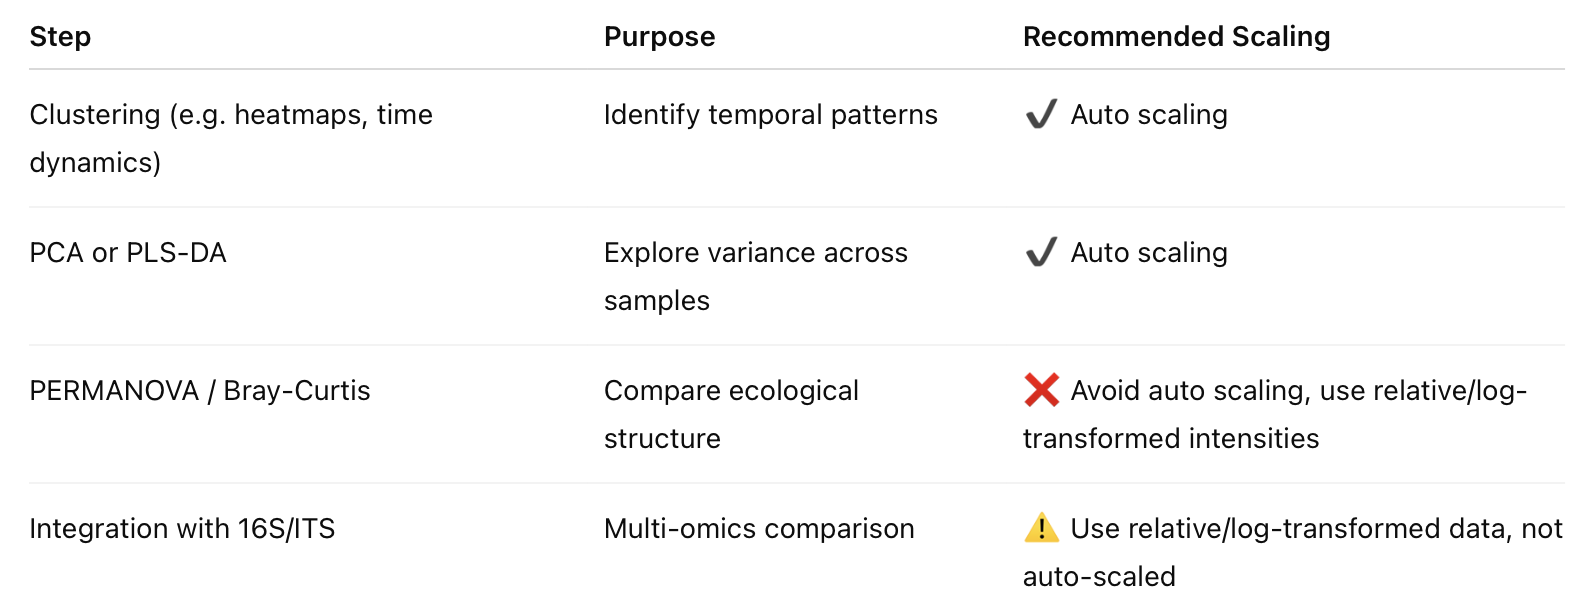

### import and inspect the data first

-->> index is same as 16S index (for easier merging)

In [4]:
#import this csv file: 20250515_fia_feature_table.csv:
# Read the CSV file into a DataFrame
df = pd.read_csv('FIA/20250515_fia_feature_table.csv', index_col=0)

In [5]:
df

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709        NaN  3332.3496  2996.4395  1733.0049   
366294_255-LP4-16S-0755  2102.3086  4728.7440  3892.5898  4936.0510   
366294_237-LP4-16S-0737        NaN  5141.7383  3473.3535  2335.4902   
366294_198-LP4-16S-0698        NaN  4768.5780  5265.4920  2333.1348   
366294_240-LP4-16S-0740  1545.6270  4286.2734  2374.1719  2331.8828   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  2470.6016  4856.3830  3134.3040  3251.8809   
366294_196-LP4-16S-0696  2992.1660  6086.2095  2580.0352  4346.1445   
366294_245-LP4-16S-0745  2675.2344  3576.8790  2461.2500  2084.5215   
366294_252-LP4-16S-0752  3538.5093  3010.4082  3589.3398  2401.7246   
366294_212-LP4-16S-0712  2644.2207  2583.8438        NaN  1369.3525   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709        NaN  1712.1084  2154.3008  1668.1982   
366294_255-LP4-16S-0755  3437.5723        NaN  3208.5450  3346.3748   
366294_237-LP4-16S-0737  2146.5742  2759.1562  2624.6406  3602.1938   
366294_198-LP4-16S-0698  2483.0020  3256.9844  2219.1367  5265.4920   
366294_240-LP4-16S-0740  2527.1660  1571.8037  1591.0898  2236.5860   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  2501.8828        NaN  1817.1738        NaN   
366294_196-LP4-16S-0696  4054.9766  2938.8945  1579.9150        NaN   
366294_245-LP4-16S-0745  2283.9140        NaN        NaN  2461.2500   
366294_252-LP4-16S-0752  2074.2246  2376.6270  2250.4883  3337.2500   
366294_212-LP4-16S-0712        NaN  2124.4570        NaN  1869.3545   

                         M101.4429  M101.2945  ...   M406.1193   M370.1392  \
366294_209-LP4-16S-0709  1382.2139  2770.9844  ...  12665.3420         NaN   
366294_255-LP4-16S-0755  2442.0586  4830.4336  ...   8792.0860   7543.7370   
366294_237-LP4-16S-0737  2923.3438  4694.0625  ...   3239.8223   3626.8518   
366294_198-LP4-16S-0698  1920.4082  3330.6230  ...   4562.4920   4705.7397   
366294_240-LP4-16S-0740  2154.5059  3245.0370  ...   1514.1025   2544.0332   
...                            ...        ...  ...         ...         ...   
366294_231-LP4-16S-0731        NaN        NaN  ...         NaN   7514.5500   
366294_196-LP4-16S-0696        NaN  2867.4082  ...   1750.2705  13515.4120   
366294_245-LP4-16S-0745  2344.8027  2220.9336  ...         NaN   6154.8900   
366294_252-LP4-16S-0752  4034.9863  3776.8790  ...   2768.7754  14618.8880   
366294_212-LP4-16S-0712  1675.4482        NaN  ...   1345.3350   2888.1199   

                          M404.1033  M371.1358   M280.9969  M487.3036  \
366294_209-LP4-16S-0709  26206.5550   4272.255   4399.6400        NaN   
366294_255-LP4-16S-0755  12317.7970  27132.783  10296.9230  4364.6150   
366294_237-LP4-16S-0737   5069.8140  12351.266   6977.7790        NaN   
366294_198-LP4-16S-0698   5184.6523  20862.570   7926.6680  3234.6484   
366294_240-LP4-16S-0740   2434.1797   8762.167   5186.3564  1601.9404   
...                             ...        ...         ...        ...   
366294_231-LP4-16S-0731         NaN  28763.312   5856.3540  2152.1035   
366294_196-LP4-16S-0696   1434.3945  56188.574   6194.7360  2425.6836   
366294_245-LP4-16S-0745         NaN  21970.713   5906.2010  2399.9512   
366294_252-LP4-16S-0752   2148.2130  59212.150   4032.1040  2221.4648   
366294_212-LP4-16S-0712         NaN  10890.294   3233.8848  2107.5488   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709  2810.5913  1315.0000  3579.5230  2742.4746  
366294_255-LP4-16S-0755  6170.3984  2862.5880  3707.4644  3940.0283  
366294_237-LP4-16S-0737  4428.0670  1800.0898  3916.0350  3563.0518  
366294_198-LP4-16S-0698  5047.8564  2414.9297  3805.2210  3773.2903  
366294_240-LP4-16S-0740  3453.4531        NaN  2454.6973  2758.9336  
...                            ...        ...        ...        ...  
366294_231-LP4-

In [6]:
df_no_nans = df.fillna(0)
df_no_nans

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709     0.0000  3332.3496  2996.4395  1733.0049   
366294_255-LP4-16S-0755  2102.3086  4728.7440  3892.5898  4936.0510   
366294_237-LP4-16S-0737     0.0000  5141.7383  3473.3535  2335.4902   
366294_198-LP4-16S-0698     0.0000  4768.5780  5265.4920  2333.1348   
366294_240-LP4-16S-0740  1545.6270  4286.2734  2374.1719  2331.8828   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  2470.6016  4856.3830  3134.3040  3251.8809   
366294_196-LP4-16S-0696  2992.1660  6086.2095  2580.0352  4346.1445   
366294_245-LP4-16S-0745  2675.2344  3576.8790  2461.2500  2084.5215   
366294_252-LP4-16S-0752  3538.5093  3010.4082  3589.3398  2401.7246   
366294_212-LP4-16S-0712  2644.2207  2583.8438     0.0000  1369.3525   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709     0.0000  1712.1084  2154.3008  1668.1982   
366294_255-LP4-16S-0755  3437.5723     0.0000  3208.5450  3346.3748   
366294_237-LP4-16S-0737  2146.5742  2759.1562  2624.6406  3602.1938   
366294_198-LP4-16S-0698  2483.0020  3256.9844  2219.1367  5265.4920   
366294_240-LP4-16S-0740  2527.1660  1571.8037  1591.0898  2236.5860   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  2501.8828     0.0000  1817.1738     0.0000   
366294_196-LP4-16S-0696  4054.9766  2938.8945  1579.9150     0.0000   
366294_245-LP4-16S-0745  2283.9140     0.0000     0.0000  2461.2500   
366294_252-LP4-16S-0752  2074.2246  2376.6270  2250.4883  3337.2500   
366294_212-LP4-16S-0712     0.0000  2124.4570     0.0000  1869.3545   

                         M101.4429  M101.2945  ...   M406.1193   M370.1392  \
366294_209-LP4-16S-0709  1382.2139  2770.9844  ...  12665.3420      0.0000   
366294_255-LP4-16S-0755  2442.0586  4830.4336  ...   8792.0860   7543.7370   
366294_237-LP4-16S-0737  2923.3438  4694.0625  ...   3239.8223   3626.8518   
366294_198-LP4-16S-0698  1920.4082  3330.6230  ...   4562.4920   4705.7397   
366294_240-LP4-16S-0740  2154.5059  3245.0370  ...   1514.1025   2544.0332   
...                            ...        ...  ...         ...         ...   
366294_231-LP4-16S-0731     0.0000     0.0000  ...      0.0000   7514.5500   
366294_196-LP4-16S-0696     0.0000  2867.4082  ...   1750.2705  13515.4120   
366294_245-LP4-16S-0745  2344.8027  2220.9336  ...      0.0000   6154.8900   
366294_252-LP4-16S-0752  4034.9863  3776.8790  ...   2768.7754  14618.8880   
366294_212-LP4-16S-0712  1675.4482     0.0000  ...   1345.3350   2888.1199   

                          M404.1033  M371.1358   M280.9969  M487.3036  \
366294_209-LP4-16S-0709  26206.5550   4272.255   4399.6400     0.0000   
366294_255-LP4-16S-0755  12317.7970  27132.783  10296.9230  4364.6150   
366294_237-LP4-16S-0737   5069.8140  12351.266   6977.7790     0.0000   
366294_198-LP4-16S-0698   5184.6523  20862.570   7926.6680  3234.6484   
366294_240-LP4-16S-0740   2434.1797   8762.167   5186.3564  1601.9404   
...                             ...        ...         ...        ...   
366294_231-LP4-16S-0731      0.0000  28763.312   5856.3540  2152.1035   
366294_196-LP4-16S-0696   1434.3945  56188.574   6194.7360  2425.6836   
366294_245-LP4-16S-0745      0.0000  21970.713   5906.2010  2399.9512   
366294_252-LP4-16S-0752   2148.2130  59212.150   4032.1040  2221.4648   
366294_212-LP4-16S-0712      0.0000  10890.294   3233.8848  2107.5488   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709  2810.5913  1315.0000  3579.5230  2742.4746  
366294_255-LP4-16S-0755  6170.3984  2862.5880  3707.4644  3940.0283  
366294_237-LP4-16S-0737  4428.0670  1800.0898  3916.0350  3563.0518  
366294_198-LP4-16S-0698  5047.8564  2414.9297  3805.2210  3773.2903  
366294_240-LP4-16S-0740  3453.4531     0.0000  2454.6973  2758.9336  
...                            ...        ...        ...        ...  
366294_231-LP4-

In [7]:
#save this csv file: 20250515_fia_feature_table_no_nans.csv:
df_no_nans.to_csv('FIA/20250520_fia_feature_table_no_nans.csv')

In [7]:
features = df.copy()

In [8]:
#apply TSS normalization:
# Calculate the total sum of each sample
data_tss = df.div(df.sum(axis=1), axis=0)  # Normalize each row by the sum of all metabolites in the sample

data_tss

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709        NaN   0.001073   0.000965   0.000558   
366294_255-LP4-16S-0755   0.000511   0.001150   0.000946   0.001200   
366294_237-LP4-16S-0737        NaN   0.001709   0.001154   0.000776   
366294_198-LP4-16S-0698        NaN   0.001667   0.001841   0.000816   
366294_240-LP4-16S-0740   0.000785   0.002176   0.001206   0.001184   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000391   0.000769   0.000496   0.000515   
366294_196-LP4-16S-0696   0.000320   0.000650   0.000275   0.000464   
366294_245-LP4-16S-0745   0.000403   0.000539   0.000371   0.000314   
366294_252-LP4-16S-0752   0.000252   0.000215   0.000256   0.000171   
366294_212-LP4-16S-0712   0.000369   0.000361        NaN   0.000191   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709        NaN   0.000551   0.000694   0.000537   
366294_255-LP4-16S-0755   0.000836        NaN   0.000780   0.000814   
366294_237-LP4-16S-0737   0.000713   0.000917   0.000872   0.001197   
366294_198-LP4-16S-0698   0.000868   0.001139   0.000776   0.001841   
366294_240-LP4-16S-0740   0.001283   0.000798   0.000808   0.001136   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000396        NaN   0.000288        NaN   
366294_196-LP4-16S-0696   0.000433   0.000314   0.000169        NaN   
366294_245-LP4-16S-0745   0.000344        NaN        NaN   0.000371   
366294_252-LP4-16S-0752   0.000148   0.000169   0.000160   0.000238   
366294_212-LP4-16S-0712        NaN   0.000297        NaN   0.000261   

                         M101.4429  M101.2945  ...  M406.1193  M370.1392  \
366294_209-LP4-16S-0709   0.000445   0.000892  ...   0.004077        NaN   
366294_255-LP4-16S-0755   0.000594   0.001174  ...   0.002138   0.001834   
366294_237-LP4-16S-0737   0.000972   0.001560  ...   0.001077   0.001205   
366294_198-LP4-16S-0698   0.000671   0.001164  ...   0.001595   0.001645   
366294_240-LP4-16S-0740   0.001094   0.001648  ...   0.000769   0.001292   
...                            ...        ...  ...        ...        ...   
366294_231-LP4-16S-0731        NaN        NaN  ...        NaN   0.001190   
366294_196-LP4-16S-0696        NaN   0.000306  ...   0.000187   0.001443   
366294_245-LP4-16S-0745   0.000353   0.000334  ...        NaN   0.000927   
366294_252-LP4-16S-0752   0.000288   0.000269  ...   0.000197   0.001042   
366294_212-LP4-16S-0712   0.000234        NaN  ...   0.000188   0.000403   

                         M404.1033  M371.1358  M280.9969  M487.3036  \
366294_209-LP4-16S-0709   0.008436   0.001375   0.001416        NaN   
366294_255-LP4-16S-0755   0.002995   0.006597   0.002504   0.001061   
366294_237-LP4-16S-0737   0.001685   0.004105   0.002319        NaN   
366294_198-LP4-16S-0698   0.001813   0.007294   0.002771   0.001131   
366294_240-LP4-16S-0740   0.001236   0.004449   0.002634   0.000813   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731        NaN   0.004555   0.000927   0.000341   
366294_196-LP4-16S-0696   0.000153   0.006000   0.000661   0.000259   
366294_245-LP4-16S-0745        NaN   0.003308   0.000889   0.000361   
366294_252-LP4-16S-0752   0.000153   0.004220   0.000287   0.000158   
366294_212-LP4-16S-0712        NaN   0.001521   0.000452   0.000294   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709   0.000905   0.000423   0.001152   0.000883  
366294_255-LP4-16S-0755   0.001500   0.000696   0.000901   0.000958  
366294_237-LP4-16S-0737   0.001472   0.000598   0.001301   0.001184  
366294_198-LP4-16S-0698   0.001765   0.000844   0.001330   0.001319  
366294_240-LP4-16S-0740   0.001754        NaN   0.001246   0.001401  
...                            ...        ...        ...        ...  
366294_231-LP4-16S-0731   0.000933   0.000412   0.000629   0.00

In [9]:
features = data_tss.copy()

In [10]:
features = features.fillna(0)

In [11]:
features

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709   0.000000   0.001073   0.000965   0.000558   
366294_255-LP4-16S-0755   0.000511   0.001150   0.000946   0.001200   
366294_237-LP4-16S-0737   0.000000   0.001709   0.001154   0.000776   
366294_198-LP4-16S-0698   0.000000   0.001667   0.001841   0.000816   
366294_240-LP4-16S-0740   0.000785   0.002176   0.001206   0.001184   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000391   0.000769   0.000496   0.000515   
366294_196-LP4-16S-0696   0.000320   0.000650   0.000275   0.000464   
366294_245-LP4-16S-0745   0.000403   0.000539   0.000371   0.000314   
366294_252-LP4-16S-0752   0.000252   0.000215   0.000256   0.000171   
366294_212-LP4-16S-0712   0.000369   0.000361   0.000000   0.000191   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709   0.000000   0.000551   0.000694   0.000537   
366294_255-LP4-16S-0755   0.000836   0.000000   0.000780   0.000814   
366294_237-LP4-16S-0737   0.000713   0.000917   0.000872   0.001197   
366294_198-LP4-16S-0698   0.000868   0.001139   0.000776   0.001841   
366294_240-LP4-16S-0740   0.001283   0.000798   0.000808   0.001136   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000396   0.000000   0.000288   0.000000   
366294_196-LP4-16S-0696   0.000433   0.000314   0.000169   0.000000   
366294_245-LP4-16S-0745   0.000344   0.000000   0.000000   0.000371   
366294_252-LP4-16S-0752   0.000148   0.000169   0.000160   0.000238   
366294_212-LP4-16S-0712   0.000000   0.000297   0.000000   0.000261   

                         M101.4429  M101.2945  ...  M406.1193  M370.1392  \
366294_209-LP4-16S-0709   0.000445   0.000892  ...   0.004077   0.000000   
366294_255-LP4-16S-0755   0.000594   0.001174  ...   0.002138   0.001834   
366294_237-LP4-16S-0737   0.000972   0.001560  ...   0.001077   0.001205   
366294_198-LP4-16S-0698   0.000671   0.001164  ...   0.001595   0.001645   
366294_240-LP4-16S-0740   0.001094   0.001648  ...   0.000769   0.001292   
...                            ...        ...  ...        ...        ...   
366294_231-LP4-16S-0731   0.000000   0.000000  ...   0.000000   0.001190   
366294_196-LP4-16S-0696   0.000000   0.000306  ...   0.000187   0.001443   
366294_245-LP4-16S-0745   0.000353   0.000334  ...   0.000000   0.000927   
366294_252-LP4-16S-0752   0.000288   0.000269  ...   0.000197   0.001042   
366294_212-LP4-16S-0712   0.000234   0.000000  ...   0.000188   0.000403   

                         M404.1033  M371.1358  M280.9969  M487.3036  \
366294_209-LP4-16S-0709   0.008436   0.001375   0.001416   0.000000   
366294_255-LP4-16S-0755   0.002995   0.006597   0.002504   0.001061   
366294_237-LP4-16S-0737   0.001685   0.004105   0.002319   0.000000   
366294_198-LP4-16S-0698   0.001813   0.007294   0.002771   0.001131   
366294_240-LP4-16S-0740   0.001236   0.004449   0.002634   0.000813   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000000   0.004555   0.000927   0.000341   
366294_196-LP4-16S-0696   0.000153   0.006000   0.000661   0.000259   
366294_245-LP4-16S-0745   0.000000   0.003308   0.000889   0.000361   
366294_252-LP4-16S-0752   0.000153   0.004220   0.000287   0.000158   
366294_212-LP4-16S-0712   0.000000   0.001521   0.000452   0.000294   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709   0.000905   0.000423   0.001152   0.000883  
366294_255-LP4-16S-0755   0.001500   0.000696   0.000901   0.000958  
366294_237-LP4-16S-0737   0.001472   0.000598   0.001301   0.001184  
366294_198-LP4-16S-0698   0.001765   0.000844   0.001330   0.001319  
366294_240-LP4-16S-0740   0.001754   0.000000   0.001246   0.001401  
...                            ...        ...        ...        ...  
366294_231-LP4-16S-0731   0.000933   0.000412   0.000629   0.00

### prevalence filter (per replicate, so threshold = 3)

In [52]:
prevalence

M275.1469    0.030194
M101.3082    0.069472
M101.3289    0.058551
M101.3866    0.057197
M101.1397    0.042022
               ...   
M487.3036    0.034807
M600.3885    0.104261
M602.3878    0.044821
M650.4282    0.078146
M627.4082    0.069708
Length: 1097, dtype: float64

In [12]:
# Recompute prevalence: Count the number of non-zero values in each feature column (per sample)
prevalence = (features > 0).sum(axis=0)  # Count occurrences where feature > 0

# Check the prevalence for the first few features
print("Prevalence for first few features:\n", prevalence.head())

# Apply threshold: keep features present in ≥3 samples
prevalence_threshold = 3
filtered_features = prevalence[prevalence >= prevalence_threshold].index

# Check which features meet the threshold
print(f"Features with prevalence >= {prevalence_threshold}: {filtered_features}")

# Subset the filtered table
features_filtered = features[filtered_features].copy()

# Check the final filtered data
print(f"Filtered features DataFrame shape: {features_filtered.shape}")
print(features_filtered.head())



Prevalence for first few features:
 M275.1469    64
M101.3082    77
M101.3289    76
M101.3866    84
M101.1397    73
dtype: int64
Features with prevalence >= 3: Index(['M275.1469', 'M101.3082', 'M101.3289', 'M101.3866', 'M101.1397',
       'M101.4131', 'M101.4016', 'M101.3213', 'M101.4429', 'M101.2945',
       ...
       'M406.1193', 'M370.1392', 'M404.1033', 'M371.1358', 'M280.9969',
       'M487.3036', 'M600.3885', 'M602.3878', 'M650.4282', 'M627.4082'],
      dtype='object', length=1096)
Filtered features DataFrame shape: (90, 1096)
                         M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709   0.000000   0.001073   0.000965   0.000558   
366294_255-LP4-16S-0755   0.000511   0.001150   0.000946   0.001200   
366294_237-LP4-16S-0737   0.000000   0.001709   0.001154   0.000776   
366294_198-LP4-16S-0698   0.000000   0.001667   0.001841   0.000816   
366294_240-LP4-16S-0740   0.000785   0.002176   0.001206   0.001184   

                         M101.13

In [13]:
features_filtered

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709   0.000000   0.001073   0.000965   0.000558   
366294_255-LP4-16S-0755   0.000511   0.001150   0.000946   0.001200   
366294_237-LP4-16S-0737   0.000000   0.001709   0.001154   0.000776   
366294_198-LP4-16S-0698   0.000000   0.001667   0.001841   0.000816   
366294_240-LP4-16S-0740   0.000785   0.002176   0.001206   0.001184   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000391   0.000769   0.000496   0.000515   
366294_196-LP4-16S-0696   0.000320   0.000650   0.000275   0.000464   
366294_245-LP4-16S-0745   0.000403   0.000539   0.000371   0.000314   
366294_252-LP4-16S-0752   0.000252   0.000215   0.000256   0.000171   
366294_212-LP4-16S-0712   0.000369   0.000361   0.000000   0.000191   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709   0.000000   0.000551   0.000694   0.000537   
366294_255-LP4-16S-0755   0.000836   0.000000   0.000780   0.000814   
366294_237-LP4-16S-0737   0.000713   0.000917   0.000872   0.001197   
366294_198-LP4-16S-0698   0.000868   0.001139   0.000776   0.001841   
366294_240-LP4-16S-0740   0.001283   0.000798   0.000808   0.001136   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000396   0.000000   0.000288   0.000000   
366294_196-LP4-16S-0696   0.000433   0.000314   0.000169   0.000000   
366294_245-LP4-16S-0745   0.000344   0.000000   0.000000   0.000371   
366294_252-LP4-16S-0752   0.000148   0.000169   0.000160   0.000238   
366294_212-LP4-16S-0712   0.000000   0.000297   0.000000   0.000261   

                         M101.4429  M101.2945  ...  M406.1193  M370.1392  \
366294_209-LP4-16S-0709   0.000445   0.000892  ...   0.004077   0.000000   
366294_255-LP4-16S-0755   0.000594   0.001174  ...   0.002138   0.001834   
366294_237-LP4-16S-0737   0.000972   0.001560  ...   0.001077   0.001205   
366294_198-LP4-16S-0698   0.000671   0.001164  ...   0.001595   0.001645   
366294_240-LP4-16S-0740   0.001094   0.001648  ...   0.000769   0.001292   
...                            ...        ...  ...        ...        ...   
366294_231-LP4-16S-0731   0.000000   0.000000  ...   0.000000   0.001190   
366294_196-LP4-16S-0696   0.000000   0.000306  ...   0.000187   0.001443   
366294_245-LP4-16S-0745   0.000353   0.000334  ...   0.000000   0.000927   
366294_252-LP4-16S-0752   0.000288   0.000269  ...   0.000197   0.001042   
366294_212-LP4-16S-0712   0.000234   0.000000  ...   0.000188   0.000403   

                         M404.1033  M371.1358  M280.9969  M487.3036  \
366294_209-LP4-16S-0709   0.008436   0.001375   0.001416   0.000000   
366294_255-LP4-16S-0755   0.002995   0.006597   0.002504   0.001061   
366294_237-LP4-16S-0737   0.001685   0.004105   0.002319   0.000000   
366294_198-LP4-16S-0698   0.001813   0.007294   0.002771   0.001131   
366294_240-LP4-16S-0740   0.001236   0.004449   0.002634   0.000813   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000000   0.004555   0.000927   0.000341   
366294_196-LP4-16S-0696   0.000153   0.006000   0.000661   0.000259   
366294_245-LP4-16S-0745   0.000000   0.003308   0.000889   0.000361   
366294_252-LP4-16S-0752   0.000153   0.004220   0.000287   0.000158   
366294_212-LP4-16S-0712   0.000000   0.001521   0.000452   0.000294   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709   0.000905   0.000423   0.001152   0.000883  
366294_255-LP4-16S-0755   0.001500   0.000696   0.000901   0.000958  
366294_237-LP4-16S-0737   0.001472   0.000598   0.001301   0.001184  
366294_198-LP4-16S-0698   0.001765   0.000844   0.001330   0.001319  
366294_240-LP4-16S-0740   0.001754   0.000000   0.001246   0.001401  
...                            ...        ...        ...        ...  
366294_231-LP4-16S-0731   0.000933   0.000412   0.000629   0.00

In [55]:
# Save the rarefied DataFrame to a CSV file
features_filtered.to_csv('FIA/20250516_fia_feature_table_tss.csv')

### log transform

In [14]:
features_for_log = df.fillna(0)

In [15]:
import numpy as np
#also do a log-transform:
# Log-transform the data


data_log = np.log(features_for_log + 1)  # Add small constant to avoid log(0)


In [16]:
# Recompute prevalence: Count the number of non-zero values in each feature column (per sample)
prevalence = (data_log > 0).sum(axis=0)  # Count occurrences where feature > 0

# Check the prevalence for the first few features
print("Prevalence for first few features:\n", prevalence.head())

# Apply threshold: keep features present in ≥3 samples
prevalence_threshold = 3
filtered_log = prevalence[prevalence >= prevalence_threshold].index

# Check which features meet the threshold
print(f"Features with prevalence >= {prevalence_threshold}: {filtered_log}")

# Subset the filtered table
filtered_log_df = data_log[filtered_log].copy()

# Check the final filtered data
print(f"Filtered features DataFrame shape: {filtered_log_df.shape}")
print(filtered_log_df.head())

Prevalence for first few features:
 M275.1469    64
M101.3082    77
M101.3289    76
M101.3866    84
M101.1397    73
dtype: int64
Features with prevalence >= 3: Index(['M275.1469', 'M101.3082', 'M101.3289', 'M101.3866', 'M101.1397',
       'M101.4131', 'M101.4016', 'M101.3213', 'M101.4429', 'M101.2945',
       ...
       'M406.1193', 'M370.1392', 'M404.1033', 'M371.1358', 'M280.9969',
       'M487.3036', 'M600.3885', 'M602.3878', 'M650.4282', 'M627.4082'],
      dtype='object', length=1096)
Filtered features DataFrame shape: (90, 1096)
                         M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709   0.000000   8.111733   8.005514   7.458189   
366294_255-LP4-16S-0755   7.651267   8.461626   8.267087   8.504523   
366294_237-LP4-16S-0737   0.000000   8.545341   8.153164   7.756405   
366294_198-LP4-16S-0698   0.000000   8.470013   8.569120   7.755397   
366294_240-LP4-16S-0740   7.343832   8.363406   7.772825   7.754860   

                         M101.13

In [17]:
filtered_log_df

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709   0.000000   8.111733   8.005514   7.458189   
366294_255-LP4-16S-0755   7.651267   8.461626   8.267087   8.504523   
366294_237-LP4-16S-0737   0.000000   8.545341   8.153164   7.756405   
366294_198-LP4-16S-0698   0.000000   8.470013   8.569120   7.755397   
366294_240-LP4-16S-0740   7.343832   8.363406   7.772825   7.754860   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   7.812622   8.488255   8.050481   8.087296   
366294_196-LP4-16S-0696   8.004087   8.713945   7.855946   8.377274   
366294_245-LP4-16S-0745   7.892166   8.182525   7.808831   7.642774   
366294_252-LP4-16S-0752   8.171743   8.010163   8.186002   7.784359   
366294_212-LP4-16S-0712   7.880510   7.857420   0.000000   7.222823   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709   0.000000   7.446065   7.675686   7.420099   
366294_255-LP4-16S-0755   8.142812   0.000000   8.073884   8.115932   
366294_237-LP4-16S-0737   7.672094   7.923043   7.873080   8.189576   
366294_198-LP4-16S-0698   7.817626   8.088864   7.705324   8.569120   
366294_240-LP4-16S-0740   7.835249   7.360615   7.372803   7.713153   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   7.825198   0.000000   7.505588   0.000000   
366294_196-LP4-16S-0696   8.307947   7.986129   7.365759   0.000000   
366294_245-LP4-16S-0745   7.734084   0.000000   0.000000   7.808831   
366294_252-LP4-16S-0752   7.637825   7.773858   7.719347   8.113202   
366294_212-LP4-16S-0712   0.000000   7.661742   0.000000   7.533883   

                         M101.4429  M101.2945  ...  M406.1193  M370.1392  \
366294_209-LP4-16S-0709   7.232165   7.927319  ...   9.446704   0.000000   
366294_255-LP4-16S-0755   7.801006   8.482899  ...   9.081721   8.928606   
366294_237-LP4-16S-0737   7.980825   8.454267  ...   8.083582   8.196396   
366294_198-LP4-16S-0698   7.560814   8.111215  ...   8.425843   8.456751   
366294_240-LP4-16S-0740   7.675781   8.085190  ...   7.323238   7.841899   
...                            ...        ...  ...        ...        ...   
366294_231-LP4-16S-0731   0.000000   0.000000  ...   0.000000   8.924729   
366294_196-LP4-16S-0696   0.000000   7.961513  ...   7.468097   9.511660   
366294_245-LP4-16S-0745   7.760383   7.706133  ...   0.000000   8.725165   
366294_252-LP4-16S-0752   8.303006   8.236918  ...   7.926522   9.590138   
366294_212-LP4-16S-0712   7.424433   0.000000  ...   7.205141   7.968707   

                         M404.1033  M371.1358  M280.9969  M487.3036  \
366294_209-LP4-16S-0709  10.173803   8.360131   8.389505   0.000000   
366294_255-LP4-16S-0755   9.418882  10.208535   9.239698   8.381514   
366294_237-LP4-16S-0737   8.531257   9.421595   8.850629   0.000000   
366294_198-LP4-16S-0698   8.553651   9.945760   8.978114   8.081985   
366294_240-LP4-16S-0740   7.797776   9.078313   8.553979   7.379595   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000000  10.266891   8.675453   7.674666   
366294_196-LP4-16S-0696   7.269195  10.936487   8.731617   7.794281   
366294_245-LP4-16S-0745   0.000000   9.997511   8.683927   7.783620   
366294_252-LP4-16S-0752   7.672857  10.988899   8.302292   7.706372   
366294_212-LP4-16S-0712   0.000000   9.295719   8.081749   7.653755   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709   7.941506   7.182352   8.183264   7.916980  
366294_255-LP4-16S-0755   8.727681   7.959831   8.218373   8.279197  
366294_237-LP4-16S-0737   8.395944   7.496147   8.273090   8.178653  
366294_198-LP4-16S-0698   8.526917   7.789839   8.244392   8.235968  
366294_240-LP4-16S-0740   8.147419   0.000000   7.806166   7.922962  
...                            ...        ...        ...        ...  
366294_231-LP4-16S-0731   8.681982   7.863273   8.287075   8.12

In [60]:
#export:
# Save the rarefied DataFrame to a CSV file
filtered_log_df.to_csv('FIA/20250516_fia_feature_table_log.csv')

In [18]:
#then add a z-score on top:

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data_log_filtered' is your original DataFrame

# Initialize the scaler
scaler = StandardScaler()

# Apply Z-score normalization (auto-scaling)
data_normalized_log_z = scaler.fit_transform(filtered_log_df)

# Convert the result back to a DataFrame, preserving column names
data_normalized_log_z_df = pd.DataFrame(data_normalized_log_z, columns=filtered_log_df.columns, index=filtered_log_df.index)

# Check the first few rows of the new DataFrame
data_normalized_log_z_df


M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709  -1.566384   0.348860   0.393375  -0.003192   
366294_255-LP4-16S-0755   0.592925   0.468537   0.482133   0.515388   
366294_237-LP4-16S-0737  -1.566384   0.497171   0.443476   0.144608   
366294_198-LP4-16S-0698  -1.566384   0.471406   0.584620   0.144109   
366294_240-LP4-16S-0740   0.506162   0.434942   0.314417   0.143843   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.638462   0.477645   0.408633   0.308603   
366294_196-LP4-16S-0696   0.692497   0.554840   0.342622   0.452321   
366294_245-LP4-16S-0745   0.660911   0.373074   0.326635   0.088291   
366294_252-LP4-16S-0752   0.739812   0.314120   0.454619   0.158463   
366294_212-LP4-16S-0712   0.657621   0.261876  -2.323099  -0.119843   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709  -2.065297   0.425312   0.438848   0.063325   
366294_255-LP4-16S-0755   0.570920  -1.753785   0.565037   0.332988   
366294_237-LP4-16S-0737   0.418527   0.564900   0.501402   0.361529   
366294_198-LP4-16S-0698   0.465642   0.613428   0.448240   0.508617   
366294_240-LP4-16S-0740   0.471348   0.400305   0.342864   0.176895   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.468094  -1.753785   0.384944  -2.812264   
366294_196-LP4-16S-0696   0.624383   0.583363   0.340632  -2.812264   
366294_245-LP4-16S-0745   0.438596  -1.753785  -1.993581   0.213974   
366294_252-LP4-16S-0752   0.407432   0.521241   0.452684   0.331931   
366294_212-LP4-16S-0712  -2.065297   0.488431  -1.993581   0.107421   

                         M101.4429  M101.2945  ...  M406.1193  M370.1392  \
366294_209-LP4-16S-0709   0.448946   0.318984  ...   0.915951  -8.061340   
366294_255-LP4-16S-0755   0.614329   0.511211  ...   0.804862   0.112019   
366294_237-LP4-16S-0737   0.666610   0.501305  ...   0.501062  -0.558255   
366294_198-LP4-16S-0698   0.544497   0.382611  ...   0.605235  -0.319923   
366294_240-LP4-16S-0740   0.577922   0.373606  ...   0.269638  -0.882766   
...                            ...        ...  ...        ...        ...   
366294_231-LP4-16S-0731  -1.653710  -2.423818  ...  -1.959313   0.108471   
366294_196-LP4-16S-0696  -1.653710   0.330815  ...   0.313728   0.645755   
366294_245-LP4-16S-0745   0.602519   0.242455  ...  -1.959313  -0.074213   
366294_252-LP4-16S-0752   0.760279   0.426103  ...   0.453258   0.717594   
366294_212-LP4-16S-0712   0.504846  -2.423818  ...   0.233693  -0.766684   

                         M404.1033  M371.1358  M280.9969  M487.3036  \
366294_209-LP4-16S-0709   1.018920  -2.886795  -1.386267  -1.996552   
366294_255-LP4-16S-0755   0.778127  -0.032522   2.283084   0.729727   
366294_237-LP4-16S-0737   0.495006  -1.247701   0.603901  -1.996552   
366294_198-LP4-16S-0698   0.502149  -0.438295   1.154115   0.632298   
366294_240-LP4-16S-0740   0.261051  -1.777791  -0.676411   0.403830   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  -2.226166   0.057590  -0.152142   0.499808   
366294_196-LP4-16S-0696   0.092452   1.091568   0.090254   0.538716   
366294_245-LP4-16S-0745  -2.226166  -0.358381  -0.115568   0.535248   
366294_252-LP4-16S-0752   0.221206   1.172503  -1.762673   0.510121   
366294_212-LP4-16S-0712  -2.226166  -1.442076  -2.714516   0.493007   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709  -3.502042  -0.616270  -1.043830  -1.917501  
366294_255-LP4-16S-0755   0.633751   0.315543  -0.702891   0.948903  
366294_237-LP4-16S-0737  -1.111400  -0.240184  -0.171540   0.153250  
366294_198-LP4-16S-0698  -0.422397   0.111807  -0.450224   0.606808  
366294_240-LP4-16S-0740  -2.418803  -9.224363  -4.705782  -1.870167  
...                            ...        ...        ...        ...  
366294_231-LP4-16S-0731   0.393345   0.199819  -0.035732  -0.29

In [62]:
#save:
# Save the normalized DataFrame to a CSV file
data_normalized_log_z_df.to_csv('FIA/20250516_fia_feature_table_log_z.csv')

### then only z-score norm.

In [19]:
# Recompute prevalence: Count the number of non-zero values in each feature column (per sample)
prevalence = (features_for_log > 0).sum(axis=0)  # Count occurrences where feature > 0

# Check the prevalence for the first few features
print("Prevalence for first few features:\n", prevalence.head())

# Apply threshold: keep features present in ≥3 samples
prevalence_threshold = 3
filtered_z = prevalence[prevalence >= prevalence_threshold].index

# Check which features meet the threshold
print(f"Features with prevalence >= {prevalence_threshold}: {filtered_z}")

# Subset the filtered table
filtered_z_df = features_for_log[filtered_z].copy()

# Check the final filtered data
print(f"Filtered features DataFrame shape: {filtered_z_df.shape}")
print(filtered_z_df.head())

Prevalence for first few features:
 M275.1469    64
M101.3082    77
M101.3289    76
M101.3866    84
M101.1397    73
dtype: int64
Features with prevalence >= 3: Index(['M275.1469', 'M101.3082', 'M101.3289', 'M101.3866', 'M101.1397',
       'M101.4131', 'M101.4016', 'M101.3213', 'M101.4429', 'M101.2945',
       ...
       'M406.1193', 'M370.1392', 'M404.1033', 'M371.1358', 'M280.9969',
       'M487.3036', 'M600.3885', 'M602.3878', 'M650.4282', 'M627.4082'],
      dtype='object', length=1096)
Filtered features DataFrame shape: (90, 1096)
                         M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709     0.0000  3332.3496  2996.4395  1733.0049   
366294_255-LP4-16S-0755  2102.3086  4728.7440  3892.5898  4936.0510   
366294_237-LP4-16S-0737     0.0000  5141.7383  3473.3535  2335.4902   
366294_198-LP4-16S-0698     0.0000  4768.5780  5265.4920  2333.1348   
366294_240-LP4-16S-0740  1545.6270  4286.2734  2374.1719  2331.8828   

                         M101.13

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data_log_filtered' is your original DataFrame

# Initialize the scaler
scaler = StandardScaler()

# Apply Z-score normalization (auto-scaling)
data_normalized_z = scaler.fit_transform(filtered_z_df)

# Convert the result back to a DataFrame, preserving column names
data_normalized_z_df = pd.DataFrame(data_normalized_z, columns=filtered_z_df.columns, index=filtered_z_df.index)

# Check the first few rows of the new DataFrame
data_normalized_z_df

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709  -1.440400  -0.106560   0.078032  -0.974798   
366294_255-LP4-16S-0755   0.248334   0.694217   0.700585   1.677521   
366294_237-LP4-16S-0737  -1.440400   0.931053   0.409343  -0.475903   
366294_198-LP4-16S-0698  -1.440400   0.717060   1.654336  -0.477853   
366294_240-LP4-16S-0740  -0.198835   0.440478  -0.354255  -0.478890   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.544175   0.767413   0.173806   0.282925   
366294_196-LP4-16S-0696   0.963135   1.472669  -0.211243   1.189042   
366294_245-LP4-16S-0745   0.708552   0.033668  -0.293762  -0.683720   
366294_252-LP4-16S-0752   1.402000  -0.291180   0.489918  -0.421057   
366294_212-LP4-16S-0712   0.683639  -0.535798  -2.003585  -1.275924   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709  -1.719186  -0.332949  -0.005587  -1.036377   
366294_255-LP4-16S-0755   0.969663  -1.548622   0.827103   0.059906   
366294_237-LP4-16S-0737  -0.040148   0.410502   0.365908   0.227022   
366294_198-LP4-16S-0698   0.223004   0.763982   0.045623   1.313585   
366294_240-LP4-16S-0740   0.257549  -0.432571  -0.450437  -0.665073   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.237773  -1.548622  -0.271866  -2.126141   
366294_196-LP4-16S-0696   1.452594   0.538124  -0.459263  -2.126141   
366294_245-LP4-16S-0745   0.067279  -1.548622  -1.707152  -0.518309   
366294_252-LP4-16S-0752  -0.096739   0.138889   0.070386   0.053945   
366294_212-LP4-16S-0712  -1.719186  -0.040163  -1.707152  -0.904970   

                         M101.4429  M101.2945  ...  M406.1193  M370.1392  \
366294_209-LP4-16S-0709  -0.325069  -0.260716  ...   1.830829  -1.868436   
366294_255-LP4-16S-0755   0.514847   0.985339  ...   1.052018  -0.206409   
366294_237-LP4-16S-0737   0.896260   0.902828  ...  -0.064397  -1.069373   
366294_198-LP4-16S-0698   0.101444   0.077890  ...   0.201558  -0.831673   
366294_240-LP4-16S-0740   0.286964   0.026106  ...  -0.411394  -1.307938   
...                            ...        ...  ...        ...        ...   
366294_231-LP4-16S-0731  -1.420459  -1.937279  ...  -0.715840  -0.212840   
366294_196-LP4-16S-0696  -1.420459  -0.202375  ...  -0.363907   1.109263   
366294_245-LP4-16S-0745   0.437772  -0.593520  ...  -0.715840  -0.512398   
366294_252-LP4-16S-0752   1.777225   0.347893  ...  -0.159112   1.352380   
366294_212-LP4-16S-0712  -0.092684  -1.937279  ...  -0.445328  -1.232129   

                         M404.1033  M371.1358  M280.9969  M487.3036  \
366294_209-LP4-16S-0709   1.523388  -1.536343  -1.301796  -1.803303   
366294_255-LP4-16S-0755   0.446246  -0.331663   2.899690   2.682807   
366294_237-LP4-16S-0737  -0.115872  -1.110604   0.534985  -1.803303   
366294_198-LP4-16S-0698  -0.106965  -0.662084   1.211015   1.521386   
366294_240-LP4-16S-0740  -0.320278  -1.299739  -0.741305  -0.156770   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731  -0.509061  -0.245739  -0.263968   0.408707   
366294_196-LP4-16S-0696  -0.397817   1.199490  -0.022890   0.689903   
366294_245-LP4-16S-0745  -0.509061  -0.603688  -0.228455   0.663454   
366294_252-LP4-16S-0752  -0.342456   1.358823  -1.563645   0.479999   
366294_212-LP4-16S-0712  -0.509061  -1.187593  -2.132332   0.362912   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709  -2.894468  -2.339606  -1.117462  -1.569455  
366294_255-LP4-16S-0755   0.639574   0.977308  -0.782123   0.834207  
366294_237-LP4-16S-0737  -1.193112  -1.299923  -0.235451   0.077561  
366294_198-LP4-16S-0698  -0.541181   0.017851  -0.525899   0.499540  
366294_240-LP4-16S-0740  -2.218268  -5.158020  -4.065674  -1.536419  
...                            ...        ...        ...        ...  
366294_231-LP4-16S-0731   0.349599   0.412403  -0.090861  -0.31

In [65]:
#save:
# Save the normalized DataFrame to a CSV file
data_normalized_z_df.to_csv('FIA/20250516_fia_feature_table_z.csv')

#then import all of them and check how it may impact variance spread

In [5]:
# import this csv: FIA/20250516_fia_feature_table_z.csv
# Read the CSV file into a DataFrame
df_z = pd.read_csv('FIA/20250516_fia_feature_table_z.csv', index_col=0)

df_log = pd.read_csv('FIA/20250516_fia_feature_table_log.csv', index_col=0)

df_log_z = pd.read_csv('FIA/20250516_fia_feature_table_log_z.csv', index_col=0)

df_tss = pd.read_csv('FIA/20250516_fia_feature_table_tss.csv', index_col=0)


## compute PCAs

In [33]:
# from scipy.spatial.distance import pdist, squareform
# from sklearn.metrics import pairwise_distances

# # Bray-Curtis dissimilarity
# bray_dm_FIA = pd.DataFrame(
#     squareform(pdist(df_rarefied, metric='braycurtis')),
#     index=df_rarefied.index,
#     columns=df_rarefied.index
# )

# # Convert to binary (presence/absence)
# binary = df_rarefied > 0

# # Jaccard distance
# jaccard_dm_FIA = pd.DataFrame(
#     squareform(pdist(binary, metric='jaccard')),
#     index=df_rarefied.index,
#     columns=df_rarefied.index
# )



In [34]:
# #convert them to distance matrices:
# from skbio.stats.distance import DistanceMatrix

# # Bray-Curtis
# bray_dm_FIA = DistanceMatrix(bray_dm_FIA.values, ids=bray_dm_FIA.index)

# # Jaccard
# jaccard_dm_FIA = DistanceMatrix(jaccard_dm_FIA.values, ids=jaccard_dm_FIA.index)


In [35]:
# from skbio.stats.ordination import pcoa

# dms = {
#     'bray_dm_FIA': bray_dm_FIA,
#     'jaccard_dm_FIA': jaccard_dm_FIA
#     }

then, calculate pcoas

In [36]:
# import pandas as pd
# from skbio.stats.ordination import pcoa



# # Function to compute PCoA
# def compute_pcoa(distance_matrix, n_components=2):
#     """Performs PCoA on a distance matrix and returns coordinates + variance explained."""
#     # Run PCoA
#     pcoa_res = pcoa(distance_matrix)
    
#     # Extract transformed coordinates
#     coordinates = pd.DataFrame(
#         pcoa_res.samples.iloc[:, :n_components].values,  # Get first n PCoA components
#         index=distance_matrix.ids,  # Keep original sample names
#         columns=[f"PCo{i+1}" for i in range(n_components)]  # Rename components
#     )
    
#     # Extract variance explained (proportion of total variance per component)
#     variance_explained = pcoa_res.proportion_explained.values[:n_components]

#     return coordinates, variance_explained

In [67]:
df_tss

M275.1469  M101.3082  M101.3289  M101.3866  \
366294_209-LP4-16S-0709   0.000000   0.001073   0.000965   0.000558   
366294_255-LP4-16S-0755   0.000511   0.001150   0.000946   0.001200   
366294_237-LP4-16S-0737   0.000000   0.001709   0.001154   0.000776   
366294_198-LP4-16S-0698   0.000000   0.001667   0.001841   0.000816   
366294_240-LP4-16S-0740   0.000785   0.002176   0.001206   0.001184   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000391   0.000769   0.000496   0.000515   
366294_196-LP4-16S-0696   0.000320   0.000650   0.000275   0.000464   
366294_245-LP4-16S-0745   0.000403   0.000539   0.000371   0.000314   
366294_252-LP4-16S-0752   0.000252   0.000215   0.000256   0.000171   
366294_212-LP4-16S-0712   0.000369   0.000361   0.000000   0.000191   

                         M101.1397  M101.4131  M101.4016  M101.3213  \
366294_209-LP4-16S-0709   0.000000   0.000551   0.000694   0.000537   
366294_255-LP4-16S-0755   0.000836   0.000000   0.000780   0.000814   
366294_237-LP4-16S-0737   0.000713   0.000917   0.000872   0.001197   
366294_198-LP4-16S-0698   0.000868   0.001139   0.000776   0.001841   
366294_240-LP4-16S-0740   0.001283   0.000798   0.000808   0.001136   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000396   0.000000   0.000288   0.000000   
366294_196-LP4-16S-0696   0.000433   0.000314   0.000169   0.000000   
366294_245-LP4-16S-0745   0.000344   0.000000   0.000000   0.000371   
366294_252-LP4-16S-0752   0.000148   0.000169   0.000160   0.000238   
366294_212-LP4-16S-0712   0.000000   0.000297   0.000000   0.000261   

                         M101.4429  M101.2945  ...  M406.1193  M370.1392  \
366294_209-LP4-16S-0709   0.000445   0.000892  ...   0.004077   0.000000   
366294_255-LP4-16S-0755   0.000594   0.001174  ...   0.002138   0.001834   
366294_237-LP4-16S-0737   0.000972   0.001560  ...   0.001077   0.001205   
366294_198-LP4-16S-0698   0.000671   0.001164  ...   0.001595   0.001645   
366294_240-LP4-16S-0740   0.001094   0.001648  ...   0.000769   0.001292   
...                            ...        ...  ...        ...        ...   
366294_231-LP4-16S-0731   0.000000   0.000000  ...   0.000000   0.001190   
366294_196-LP4-16S-0696   0.000000   0.000306  ...   0.000187   0.001443   
366294_245-LP4-16S-0745   0.000353   0.000334  ...   0.000000   0.000927   
366294_252-LP4-16S-0752   0.000288   0.000269  ...   0.000197   0.001042   
366294_212-LP4-16S-0712   0.000234   0.000000  ...   0.000188   0.000403   

                         M404.1033  M371.1358  M280.9969  M487.3036  \
366294_209-LP4-16S-0709   0.008436   0.001375   0.001416   0.000000   
366294_255-LP4-16S-0755   0.002995   0.006597   0.002504   0.001061   
366294_237-LP4-16S-0737   0.001685   0.004105   0.002319   0.000000   
366294_198-LP4-16S-0698   0.001813   0.007294   0.002771   0.001131   
366294_240-LP4-16S-0740   0.001236   0.004449   0.002634   0.000813   
...                            ...        ...        ...        ...   
366294_231-LP4-16S-0731   0.000000   0.004555   0.000927   0.000341   
366294_196-LP4-16S-0696   0.000153   0.006000   0.000661   0.000259   
366294_245-LP4-16S-0745   0.000000   0.003308   0.000889   0.000361   
366294_252-LP4-16S-0752   0.000153   0.004220   0.000287   0.000158   
366294_212-LP4-16S-0712   0.000000   0.001521   0.000452   0.000294   

                         M600.3885  M602.3878  M650.4282  M627.4082  
366294_209-LP4-16S-0709   0.000905   0.000423   0.001152   0.000883  
366294_255-LP4-16S-0755   0.001500   0.000696   0.000901   0.000958  
366294_237-LP4-16S-0737   0.001472   0.000598   0.001301   0.001184  
366294_198-LP4-16S-0698   0.001765   0.000844   0.001330   0.001319  
366294_240-LP4-16S-0740   0.001754   0.000000   0.001246   0.001401  
...                            ...        ...        ...        ...  
366294_231-LP4-16S-0731   0.000933   0.000412   0.000629   0.00

pcas instead of pcoas:

In [22]:
import pandas as pd
from sklearn.decomposition import PCA

# Function to compute PCA
def compute_pca(data, n_components=2):
    """Performs PCA on a DataFrame and returns principal components + variance explained."""
    
    # Initialize PCA
    pca = PCA(n_components=n_components)
    
    # Fit and transform the data to get the principal components
    pca_result = pca.fit_transform(data)
    
    # Convert the result to a DataFrame
    pca_coordinates = pd.DataFrame(
        pca_result, 
        index=data.index,  # Keep original sample names
        columns=[f"PC{i+1}" for i in range(n_components)]  # Name the components
    )
    
    # Get the proportion of variance explained by each component
    variance_explained = pca.explained_variance_ratio_[:n_components]

    return pca_coordinates, variance_explained

# Example usage
# Assuming 'data_normalized_log_z_df' is your z-score normalized DataFrame
pca_log_z_FIA, variance_log_z_FIA = compute_pca(df_log_z, n_components=2)
pca_log_FIA, variance_log_FIA = compute_pca(df_log, n_components=2)
pca_z_FIA, variance_z_FIA = compute_pca(df_z, n_components=2)
pca_tss_FIA, variance_tss_FIA = compute_pca(df_tss, n_components=2)




In [37]:
# pcoa_jaccard_ASV, variance_jaccard_ASV = compute_pcoa(jaccard_dm_16S_ASV)
# pcoa_bray_curtis_ASV, variance_bray_curtis_ASV = compute_pcoa(bray_dm_16S_ASV)
# pcoa_jaccard_ASV_merged, variance_jaccard_ASV_merged = compute_pcoa(jaccard_dm_16S_ASV_merged)
# pcoa_bray_curtis_ASV_merged, variance_bray_curtis_ASV_merged = compute_pcoa(bray_dm_16S_ASV_merged)

# pcoa_jaccard_OTU, variance_jaccard_OTU = compute_pcoa(jaccard_dm_16S_OTU)
# pcoa_bray_curtis_OTU, variance_bray_curtis_OTU = compute_pcoa(bray_dm_16S_OTU)
# pcoa_jaccard_OTU_merged, variance_jaccard_OTU_merged = compute_pcoa(jaccard_dm_16S_OTU_merged)
# pcoa_bray_curtis_OTU_merged, variance_bray_curtis_OTU_merged = compute_pcoa(bray_dm_16S_OTU_merged)

# pcoa_jaccard_k, variance_jaccard_k = compute_pcoa(jaccard_dm_16S_k)
# pcoa_bray_curtis_k, variance_bray_curtis_k = compute_pcoa(bray_dm_16S_k)
# pcoa_jaccard_k_merged, variance_jaccard_k_merged = compute_pcoa(jaccard_dm_16S_k_merged)
# pcoa_bray_curtis_k_merged, variance_bray_curtis_k_merged = compute_pcoa(bray_dm_16S_k_merged)

# pcoa_jaccard_kt, variance_jaccard_kt = compute_pcoa(jaccard_dm_16S_kt)
# pcoa_bray_curtis_kt, variance_bray_curtis_kt = compute_pcoa(bray_dm_16S_kt)
# pcoa_jaccard_kt_merged, variance_jaccard_kt_merged = compute_pcoa(jaccard_dm_16S_kt_merged)
# pcoa_bray_curtis_kt_merged, variance_bray_curtis_kt_merged = compute_pcoa(bray_dm_16S_kt_merged)

# pcoa_jaccard_FIA, variance_jaccard_FIA = compute_pcoa(jaccard_dm_FIA)
# pcoa_bray_curtis_FIA, variance_bray_curtis_FIA = compute_pcoa(bray_dm_FIA)

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.005141976431112617 and the largest is 3.492723905180741.
  warn(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be usefu

In [11]:
# #import this .json file cud_temperature_time_gradient_palette.json in 16S/:


# # Load the JSON file
# import json
# with open('16S/cud_temperature_time_gradient_palette.json', 'r') as f:
#     gradient_palette = json.load(f)

In [12]:
# gradient_palette

{'17°C (Bluish Green)': {'1': '#003f2e',
  '2': '#004935',
  '3': '#00523c',
  '4': '#005c43',
  '5': '#00654a',
  '6': '#006f50',
  '7': '#007857',
  '10': '#00825e',
  '14': '#008b65',
  '21': '#00956c',
  '28': '#009e73'},
 '30°C (Orange)': {'1': '#5c4000',
  '2': '#6a4900',
  '3': '#785300',
  '4': '#855c00',
  '5': '#936600',
  '6': '#a16f00',
  '7': '#af7900',
  '10': '#bd8200',
  '14': '#ca8c00',
  '21': '#d89500',
  '28': '#e69f00'},
 '4°C (Sky Blue)': {'1': '#22485d',
  '2': '#28536b',
  '3': '#2d5e79',
  '4': '#326887',
  '5': '#377395',
  '6': '#3c7ea3',
  '7': '#4189b1',
  '10': '#4794bf',
  '14': '#4c9ecd',
  '21': '#51a9db',
  '28': '#56b4e9'}}

In [6]:
#import sample metadata called shipping_general_metadata_all_samples.tsv as a dataframe, index is col 'SampleID'
#import this 20250513_16S_shipping_general_metadata_all_samples_with_alpha_diversity_color_scheme.csv:

shipping_general_metadata_all_samples = pd.read_csv('20250513_ITS_shipping_general_metadata_all_samples_with_alpha_diversity_16S_ITS.csv', sep=',', index_col=4)

shipping_general_metadata_all_samples



Unnamed: 0  Chao1 kmers ITS  \
16S_id                                                              
366294_209-LP4-16S-0709  366292_209-LP4-ITS-0709            747.0   
366294_121-LP4-16S-0621  366292_121-LP4-ITS-0621           1052.0   
366294_212-LP4-16S-0712  366292_212-LP4-ITS-0712           1253.0   
366294_225-LP4-16S-0725  366292_225-LP4-ITS-0725           1212.0   
366294_201-LP4-16S-0701  366292_201-LP4-ITS-0701           1204.0   
...                                          ...              ...   
366294_181-LP4-16S-0681  366292_181-LP4-ITS-0681           3357.0   
366294_251-LP4-16S-0751  366292_251-LP4-ITS-0751           3265.0   
366294_260-LP4-16S-0760  366292_260-LP4-ITS-0760           3137.0   
366294_264-LP4-16S-0764  366292_264-LP4-ITS-0764           3434.0   
366294_196-LP4-16S-0696                     xxxx              NaN   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
16S_id                                                                 
366294_209-LP4-16S-0709            2.00        4.000000        678.0   
366294_121-LP4-16S-0621            4.00        6.000000        244.0   
366294_212-LP4-16S-0712            7.50        7.000000        718.0   
366294_225-LP4-16S-0725            5.00        7.000000        708.0   
366294_201-LP4-16S-0701            5.00        8.000000        708.0   
...                                 ...             ...          ...   
366294_181-LP4-16S-0681           23.50       26.428571        708.0   
366294_251-LP4-16S-0751           16.25       34.000000        708.0   
366294_260-LP4-16S-0760           23.50       32.000000        708.0   
366294_264-LP4-16S-0764           30.20       25.375000        708.0   
366294_196-LP4-16S-0696             NaN             NaN        718.0   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
16S_id                                                                   ...   
366294_209-LP4-16S-0709         5.0         4.0   W00.00.00   E       5  ...   
366294_121-LP4-16S-0621         1.0         1.0   W30.02.28   E       6  ...   
366294_212-LP4-16S-0712         5.0         6.0   W30.03.21   H       5  ...   
366294_225-LP4-16S-0725         6.0         5.0   W17.02.14   E       7  ...   
366294_201-LP4-16S-0701         5.0         5.0   W04.02.04   E       4  ...   
...                             ...         ...         ...  ..     ...  ...   
366294_181-LP4-16S-0681         5.0         5.0   W30.03.03   A       2  ...   
366294_251-LP4-16S-0751         5.0         8.0  W04.03.01    G      10  ...   
366294_260-LP4-16S-0760         5.0         5.0   W30.02.01   H      11  ...   
366294_264-LP4-16S-0764         5.0         5.0   W04.03.04   D      12  ...   
366294_196-LP4-16S-0696         5.0         6.0   W30.03.07   H       3  ...   

                         Observed features kmers ITS  Shannon ASVs ITS  \
16S_id                                                                   
366294_209-LP4-16S-0709                        747.0          1.023700   
366294_121-LP4-16S-0621                       1052.0          0.973628   
366294_212-LP4-16S-0712                       1253.0          0.813642   
366294_225-LP4-16S-0725                       1212.0          0.800344   
366294_201-LP4-16S-0701                       1204.0          1.144517   
...                                              ...               ...   
366294_181-LP4-16S-0681                       3357.0          1.155855   
366294_251-LP4-16S-0751                       3265.0          1.052332   
366294_260-LP4-16S-0760                       3137.0          1.222896   
366294_264-LP4-16S-0764                       3434.0          1.233053   
366294_196-LP4-16S-0696                          NaN               NaN   

                         Evenness ASVs ITS Simpson ASVs ITS  Shannon OTUs ITS  \
16S_id                                                                          
366294_209-LP4-16S-0709           0.5

### before continuing with beta div, quickly check out alpha-div (as for communities)

In [39]:
# from skbio.diversity import alpha_diversity
# from skbio.diversity.alpha import chao1, shannon, simpson, pielou_e

# # Extract feature table only
# feature_only = df_rarefied.copy()

# # Observed features
# observed = (feature_only > 0).sum(axis=1)

# # Chao1 (requires raw counts)
# chao1_vals = alpha_diversity('chao1', feature_only.values, ids=feature_only.index)

# # Shannon diversity
# shannon_vals = alpha_diversity('shannon', feature_only.values, ids=feature_only.index)

# # Simpson diversity
# simpson_vals = alpha_diversity('simpson', feature_only.values, ids=feature_only.index)

# # Pielou's Evenness (based on Shannon)
# evenness_vals = shannon_vals / np.log(observed)


In [40]:
# alpha_div_df = pd.DataFrame({
#     'Observed features FIA': observed,
#     'Chao1 FIA': chao1_vals,
#     'Shannon FIA': shannon_vals,
#     'Simpson FIA': simpson_vals,
#     'Evenness FIA': evenness_vals
# })


In [41]:
# merged = shipping_general_metadata_all_samples.merge(alpha_div_df, left_index=True, right_index=True, how='left')
# merged


Unnamed: 0  Chao1 kmers ITS  \
16S_id                                                              
366294_209-LP4-16S-0709  366292_209-LP4-ITS-0709            747.0   
366294_121-LP4-16S-0621  366292_121-LP4-ITS-0621           1052.0   
366294_212-LP4-16S-0712  366292_212-LP4-ITS-0712           1253.0   
366294_225-LP4-16S-0725  366292_225-LP4-ITS-0725           1212.0   
366294_201-LP4-16S-0701  366292_201-LP4-ITS-0701           1204.0   
...                                          ...              ...   
366294_181-LP4-16S-0681  366292_181-LP4-ITS-0681           3357.0   
366294_251-LP4-16S-0751  366292_251-LP4-ITS-0751           3265.0   
366294_260-LP4-16S-0760  366292_260-LP4-ITS-0760           3137.0   
366294_264-LP4-16S-0764  366292_264-LP4-ITS-0764           3434.0   
366294_196-LP4-16S-0696                     xxxx              NaN   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
16S_id                                                                 
366294_209-LP4-16S-0709            2.00        4.000000        678.0   
366294_121-LP4-16S-0621            4.00        6.000000        244.0   
366294_212-LP4-16S-0712            7.50        7.000000        718.0   
366294_225-LP4-16S-0725            5.00        7.000000        708.0   
366294_201-LP4-16S-0701            5.00        8.000000        708.0   
...                                 ...             ...          ...   
366294_181-LP4-16S-0681           23.50       26.428571        708.0   
366294_251-LP4-16S-0751           16.25       34.000000        708.0   
366294_260-LP4-16S-0760           23.50       32.000000        708.0   
366294_264-LP4-16S-0764           30.20       25.375000        708.0   
366294_196-LP4-16S-0696             NaN             NaN        718.0   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
16S_id                                                                   ...   
366294_209-LP4-16S-0709         5.0         4.0   W00.00.00   E       5  ...   
366294_121-LP4-16S-0621         1.0         1.0   W30.02.28   E       6  ...   
366294_212-LP4-16S-0712         5.0         6.0   W30.03.21   H       5  ...   
366294_225-LP4-16S-0725         6.0         5.0   W17.02.14   E       7  ...   
366294_201-LP4-16S-0701         5.0         5.0   W04.02.04   E       4  ...   
...                             ...         ...         ...  ..     ...  ...   
366294_181-LP4-16S-0681         5.0         5.0   W30.03.03   A       2  ...   
366294_251-LP4-16S-0751         5.0         8.0  W04.03.01    G      10  ...   
366294_260-LP4-16S-0760         5.0         5.0   W30.02.01   H      11  ...   
366294_264-LP4-16S-0764         5.0         5.0   W04.03.04   D      12  ...   
366294_196-LP4-16S-0696         5.0         6.0   W30.03.07   H       3  ...   

                         Evenness OTUs ITS  Simpson OTUs ITS  \
16S_id                                                         
366294_209-LP4-16S-0709           0.301049          0.101261   
366294_121-LP4-16S-0621           0.110319          0.056100   
366294_212-LP4-16S-0712           0.032769          0.017630   
366294_225-LP4-16S-0725           0.022223          0.009683   
366294_201-LP4-16S-0701           0.142104          0.083077   
...                                    ...               ...   
366294_181-LP4-16S-0681           0.103012          0.101151   
366294_251-LP4-16S-0751           0.071042          0.057944   
366294_260-LP4-16S-0760           0.116678          0.117316   
366294_264-LP4-16S-0764           0.103808          0.102250   
366294_196-LP4-16S-0696                NaN               NaN   

                         Shannon kmers ITS Evenness kmers ITS  \
16S_id                                                          
366294_209-LP4-16S-0709           8.420116           0.882153   
366294_121-LP4-16S-0621           8.340575           0.830824   
366294_212-LP4-16S-0712           8.253068           0.801956   
3662

In [42]:
#save the merged dataframe to a csv file:
merged.to_csv('FIA/20250515_fia_16S_ITS_shipping_general_metadata.csv')

### then also inspect the alpha-div metrics before going to beta-div:

#### start with ANOVAs

In [4]:
#import the shipping general metadata:
shipping_general_metadata = pd.read_csv('FIA/20250515_fia_16S_ITS_shipping_general_metadata.csv', index_col=0)

In [5]:
md = shipping_general_metadata.copy()
md

Unnamed: 0  Chao1 kmers ITS  \
16S_id                                                              
366294_217-LP4-16S-0717  366292_217-LP4-ITS-0717           1204.0   
366294_255-LP4-16S-0755  366292_255-LP4-ITS-0755           2285.0   
366294_251-LP4-16S-0751  366292_251-LP4-ITS-0751           3265.0   
366294_223-LP4-16S-0723  366292_223-LP4-ITS-0723           1953.0   
366294_177-LP4-16S-0677  366292_177-LP4-ITS-0677           1960.0   
...                                          ...              ...   
366294_239-LP4-16S-0739  366292_239-LP4-ITS-0739           1536.0   
366294_173-LP4-16S-0673  366292_173-LP4-ITS-0673           2477.0   
366294_121-LP4-16S-0621  366292_121-LP4-ITS-0621           1052.0   
366294_147-LP4-16S-0647  366292_147-LP4-ITS-0647           1746.0   
366294_128-LP4-16S-0628  366292_128-LP4-ITS-0628           2092.0   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
16S_id                                                                 
366294_217-LP4-16S-0717        5.000000            8.00   588.000000   
366294_255-LP4-16S-0755       15.000000           17.00   708.000000   
366294_251-LP4-16S-0751       16.250000           34.00   708.000000   
366294_223-LP4-16S-0723       11.333333           11.00   678.000000   
366294_177-LP4-16S-0677       17.333333           19.00   473.004386   
...                                 ...             ...          ...   
366294_239-LP4-16S-0739        5.000000            8.20   708.000000   
366294_173-LP4-16S-0673       18.500000           18.75   718.000000   
366294_121-LP4-16S-0621        4.000000            6.00   244.000000   
366294_147-LP4-16S-0647       11.000000           17.50   244.000000   
366294_128-LP4-16S-0628       14.200000           15.25   708.000000   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
16S_id                                                                   ...   
366294_217-LP4-16S-0717         3.0         3.0   W04.02.01   E       6  ...   
366294_255-LP4-16S-0755         5.0         5.0   W04.01.01   C      11  ...   
366294_251-LP4-16S-0751         5.0         8.0  W04.03.01    G      10  ...   
366294_223-LP4-16S-0723         3.0         5.0   W04.03.02   C       7  ...   
366294_177-LP4-16S-0677         4.5         2.0   W04.02.02   E       1  ...   
...                             ...         ...         ...  ..     ...  ...   
366294_239-LP4-16S-0739         5.0         5.0   W30.01.21   C       9  ...   
366294_173-LP4-16S-0673         5.0         6.0   W30.02.21   A       1  ...   
366294_121-LP4-16S-0621         1.0         1.0   W30.02.28   E       6  ...   
366294_147-LP4-16S-0647         1.0         1.0   W30.01.28   G       9  ...   
366294_128-LP4-16S-0628         5.0         5.0   W30.03.28   D       7  ...   

                         Evenness OTUs ITS  Simpson OTUs ITS  \
16S_id                                                         
366294_217-LP4-16S-0717           0.107406          0.058532   
366294_255-LP4-16S-0755           0.064754          0.053929   
366294_251-LP4-16S-0751           0.071042          0.057944   
366294_223-LP4-16S-0723           0.047115          0.032811   
366294_177-LP4-16S-0677           0.056046          0.043449   
...                                    ...               ...   
366294_239-LP4-16S-0739           0.015633          0.006276   
366294_173-LP4-16S-0673           0.064827          0.053488   
366294_121-LP4-16S-0621           0.110319          0.056100   
366294_147-LP4-16S-0647           0.019673          0.010821   
366294_128-LP4-16S-0628           0.033383          0.022726   

                         Shannon kmers ITS  Evenness kmers ITS  \
16S_id                                                           
366294_217-LP4-16S-0717           8.480431            0.828683   
366294_255-LP4-16S-0755           8.378933            0.750937   
366294_251-LP4-16S-0751           8.393120            0.719028   

In [6]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_alpha_diversity(data, value_col, title, ylabel, return_stats=False, max_day=None, bottom=None, top=None):
    data = data.copy()

    # Clean values
    data[value_col] = pd.to_numeric(data[value_col], errors='coerce')

    # Filter by max_day if specified
    if max_day is not None:
        data = data[data['day'] <= max_day]

    # Step 1: Mean & SD per temperature x day
    means = data.groupby(['day', 'temperature'])[value_col].mean().reset_index()
    stds = data.groupby(['day', 'temperature'])[value_col].std().reset_index()
    means = means.rename(columns={value_col: 'mean_value'})
    stds = stds.rename(columns={value_col: 'std_value'})
    summary_df = pd.merge(means, stds, on=['day', 'temperature'])
    summary_df['error'] = summary_df['std_value']

    # Temperature label mapping
    temperature_labels = {4: "4°C", 17: "17°C", 30: "30°C", 20: "Control"}
    summary_df['temperature_label'] = summary_df['temperature'].map(temperature_labels)
    # Rebuild custom_palette using labeled keys
    custom_palette = (
        md.drop_duplicates('temperature')
        .assign(temp_label=lambda df: df['temperature'].map(temperature_labels))
        .set_index('temp_label')['color2']
        .to_dict()
    )

    # Plotting
    plt.figure(figsize=(8, 4))
    ax = sns.lineplot(
        data=summary_df,
        x='day', y='mean_value', hue='temperature_label',
        palette=custom_palette, marker="o", ci=None
    )

    # Error bars
    for _, row in summary_df.iterrows():
        plt.errorbar(
            row['day'], row['mean_value'],
            yerr=row['error'], fmt='none',
            color=custom_palette[row['temperature_label']],
            alpha=0.7, capsize=5, elinewidth=1
        )

    # ANOVA tests
    stats_list = []
    data_filtered = data[data['temperature'].isin([4, 17, 30])]  # Exclude control
    grouped = data_filtered.groupby('day')
    y_range = data_filtered[value_col].max() - data_filtered[value_col].min()

    for day, group in grouped:
        row = {'day': day, 'n_temperatures': group['temperature'].nunique()}
        if row['n_temperatures'] >= 2:
            groups = [
                group[group['temperature'] == t][value_col].dropna()
                for t in [4, 17, 30] if t in group['temperature'].values
            ]
            if all(len(g) > 1 for g in groups):  # Avoid errors from singleton groups
                stat, p = f_oneway(*groups)
                # Rough eta-squared effect size: SSB / SST
                group_means = [g.mean() for g in groups]
                group_sizes = [len(g) for g in groups]
                overall_mean = group[value_col].mean()

                ss_between = sum(n * (mean - overall_mean)**2 for n, mean in zip(group_sizes, group_means))
                ss_total = sum((x - overall_mean)**2 for g in groups for x in g)
                eta_squared = ss_between / ss_total if ss_total > 0 else None
                row['effect_size_eta2'] = eta_squared

                row['anova_stat'] = stat
                row['p_value'] = p
                # if p < 0.05:
                #     max_y = group[value_col].max()
                #     if p < 0.001:
                #         stars = '***'
                #     elif p < 0.01:
                #         stars = '**'
                #     else:
                #         stars = '*'
                #     ax.text(day, max_y + 0.05 * y_range, stars, ha='center', va='bottom', fontsize=14)
            else:
                row['anova_stat'] = None
                row['p_value'] = None
        else:
            row['anova_stat'] = None
            row['p_value'] = None
        stats_list.append(row)

    stats_df = pd.DataFrame(stats_list)
    from statsmodels.stats.multitest import multipletests

    # Apply FDR correction across p-values within this specific variable
    valid_pvals = stats_df['p_value'].dropna()
    rejected, pvals_adj, _, _ = multipletests(valid_pvals, alpha=0.05, method='fdr_bh')

    # Store adjusted p-values and significance
    stats_df.loc[stats_df['p_value'].notna(), 'p_value_adj'] = pvals_adj
    stats_df.loc[stats_df['p_value'].notna(), 'significant'] = rejected

    # Optional: re-plot significant asterisks using adjusted p-values
    for _, row in stats_df.dropna(subset=['p_value_adj']).iterrows():
        if row['significant']:
            p = row['p_value_adj']
            if p < 0.001:
                stars = '***'
            elif p < 0.01:
                stars = '**'
            else:
                stars = '*'
            max_y = data[data['day'] == row['day']][value_col].max()
            ax.text(row['day'], max_y + 0.05 * y_range, stars, ha='center', va='bottom', fontsize=18)


    # Final plot styling
    plt.title(title, fontsize=16)
    plt.xlabel('Days', fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    # desired_days = [1, 2, 3, 4, 5, 6, 7, 10, 14, 21, 28]
    desired_days = sorted(data['day'].unique())

    plt.xticks(ticks=desired_days, labels=desired_days, fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(bottom, top)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid(False)
    legend = plt.legend(title='Temperature', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=16)
    legend.set_title('')
    fig = plt.gcf()
    plt.tight_layout()
    plt.show()

    if return_stats:
        return fig, stats_df



In [7]:
#remove the control sample from md:
md = md[md['temperature'] != 20]
md['temperature'].unique()

array([ 4, 17, 30])

In [8]:
import pandas as pd
from scipy.stats import levene

# Assuming 'md' DataFrame is available and properly formatted
# Prepare to store Levene's test results
levene_results = []
# Variables to loop over
metrics = {
    # 'Chao1 FIA': ('Chao1 FIA', 21),
    'Observed features FIA': ('Observed features FIA', 21),
    'Evenness FIA': ('Evenness FIA', 21),
    'Shannon FIA': ('Shannon FIA', 21),
    # 'Simpson FIA': ("Simpson's index (D) FIA", 21)
    'pH': ('pH', 28),
    'TTA': ('TTA', 28),
    'LAB CFUs': ('log(CFUs)/g of sourdough', 28),
    'yeast CFUs': ('log(CFUs)/g of sourdough', 28),
    'estimate_bact': ('bacterial cells', 28),
    'DNA yield': ('DNA yield (ng/μL)', 28),
    'acetic acid': ('Concentration (mM)', 21),
    'glucose': ('Concentration (g/L)', 21),
    'fructose': ('Concentration (g/L)', 21),
    'sucrose': ('Concentration (g/L)', 21),
    'maltose': ('Concentration (g/L)', 21),
    'succinic acid': ('Concentration (mM)', 21),
    'lactic acid': ('Concentration (mM)', 21),
    'ethanol': ('Concentration (mM)', 21),
    # 'Chao1 kmers ITS': ('Chao1 kmers ITS', 28),
    # 'Chao1 OTUs ITS': ('Chao1 OTUs ITS', 28),
    # 'Chao1 ASVs ITS': ('Chao1 ASVs ITS', 28),
    # 'Observed features ASVs ITS': ('Observed features ASVs ITS', 28),
    # 'Observed features OTUs ITS': ('Observed features OTUs ITS', 28),
    # 'Observed features kmers ITS': ('Observed features kmers ITS', 28),
    # 'Evenness ASVs ITS': ('Evenness ASVs ITS', 28),
    # 'Evenness OTUs ITS': ('Evenness OTUs ITS', 28),
    # 'Evenness kmers ITS': ('Evenness kmers ITS', 28),
    # 'Shannon ASVs ITS': ('Shannon ASVs ITS', 28),
    # 'Shannon OTUs ITS': ('Shannon OTUs ITS', 28),
    # 'Shannon kmers ITS': ('Shannon kmers ITS', 28),
    # 'Simpson ASVs ITS': ("Simpson's index (D) ASVs ITS", 28),
    # 'Simpson OTUs ITS': ("Simpson's index (D) OTUs ITS", 28),
    # 'Simpson kmers ITS': ("Simpson's index (D) kmers ITS", 28)
}

for metric in metrics.keys():
    for day in sorted(md['day'].unique()):
        subset = md[(md['day'] == day) & (md['temperature'].isin([4, 17, 30]))]
        values = [subset[subset['temperature'] == t][metric].dropna() for t in [4, 17, 30]]
        
        # Only test if there are at least two groups with more than one value
        if sum(len(v) > 1 for v in values) >= 2:
            stat, p = levene(*values)
            levene_results.append({
                'variable': metric,
                'day': day,
                'Levene_p': p
            })

levene_df = pd.DataFrame(levene_results)

# Count percentages
total_tests = len(levene_df)
above_0_05 = (levene_df['Levene_p'] > 0.05).sum()
below_0_05 = total_tests - above_0_05
above_pct = round((above_0_05 / total_tests) * 100, 2)
below_pct = round((below_0_05 / total_tests) * 100, 2)

above_pct, below_pct

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


(99.43, 0.57)

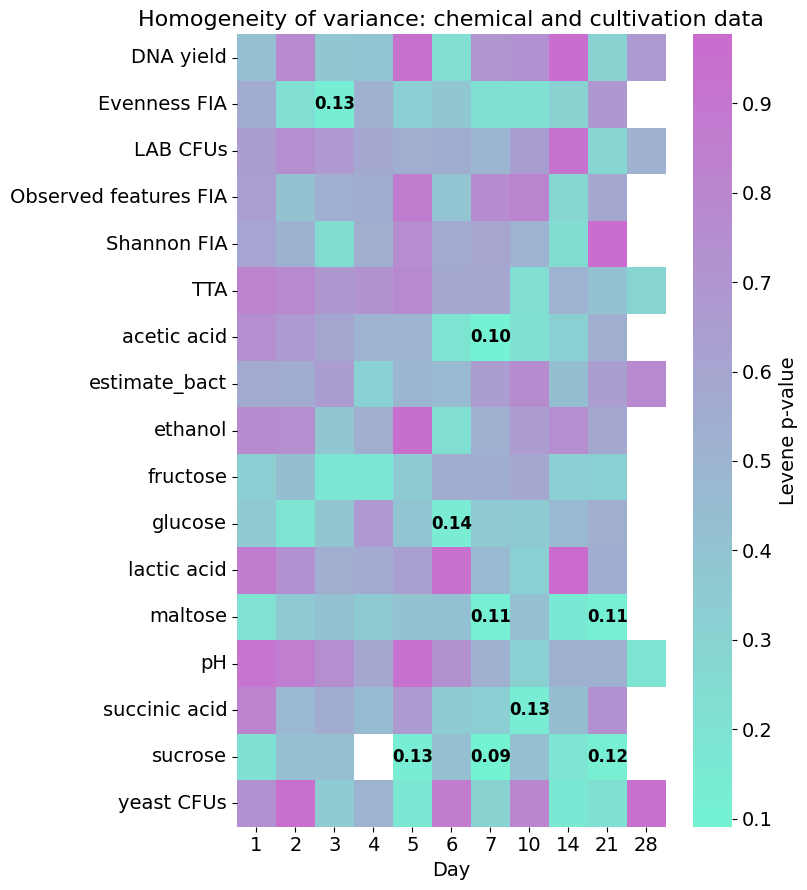

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Pivot for heatmap
heatmap_data = levene_df.pivot(index='variable', columns='day', values='Levene_p')

# Custom colormap
custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#CB6BCEFF"],
    N=256
)

# Plot heatmap
plt.figure(figsize=(8, 9))
ax = sns.heatmap(
    heatmap_data,
    annot=False,
    fmt=".2f",
    cmap=custom_cmap,
    cbar_kws={'label': 'Levene p-value'}
)

# Title and axis labels
plt.title("Homogeneity of variance: chemical and cultivation data", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("", fontsize=14)
ax.tick_params(labelsize=14)

# Customize color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)  # Tick label size
cbar.ax.set_ylabel("Levene p-value", fontsize=14)  # Label size

# Add stars for significance
# for y, row_label in enumerate(heatmap_data.index):
#     for x, col_label in enumerate(heatmap_data.columns):
#         pval = heatmap_data.loc[row_label, col_label]
#         if pval < 0.1:
#             ax.text(
#                 x + 0.5, y + 0.5, '*',
#                 ha='center', va='center',
#                 color='black', fontsize=16, fontweight='bold'
#             )
#Add stars for significance
for y, row_label in enumerate(heatmap_data.index):
    for x, col_label in enumerate(heatmap_data.columns):
        pval = heatmap_data.loc[row_label, col_label]
        if pval < 0.15:
            ax.text(
            x + 0.5, y + 0.5,
            f"{pval:.2f}",  # format with two decimal places inside parentheses
            ha='center', va='center',
            color='black', fontsize=12, fontweight='bold'
        )


plt.tight_layout()
plt.savefig('Figures/per_variable_stats_anova/20250725_shipping_chemical_cultivation_data_homogeneity_of_var_with_FIA.pdf', format='pdf', bbox_inches='tight')
plt.show()

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_66773/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

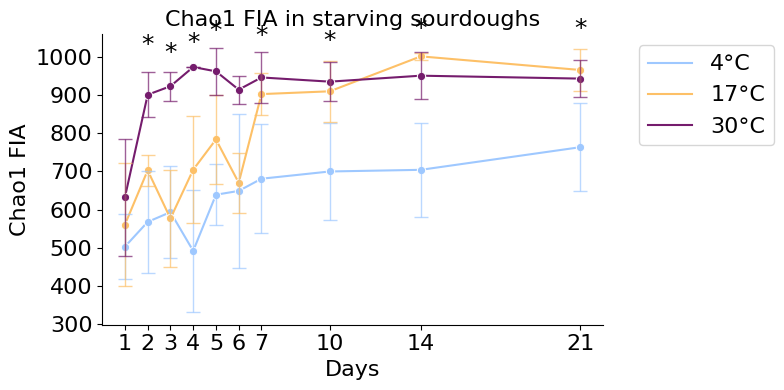

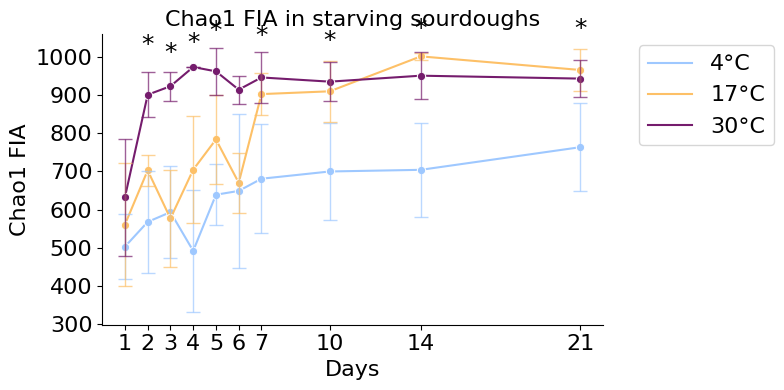

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_66773/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

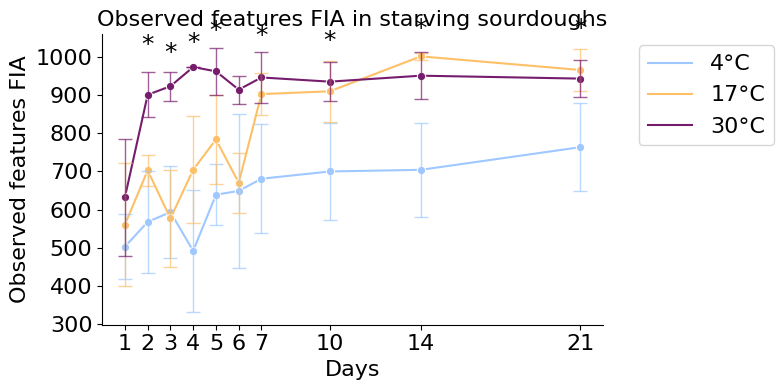

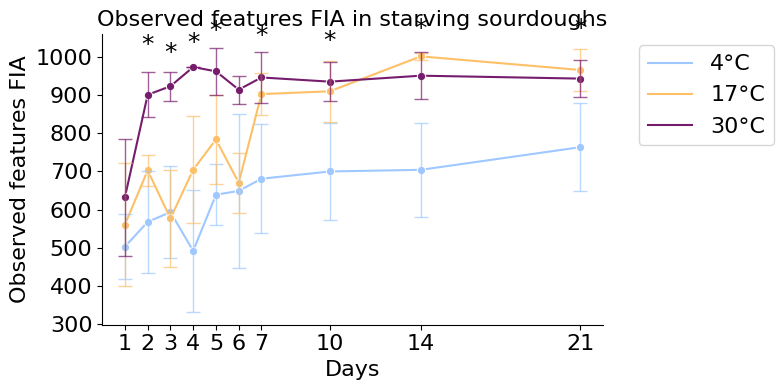

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_66773/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

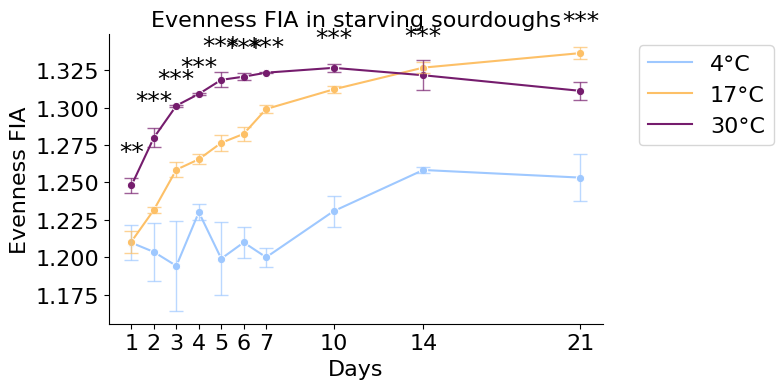

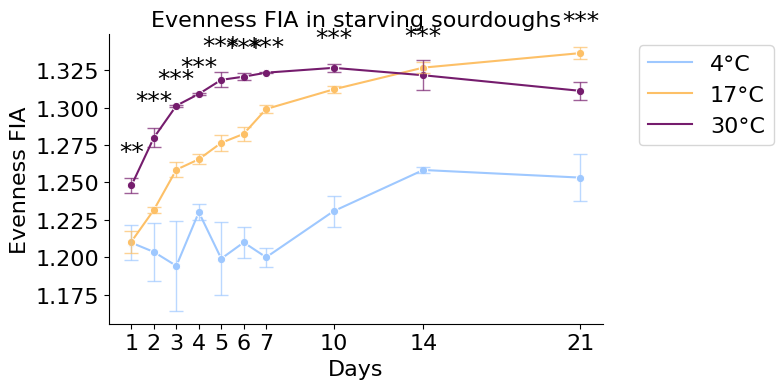

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_66773/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

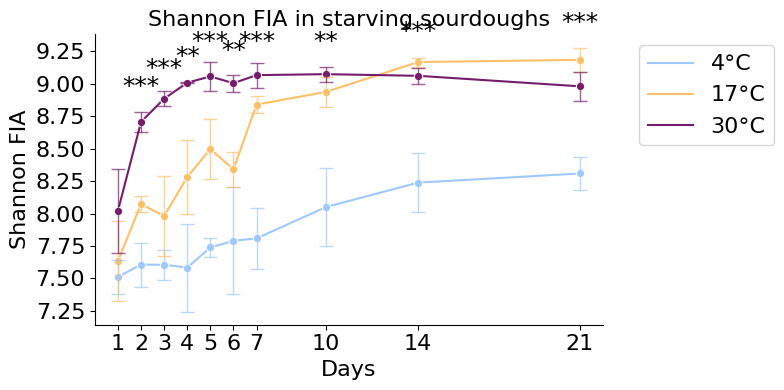

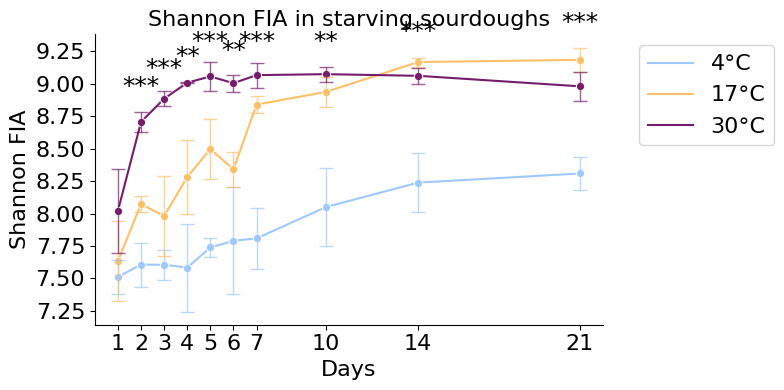

/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_66773/3455894841.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pas

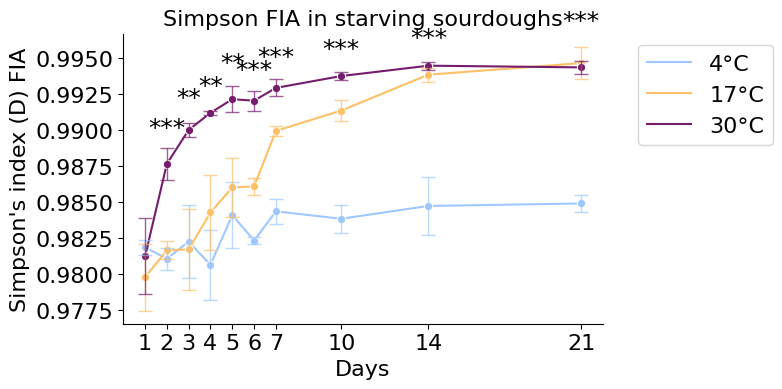

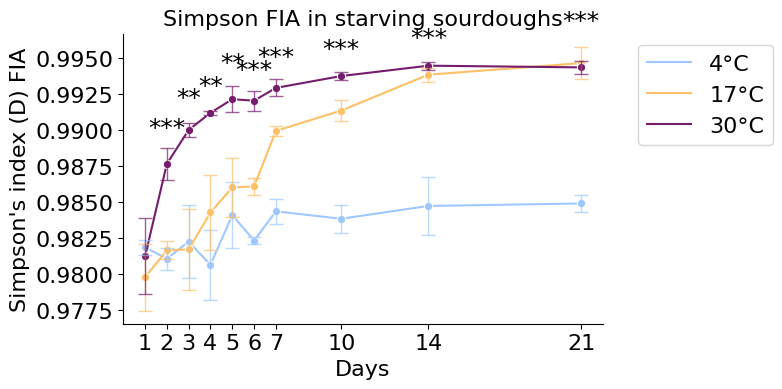

All ANOVA stats exported to: Stats/20250515_anova_results_all_metrics_FIA.xlsx


In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import xlsxwriter

# Output paths
fig_dir = "Figures/per_variable_stats_anova/"
os.makedirs(fig_dir, exist_ok=True)
excel_path = "Stats/20250515_anova_results_all_metrics_FIA.xlsx"

# Variables to loop over
metrics = {
    'Chao1 FIA': ('Chao1 FIA', 21),
    'Observed features FIA': ('Observed features FIA', 21),
    'Evenness FIA': ('Evenness FIA', 21),
    'Shannon FIA': ('Shannon FIA', 21),
    'Simpson FIA': ("Simpson's index (D) FIA", 21)
    # 'pH': ('pH', 28),
    # 'TTA': ('TTA', 28),
    # 'LAB CFUs': ('log(CFUs)/g of sourdough', 28),
    # 'yeast CFUs': ('log(CFUs)/g of sourdough', 28),
    # 'estimate_bact': ('bacterial cells', 28),
    # 'DNA yield': ('DNA yield (ng/μL)', 28),
    # 'acetic acid': ('Concentration (mM)', 21),
    # 'glucose': ('Concentration (g/L)', 21),
    # 'fructose': ('Concentration (g/L)', 21),
    # 'sucrose': ('Concentration (g/L)', 21),
    # 'maltose': ('Concentration (g/L)', 21),
    # 'succinic acid': ('Concentration (mM)', 21),
    # 'lactic acid': ('Concentration (mM)', 21),
    # 'ethanol': ('Concentration (mM)', 21),
    # 'Chao1 kmers ITS': ('Chao1 kmers ITS', 28),
    # 'Chao1 OTUs ITS': ('Chao1 OTUs ITS', 28),
    # 'Chao1 ASVs ITS': ('Chao1 ASVs ITS', 28),
    # 'Observed features ASVs ITS': ('Observed features ASVs ITS', 28),
    # 'Observed features OTUs ITS': ('Observed features OTUs ITS', 28),
    # 'Observed features kmers ITS': ('Observed features kmers ITS', 28),
    # 'Evenness ASVs ITS': ('Evenness ASVs ITS', 28),
    # 'Evenness OTUs ITS': ('Evenness OTUs ITS', 28),
    # 'Evenness kmers ITS': ('Evenness kmers ITS', 28),
    # 'Shannon ASVs ITS': ('Shannon ASVs ITS', 28),
    # 'Shannon OTUs ITS': ('Shannon OTUs ITS', 28),
    # 'Shannon kmers ITS': ('Shannon kmers ITS', 28),
    # 'Simpson ASVs ITS': ("Simpson's index (D) ASVs ITS", 28),
    # 'Simpson OTUs ITS': ("Simpson's index (D) OTUs ITS", 28),
    # 'Simpson kmers ITS': ("Simpson's index (D) kmers ITS", 28)
}


# Excel writer
excel_writer = pd.ExcelWriter(excel_path, engine='xlsxwriter')

for var, (ylab, max_day) in metrics.items():
    title = f"{var} in starving sourdoughs"
    filename = os.path.join(fig_dir, f"20250515_ANOVA_{var.replace(' ', '_')}_FIA.pdf")

    fig, result_df = plot_alpha_diversity(
        data=md,
        value_col=var,
        title=title,
        ylabel=ylab,
        return_stats=True,
        max_day=max_day
    )

    fig.savefig(filename, format='pdf', bbox_inches='tight')
    display(fig)
    plt.close(fig)

    result_df.to_excel(excel_writer, sheet_name=var[:31], index=False)


# Save workbook
excel_writer.close()
print(f"All ANOVA stats exported to: {excel_path}")


In [13]:
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_days_with_significance_letters(data, value_col, temperature_value,
                                        title="", ylabel="", colors=None,
                                        figsize=(6, 4), text_y_offset=0.05,
                                        return_stats=False):
    """
    Plot boxplots for one temperature group across days with Tukey HSD letters.
    Optionally returns the Tukey HSD stats table.
    """
    # Subset
    df = data[data['temperature'] == temperature_value].copy()
    df = df.dropna(subset=[value_col, 'day'])

    df['day'] = df['day'].astype(int)
    df['day_str'] = df['day'].astype(str)

    # Tukey HSD
    mc = MultiComparison(df[value_col], df['day_str'])
    tukey = mc.tukeyhsd()

    # Convert summary to DataFrame
    summary_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
    summary_df['reject'] = summary_df['reject'].astype(str) == 'True'

    # Compact letter display
    def get_cld_from_summary(summary_df):
        from collections import defaultdict
        groups = sorted(set(summary_df['group1']) | set(summary_df['group2']))
        group_dict = {g: set() for g in groups}
        current_letter = ord('a')
        remaining = set(groups)

        while remaining:
            this_letter = chr(current_letter)
            this_group = sorted(remaining)[0]
            compatible = {this_group}
            for g in remaining:
                mask1 = (summary_df['group1'] == this_group) & (summary_df['group2'] == g)
                mask2 = (summary_df['group1'] == g) & (summary_df['group2'] == this_group)
                is_sig = summary_df[mask1 | mask2]['reject'].any()
                if not is_sig:
                    compatible.add(g)
            for g in compatible:
                group_dict[g].add(this_letter)
            remaining -= compatible
            current_letter += 1
        return {k: ''.join(sorted(v)) for k, v in group_dict.items()}

    letter_map = get_cld_from_summary(summary_df)

    # Plotting
    plt.figure(figsize=figsize)
    day_order = sorted(df['day'].unique())
    box_palette = (df.groupby('day')['color'].first().reindex(day_order).to_dict()
                   if colors is not None else None)

    sns.boxplot(data=df, x='day', y=value_col, palette=box_palette, order=day_order)
    sns.stripplot(data=df, x='day', y=value_col, color='black', size=4, jitter=True, order=day_order)

    # Add letters
    max_vals = df.groupby('day')[value_col].max()
    for i, day in enumerate(day_order):
        label = letter_map.get(str(day), "")
        y = max_vals.loc[day] + text_y_offset * (max_vals.max() - max_vals.min())
        plt.text(i, y, label, ha='center', va='bottom', fontsize=18, fontweight='bold')

    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.xlabel("Days", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    sns.despine()
    plt.tight_layout()

    if return_stats:
        return plt.gcf(), summary_df
    else:
        return plt.gcf()

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


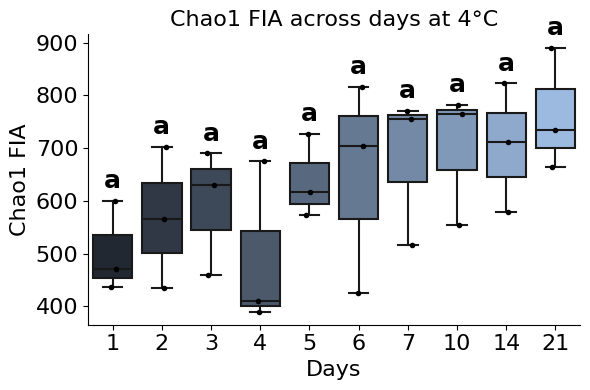

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


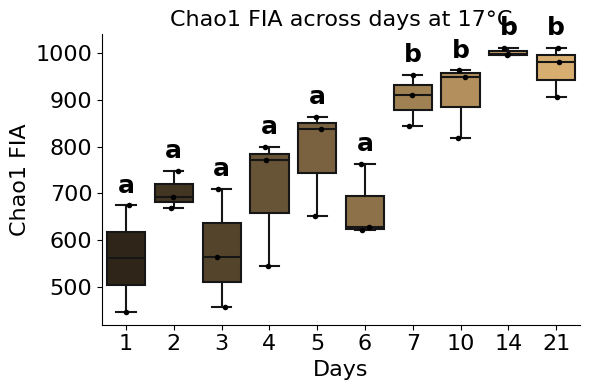

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


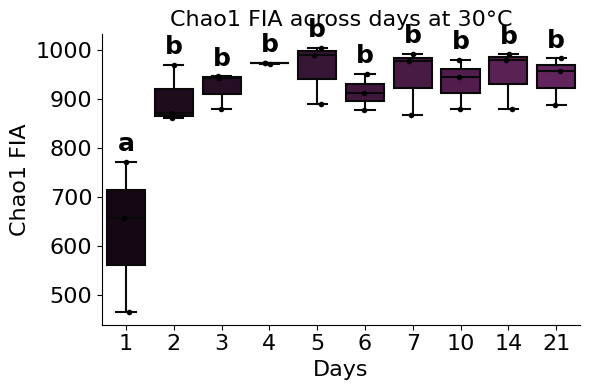

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


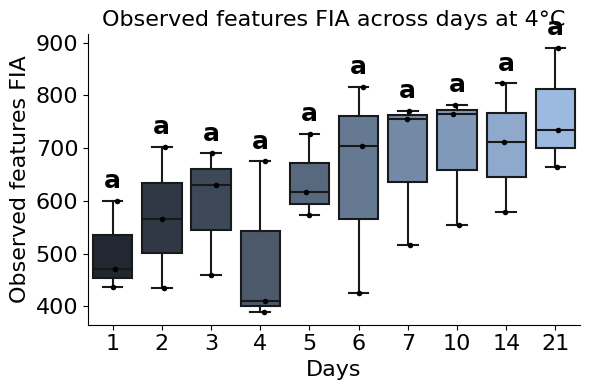

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


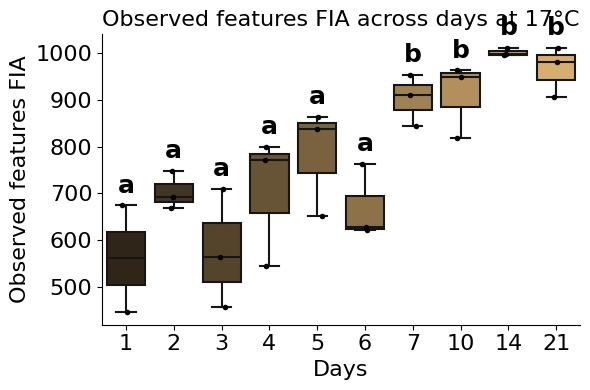

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


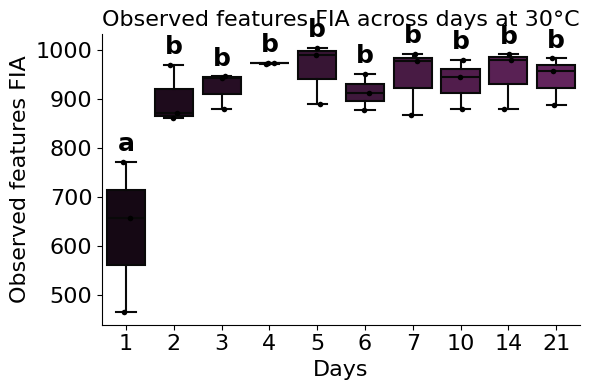

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


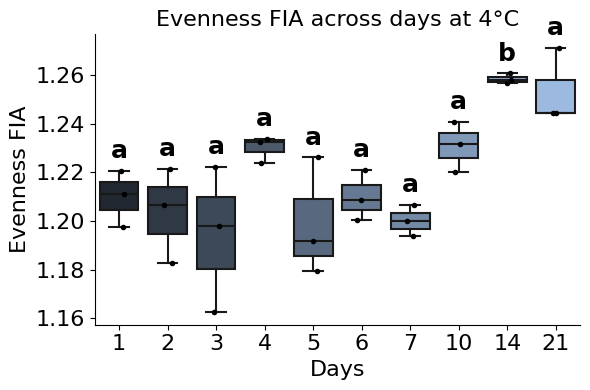

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


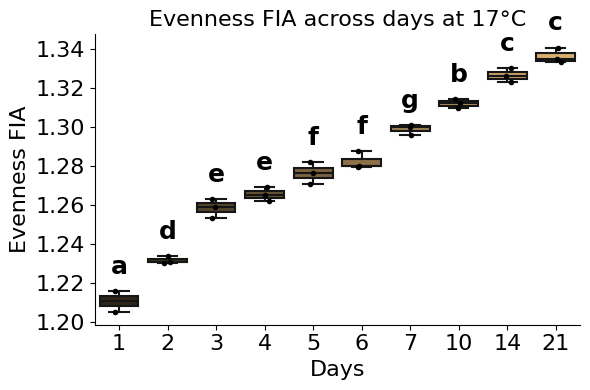

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


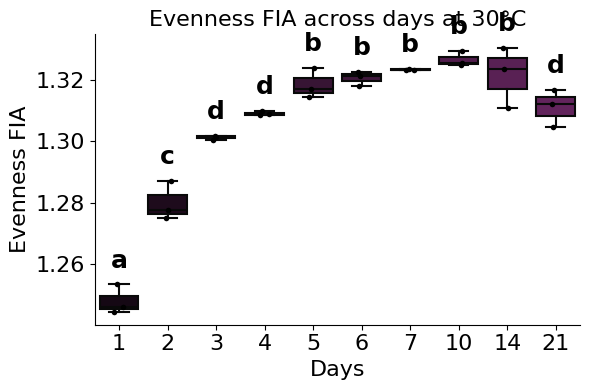

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


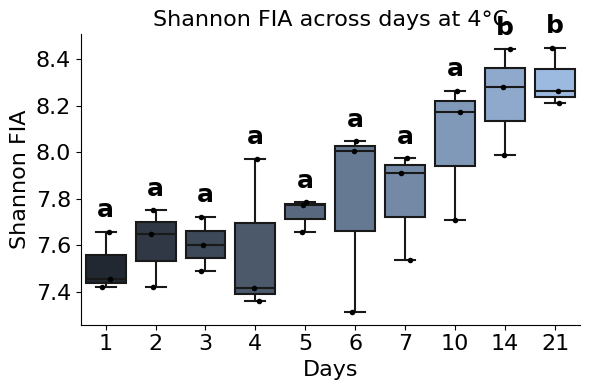

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


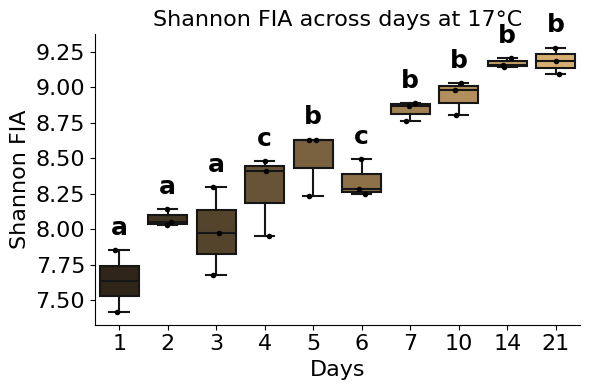

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


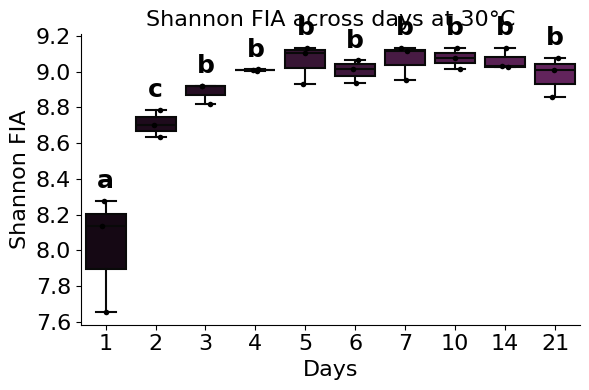

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


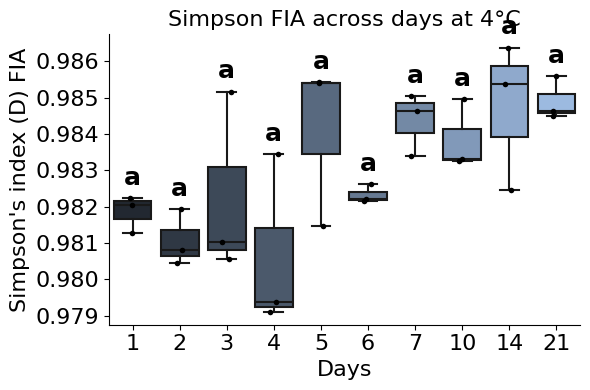

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


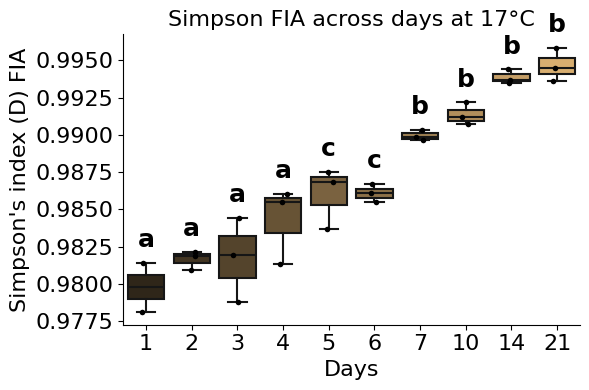

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


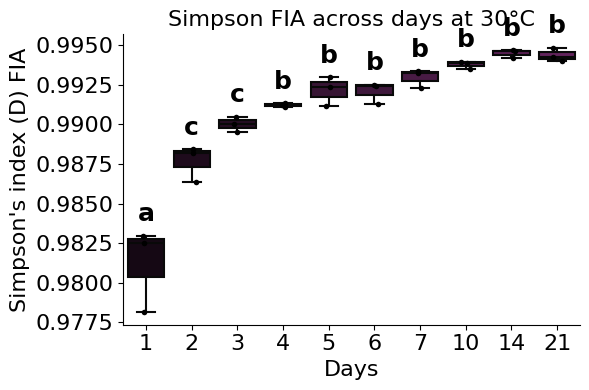

✅ Tukey HSD results exported to: Stats/20250515_tukey_results_all_variables_FIA_all_temperatures.csv


In [14]:
# import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Output directory
fig_dir = "Figures/per_variable_stats/"
os.makedirs(fig_dir, exist_ok=True)

# Metrics to analyze
metrics = {
    'Chao1 FIA': ('Chao1 FIA', 21),
    'Observed features FIA': ('Observed features FIA', 21),
    'Evenness FIA': ('Evenness FIA', 21),
    'Shannon FIA': ('Shannon FIA', 21),
    'Simpson FIA': ("Simpson's index (D) FIA", 21)
    # 'pH': ('pH', 28),
    # 'TTA': ('TTA', 28),
    # 'LAB CFUs': ('log(CFUs)/g of sourdough', 28),
    # 'yeast CFUs': ('log(CFUs)/g of sourdough', 28),
    # 'estimate_bact': ('bacterial cells', 28),
    # 'DNA yield': ('DNA yield (ng/μL)', 28),
    # 'acetic acid': ('Concentration (mM)', 21),
    # 'glucose': ('Concentration (g/L)', 21),
    # 'fructose': ('Concentration (g/L)', 21),
    # 'sucrose': ('Concentration (g/L)', 21),
    # 'maltose': ('Concentration (g/L)', 21),
    # 'succinic acid': ('Concentration (mM)', 21),
    # 'lactic acid': ('Concentration (mM)', 21),
    # 'ethanol': ('Concentration (mM)', 21),
    # 'Chao1 kmers ITS': ('Chao1 kmers ITS', 28),
    # 'Chao1 OTUs ITS': ('Chao1 OTUs ITS', 28),
    # 'Chao1 ASVs ITS': ('Chao1 ASVs ITS', 28),
    # 'Observed features ASVs ITS': ('Observed features ASVs ITS', 28),
    # 'Observed features OTUs ITS': ('Observed features OTUs ITS', 28),
    # 'Observed features kmers ITS': ('Observed features kmers ITS', 28),
    # 'Evenness ASVs ITS': ('Evenness ASVs ITS', 28),
    # 'Evenness OTUs ITS': ('Evenness OTUs ITS', 28),
    # 'Evenness kmers ITS': ('Evenness kmers ITS', 28),
    # 'Shannon ASVs ITS': ('Shannon ASVs ITS', 28),
    # 'Shannon OTUs ITS': ('Shannon OTUs ITS', 28),
    # 'Shannon kmers ITS': ('Shannon kmers ITS', 28),
    # 'Simpson ASVs ITS': ("Simpson's index (D) ASVs ITS", 28),
    # 'Simpson OTUs ITS': ("Simpson's index (D) OTUs ITS", 28),
    # 'Simpson kmers ITS': ("Simpson's index (D) kmers ITS", 28)
}

# Initialize list to collect all Tukey HSD results
all_tukey_stats = []

# Loop through each variable
for var, (ylab, max_day) in metrics.items():
    for temp in [4, 17, 30]:
        title = f"{var} across days at {temp}°C"
        filename = os.path.join(fig_dir, f"20250515_Tukey_{var.replace(' ', '_')}_{temp}C_FIA.pdf")

        # Plot and get stats
        fig, tukey_stats = plot_days_with_significance_letters(
            data=md,
            value_col=var,
            temperature_value=temp,
            title=title,
            ylabel=ylab,
            colors=md['color'],
            figsize=(6, 4),
            return_stats=True
        )

        # Save figure
        fig.savefig(filename, format='pdf', bbox_inches='tight')
        display(fig)
        plt.close(fig)

        # Add metadata
        tukey_stats['temperature'] = temp
        tukey_stats['variable'] = var
        all_tukey_stats.append(tukey_stats)

# Combine all results
tukey_combined_df = pd.concat(all_tukey_stats, ignore_index=True)

# Export to CSV
csv_path = "Stats/20250515_tukey_results_all_variables_FIA_all_temperatures.csv"
tukey_combined_df.to_csv(csv_path, index=False)
print(f"✅ Tukey HSD results exported to: {csv_path}")

## ok, now switch to beta-div

In [70]:
from matplotlib.colors import to_rgb, to_hex
import numpy as np

# Define base colors (lightest) for each temperature
# base_colors = {
#     '4°C (Sky Blue)': '#56b4e9',
#     '17°C (Bluish Green)': '#009e73',
#     '30°C (Orange)': '#e69f00'
# }
base_colors = {
    '4°C (Sky Blue)': '#9EC8FFFF',
    '17°C (Bluish Green)': '#FDC067FF',
    '30°C (Orange)': '#751C6DFF'
}



# Define the time points
time_points = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21', '28']
n_points = len(time_points)

# Create darker-to-lighter gradients
gradient_palette_adjusted = {}

for label, hex_color in base_colors.items():
    base_rgb = np.array(to_rgb(hex_color))
    gradient = {}
    for i, tp in enumerate(time_points):
        factor = 0.2 + 0.8 * (i / (n_points - 1))  # Linear scale from dark (0.4) to original (1.0)
        adjusted_rgb = tuple(base_rgb * factor)
        gradient[tp] = to_hex(adjusted_rgb)
    gradient_palette_adjusted[label] = gradient

gradient_palette_adjusted


{'4°C (Sky Blue)': {'1': '#202833',
  '2': '#2c3847',
  '3': '#39485c',
  '4': '#465870',
  '5': '#526885',
  '6': '#5f7899',
  '7': '#6b88ad',
  '10': '#7898c2',
  '14': '#85a8d6',
  '21': '#91b8eb',
  '28': '#9ec8ff'},
 '17°C (Bluish Green)': {'1': '#332615',
  '2': '#47361d',
  '3': '#5b4525',
  '4': '#6f542d',
  '5': '#846436',
  '6': '#98733e',
  '7': '#ac8346',
  '10': '#c0924e',
  '14': '#d5a157',
  '21': '#e9b15f',
  '28': '#fdc067'},
 '30°C (Orange)': {'1': '#170616',
  '2': '#21081f',
  '3': '#2a0a27',
  '4': '#330c30',
  '5': '#3d0f39',
  '6': '#461141',
  '7': '#50134a',
  '10': '#591553',
  '14': '#62185c',
  '21': '#6c1a64',
  '28': '#751c6d'}}

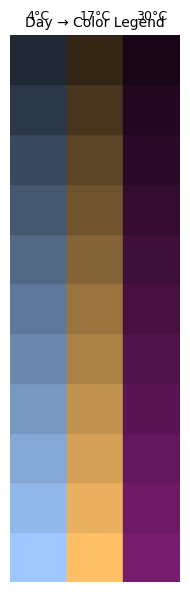

In [15]:
# Rebuild the gradient palette dictionary manually since the file is missing

# gradient_palette = {
#     '4°C (Sky Blue)': {
#         '1': '#22485d', '2': '#28536b', '3': '#2d5e79', '4': '#326887', '5': '#377395',
#         '6': '#3c7ea3', '7': '#4189b1', '10': '#4794bf', '14': '#4c9ecd', '21': '#51a9db', '28': '#56b4e9'
#     },
#     '17°C (Bluish Green)': {
#         '1': '#003f2e', '2': '#004935', '3': '#00523c', '4': '#005c43', '5': '#00654a',
#         '6': '#006f50', '7': '#007857', '10': '#00825e', '14': '#008b65', '21': '#00956c', '28': '#009e73'
#     },
#     '30°C (Orange)': {
#         '1': '#5c4000', '2': '#6a4900', '3': '#785300', '4': '#855c00', '5': '#936600',
#         '6': '#a16f00', '7': '#af7900', '10': '#bd8200', '14': '#ca8c00', '21': '#d89500', '28': '#e69f00'
#     }
# }
# gradient_palette = gradient_palette_adjusted.copy()


# # Use previously defined metadata generation and plotting
# # Define temperature groups and days
# temps = ['4°C (Sky Blue)', '17°C (Bluish Green)', '30°C (Orange)']
# days_ordered = ['1', '2', '3', '4', '5', '6', '7', '10', '14', '21', '28']



# metadata = shipping_general_metadata_all_samples.copy()

# # Map numerical temperature strings to gradient_palette keys
# temp_key_map = {
#     '4': '4°C (Sky Blue)',
#     '17': '17°C (Bluish Green)',
#     '30': '30°C (Orange)'
# }


# # Assign color
# def map_color(row):
#     day = str(row['day'])
#     temp_raw = str(row['temperature'])
    
#     if row.get('control', False) or temp_raw == '20' or day == '0':
#         return '#000000'  # Black for control

#     temp = temp_key_map.get(temp_raw)
#     if temp and day in gradient_palette[temp]:
#         return gradient_palette[temp][day]
    
#     return '#BBBBBB'  # Fallback


# metadata['color'] = metadata.apply(map_color, axis=1)

# # Create a legend for the color gradients
# fig_leg, ax_leg = plt.subplots(figsize=(2, 6))

# # Plot vertical gradients for each temperature
# for col, temp in enumerate(temps):
#     for row, day in enumerate(reversed(days_ordered)):
#         color = gradient_palette[temp][day]
#         ax_leg.add_patch(plt.Rectangle((col, row), 1, 1, color=color))
#     ax_leg.text(col + 0.5, len(days_ordered) + 0.3, temp.split()[0], ha='center', fontsize=9)

# ax_leg.set_xlim(0, 3)
# ax_leg.set_ylim(0, len(days_ordered))
# ax_leg.set_xticks([])
# ax_leg.set_yticks([])
# ax_leg.set_title("Day → Color Legend", fontsize=10)
# ax_leg.axis('off')

# plt.tight_layout()
# plt.show()


In [16]:
# #make a new color column where all colors are the same per temperature (the brightes of the previous colors, except for 20 degrees it is black):
# # Define the new color mapping
# def map_color_fixed(row):
#     temp_raw = str(row['temperature'])
    
#     if row.get('control', False) or temp_raw == '20' or row['day'] == '0':
#         return '#000000'  # Black for control

#     temp = temp_key_map.get(temp_raw)
#     if temp:
#         return gradient_palette[temp]['28']  # Use the color for day 28
    
#     return '#BBBBBB'  # Fallback

In [17]:
# metadata['color2'] = metadata.apply(map_color_fixed, axis=1)

In [35]:
#import 20250515_fia_16S_ITS_shipping_general_metadata.csv:
md = pd.read_csv('FIA/20250515_fia_16S_ITS_shipping_general_metadata.csv', sep=',', index_col=0)

In [72]:
md

Unnamed: 0  Chao1 kmers ITS  \
16S_id                                                              
366294_209-LP4-16S-0709  366292_209-LP4-ITS-0709            747.0   
366294_121-LP4-16S-0621  366292_121-LP4-ITS-0621           1052.0   
366294_212-LP4-16S-0712  366292_212-LP4-ITS-0712           1253.0   
366294_225-LP4-16S-0725  366292_225-LP4-ITS-0725           1212.0   
366294_201-LP4-16S-0701  366292_201-LP4-ITS-0701           1204.0   
...                                          ...              ...   
366294_181-LP4-16S-0681  366292_181-LP4-ITS-0681           3357.0   
366294_251-LP4-16S-0751  366292_251-LP4-ITS-0751           3265.0   
366294_260-LP4-16S-0760  366292_260-LP4-ITS-0760           3137.0   
366294_264-LP4-16S-0764  366292_264-LP4-ITS-0764           3434.0   
366294_196-LP4-16S-0696                     xxxx              NaN   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
16S_id                                                                 
366294_209-LP4-16S-0709            2.00        4.000000        678.0   
366294_121-LP4-16S-0621            4.00        6.000000        244.0   
366294_212-LP4-16S-0712            7.50        7.000000        718.0   
366294_225-LP4-16S-0725            5.00        7.000000        708.0   
366294_201-LP4-16S-0701            5.00        8.000000        708.0   
...                                 ...             ...          ...   
366294_181-LP4-16S-0681           23.50       26.428571        708.0   
366294_251-LP4-16S-0751           16.25       34.000000        708.0   
366294_260-LP4-16S-0760           23.50       32.000000        708.0   
366294_264-LP4-16S-0764           30.20       25.375000        708.0   
366294_196-LP4-16S-0696             NaN             NaN        718.0   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
16S_id                                                                   ...   
366294_209-LP4-16S-0709         5.0         4.0   W00.00.00   E       5  ...   
366294_121-LP4-16S-0621         1.0         1.0   W30.02.28   E       6  ...   
366294_212-LP4-16S-0712         5.0         6.0   W30.03.21   H       5  ...   
366294_225-LP4-16S-0725         6.0         5.0   W17.02.14   E       7  ...   
366294_201-LP4-16S-0701         5.0         5.0   W04.02.04   E       4  ...   
...                             ...         ...         ...  ..     ...  ...   
366294_181-LP4-16S-0681         5.0         5.0   W30.03.03   A       2  ...   
366294_251-LP4-16S-0751         5.0         8.0  W04.03.01    G      10  ...   
366294_260-LP4-16S-0760         5.0         5.0   W30.02.01   H      11  ...   
366294_264-LP4-16S-0764         5.0         5.0   W04.03.04   D      12  ...   
366294_196-LP4-16S-0696         5.0         6.0   W30.03.07   H       3  ...   

                         Evenness OTUs ITS  Simpson OTUs ITS  \
16S_id                                                         
366294_209-LP4-16S-0709           0.301049          0.101261   
366294_121-LP4-16S-0621           0.110319          0.056100   
366294_212-LP4-16S-0712           0.032769          0.017630   
366294_225-LP4-16S-0725           0.022223          0.009683   
366294_201-LP4-16S-0701           0.142104          0.083077   
...                                    ...               ...   
366294_181-LP4-16S-0681           0.103012          0.101151   
366294_251-LP4-16S-0751           0.071042          0.057944   
366294_260-LP4-16S-0760           0.116678          0.117316   
366294_264-LP4-16S-0764           0.103808          0.102250   
366294_196-LP4-16S-0696                NaN               NaN   

                         Shannon kmers ITS Evenness kmers ITS  \
16S_id                                                          
366294_209-LP4-16S-0709           8.420116           0.882153   
366294_121-LP4-16S-0621           8.340575           0.830824   
366294_212-LP4-16S-0712           8.253068           0.801956   
3662

In [37]:
metadata = md.copy()

## plot PCAs:

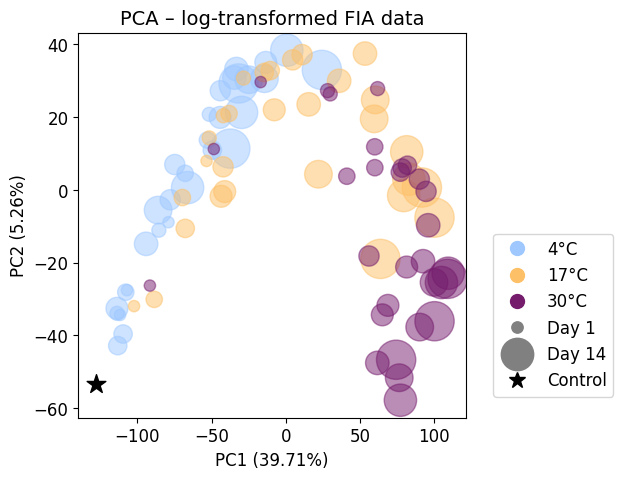

In [38]:
import matplotlib.lines as mlines

def plot_pcoa_with_metadata(pcoa_coords, variance, metadata, title):
    """Plot PCo1 vs. PCo2 with sample colors and dot sizes based on day, with legends."""
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Join coords and metadata by sample index
    merged = pcoa_coords.join(metadata[['color2', 'day', 'temperature']], how='inner')
    
    # Determine sizes
    size_min, size_max = 30, 800
    min_day, max_day = merged['day'].min(), merged['day'].max()
    sizes = size_min + (merged['day'] - min_day) / (max_day - min_day) * (size_max - size_min)
    
    # Separate control from rest
    is_control = merged['day'] == 0
    merged_control = merged[is_control]
    merged_non_control = merged[~is_control]
    
    # Plot non-control samples first
    ax.scatter(
        merged_non_control['PC1'], merged_non_control['PC2'],
        c=merged_non_control['color2'], s=sizes[~is_control],
        edgecolor=None, alpha=0.5, label='Samples'
    )
    
    # Plot control sample(s) on top
    ax.scatter(
        merged_control['PC1'], merged_control['PC2'],
        c='#000000', s=200, edgecolor=None, marker='*', label='Control'
    )
    
    # Axis labels and title
    ax.set_xlabel(f'PC1 ({variance[0]*100:.2f}%)', fontsize=12)
    ax.set_ylabel(f'PC2 ({variance[1]*100:.2f}%)', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(False)
    

    #240E31FF, #CB6BCEFF, #468892FF, #74F3D3FF, #751C6DFF, #FDC067FF, #AC9ECEFF, #6EC5ABFF
    # Color legend (temperature groups)
    temp_colors = {
        '4': '#9EC8FFFF',
        '17': '#FDC067FF',
        '30': '#751C6DFF'
    }
    color_handles = [
        mlines.Line2D([], [], color=c, marker='o', linestyle='None', markersize=10, label=f'{t}°C')
        for t, c in temp_colors.items()
    ]
    
    # Size legend (example days)
   
    size_legend_days = [1, 14]
    size_handles = [
        mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                      markersize=(size_min + (d - min_day) / (max_day - min_day) * (size_max - size_min))**0.5,
                      label=f'Day {d}')
        for d in size_legend_days
    ]
    
    # Control legend handle
    control_handle = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                                   markersize=12, label='Control')

    # Add legend
    ax.legend(handles=color_handles + size_handles + [control_handle],
              loc='best', title='', frameon=True,bbox_to_anchor=(1.05, 0.5), fontsize=12, title_fontsize=12)

    return fig, ax

plot_pcoa_with_metadata(
    pca_log_FIA,
    variance_log_FIA,
    metadata,
    title="PCA – log-transformed FIA data"
)
plt.show()


loop through all distance matrices and metrics/combinations:

In [39]:
pca_sets = [
    # ("PCoA – Jaccard Distance (ASV)", pcoa_jaccard_ASV, variance_jaccard_ASV),
    # ("PCoA – Bray-Curtis Distance (ASV)", pcoa_bray_curtis_ASV, variance_bray_curtis_ASV),
    # ("PCoA – Jaccard Distance (ASV merged)", pcoa_jaccard_ASV_merged, variance_jaccard_ASV_merged),
    # ("PCoA – Bray-Curtis Distance (ASV merged)", pcoa_bray_curtis_ASV_merged, variance_bray_curtis_ASV_merged),

    # ("PCoA – Jaccard Distance (OTU)", pcoa_jaccard_OTU, variance_jaccard_OTU),
    # ("PCoA – Bray-Curtis Distance (OTU)", pcoa_bray_curtis_OTU, variance_bray_curtis_OTU),
    # ("PCoA – Jaccard Distance (OTU merged)", pcoa_jaccard_OTU_merged, variance_jaccard_OTU_merged),
    # ("PCoA – Bray-Curtis Distance (OTU merged)", pcoa_bray_curtis_OTU_merged, variance_bray_curtis_OTU_merged),

    # ("PCoA – Jaccard Distance (k-mers)", pcoa_jaccard_k, variance_jaccard_k),
    # ("PCoA – Bray-Curtis Distance (k-mers)", pcoa_bray_curtis_k, variance_bray_curtis_k),
    # ("PCoA – Jaccard Distance (k-mers merged)", pcoa_jaccard_k_merged, variance_jaccard_k_merged),
    # ("PCoA – Bray-Curtis Distance (k-mers merged)", pcoa_bray_curtis_k_merged, variance_bray_curtis_k_merged),

    # ("PCoA – Jaccard Distance (k-mers tfidf)", pcoa_jaccard_kt, variance_jaccard_kt),
    # ("PCoA – Bray-Curtis Distance (k-mers tfidf)", pcoa_bray_curtis_kt, variance_bray_curtis_kt),
    # ("PCoA – Jaccard Distance (k-mers tfidf merged)", pcoa_jaccard_kt_merged, variance_jaccard_kt_merged),
    # ("PCoA – Bray-Curtis Distance (k-mers tfidf merged)", pcoa_bray_curtis_kt_merged, variance_bray_curtis_kt_merged),
    ("PCA – log-transformed FIA data", pca_log_FIA, variance_log_FIA),
    ("PCA – z-score normalized FIA data", pca_z_FIA, variance_z_FIA),
    ("PCA – log-z-score normalized FIA data", pca_log_z_FIA, variance_log_z_FIA),
    ("PCA – TSS-normalized FIA data", pca_tss_FIA, variance_tss_FIA),
]


In [50]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

loop through all of them and export to pdf

In [78]:
import os

# Create output directory if it doesn't exist
output_dir = "Figures/pcoa_all_FIA"
os.makedirs(output_dir, exist_ok=True)

for title, pcoa_coords, variance in pca_sets:
    fig, ax = plot_pcoa_with_metadata(
        pcoa_coords,
        variance,
        metadata,
        title=title
    )

    # Define filename: clean title of special characters
    filename = f"{title.replace(' ', '_').replace('(', '').replace(')', '').replace('–', '-')}_different_scalings_FIA.pdf"
    filepath = os.path.join(output_dir, filename)

    # Save figure
    fig.savefig(filepath, format='pdf', bbox_inches='tight')
    plt.close(fig)  # Close after saving to avoid inline display


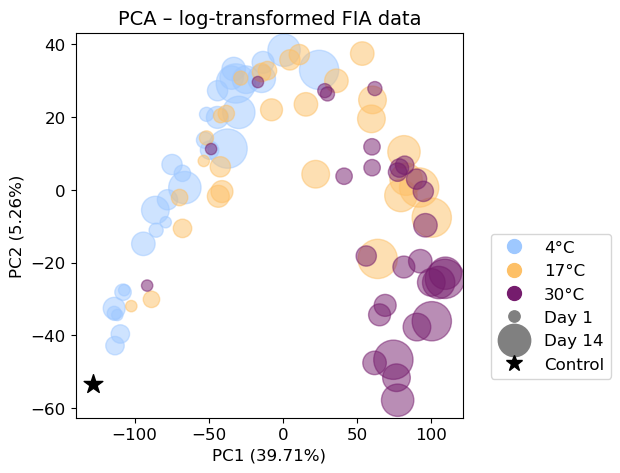

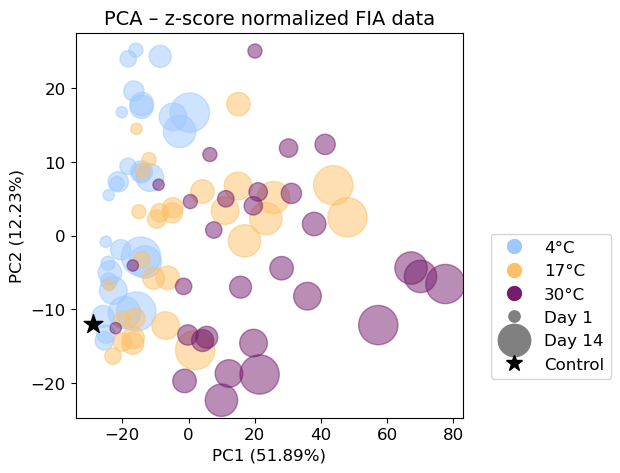

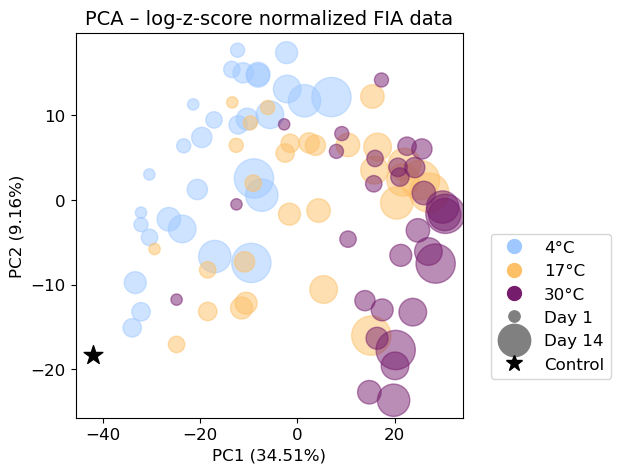

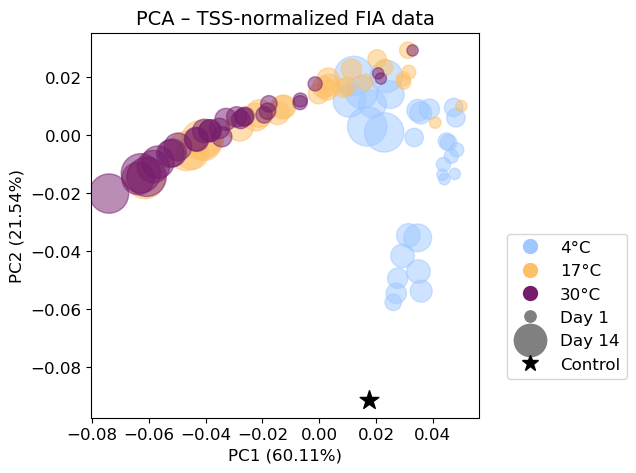

In [77]:
for title, pcoa_coords, variance in pca_sets:
    fig, ax = plot_pcoa_with_metadata(
        pcoa_coords,
        variance,
        metadata,
        title=title
    )
    plt.show()


then check out single temperatures:

In [56]:
import matplotlib.lines as mlines
import matplotlib.patches as patches
import numpy as np
from scipy.stats import chi2

def plot_pcoa_for_temperature(pcoa_coords, variance, metadata, temperature_filter, title):
    """Plot PCoA for one temperature with ellipses around each day group."""
    fig, ax = plt.subplots(figsize=(6.5, 6.5))
    
    # Filter metadata to a single temperature
    meta_filtered = metadata[metadata['temperature'].astype(str) == str(temperature_filter)].copy()
    merged = pcoa_coords.join(meta_filtered[['color2', 'day']], how='inner')
    
    # Determine sizes
    size_min, size_max = 30, 800
    min_day, max_day = merged['day'].min(), merged['day'].max()
    merged['size'] = size_min + (merged['day'] - min_day) / (max_day - min_day) * (size_max - size_min)
    
    # Plot samples
    ax.scatter(
        merged['PCo1'], merged['PCo2'],
        c=merged['color2'], s=merged['size'],
        edgecolor=None, alpha=0.7
    )

    # Add ellipses per day group
    for day, group in merged.groupby('day'):
        if group.shape[0] < 2:
            continue  # skip singleton points
        
        coords = group[['PCo1', 'PCo2']].values
        cov = np.cov(coords.T)
        if cov.shape != (2, 2) or np.linalg.matrix_rank(cov) < 2:
            continue  # skip degenerate cases
        
        mean = coords.mean(axis=0)
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]

        # Chi-squared 95% confidence level for 2D
        width, height = 2 * np.sqrt(vals * chi2.ppf(0.5, df=2))
        angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        
        ellipse = patches.Ellipse(
            xy=mean,
            width=width,
            height=height,
            angle=angle,
            edgecolor='k',
            facecolor='none',
            lw=1.2
        )


        ax.add_patch(ellipse)

    # Axis and title
    ax.set_xlabel(f'PCo1 ({variance[0]*100:.2f}%)', fontsize=12)
    ax.set_ylabel(f'PCo2 ({variance[1]*100:.2f}%)', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(False)

    return fig, ax


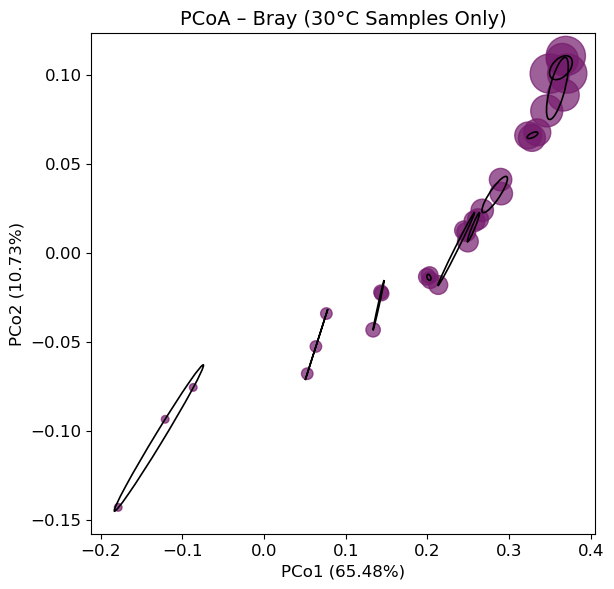

In [57]:
plot_pcoa_for_temperature(
    pcoa_coords=pcoa_bray_curtis_FIA,
    variance=variance_bray_curtis_FIA,
    metadata=metadata,
    temperature_filter='30',  # or '4', '30'
    title='PCoA – Bray (30°C Samples Only)'
)
plt.show()


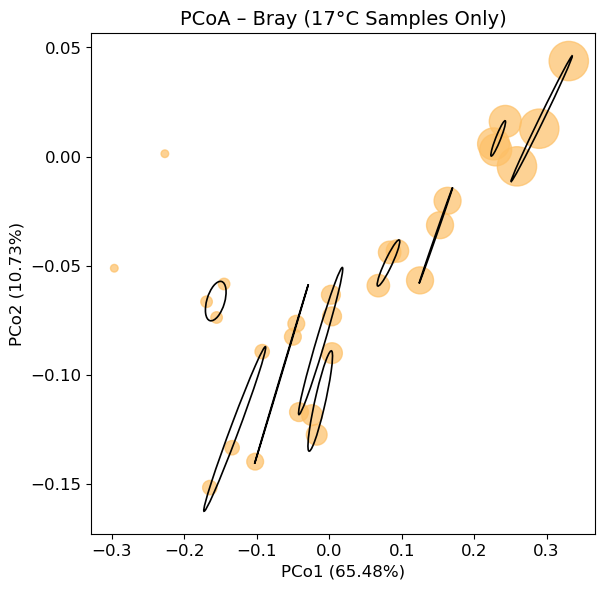

In [58]:
plot_pcoa_for_temperature(
    pcoa_coords=pcoa_bray_curtis_FIA,
    variance=variance_bray_curtis_FIA,
    metadata=metadata,
    temperature_filter='17',  # or '4', '30'
    title='PCoA – Bray (17°C Samples Only)'
)
plt.show()

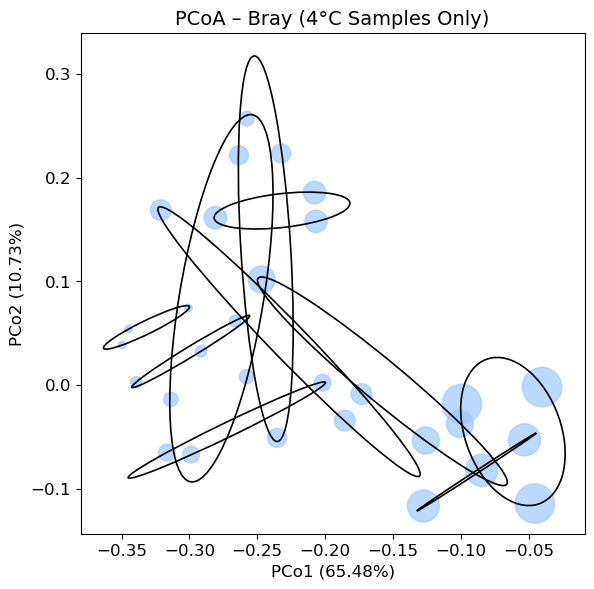

In [59]:
plot_pcoa_for_temperature(
    pcoa_coords=pcoa_bray_curtis_FIA,
    variance=variance_bray_curtis_FIA,
    metadata=metadata,
    temperature_filter='4',  # or '4', '30'
    title='PCoA – Bray (4°C Samples Only)'
)
plt.show()

## make biplots with species:

In [118]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [55]:
#import this csv: 20250510_relative_features_ASV_species_names_unique.csv
# as a dataframe, index is the first column:
#run it one after the other for bacteria and fungi!
##bacteria:
relative_features_ASV_species_names_unique = pd.read_csv('16S/OTUs/alpha_rarefaction/core-metrics-results-380/20250513_merged_relative_features_OTU_species_names.csv', sep=',', index_col=0)
relative_features_ASV_species_names_unique.head()
## fungi:
# relative_features_ASV_species_names_unique = pd.read_csv('ITS/ASVs/alpha_rarefaction/core-metrics-results-1000/20250511_merged_relative_features_ASV_species_names_unique.csv', sep=',', index_col=0)
# relative_features_ASV_species_names_unique.head()

Pediococcus parvulus  Acetobacter cerevisiae  \
366294_118-LP4-16S-0618              0.010526                0.028947   
366294_121-LP4-16S-0621              0.000000                1.000000   
366294_124-LP4-16S-0624              0.000000                0.436842   
366294_128-LP4-16S-0628              0.026455                0.645503   
366294_130-LP4-16S-0630              0.013158                0.347368   

                         Lactobacillus rossiae  \
366294_118-LP4-16S-0618               0.097368   
366294_121-LP4-16S-0621               0.000000   
366294_124-LP4-16S-0624               0.094737   
366294_128-LP4-16S-0628               0.100529   
366294_130-LP4-16S-0630               0.076316   

                         Lactobacillus sanfranciscensis  Lactobacillus brevis  
366294_118-LP4-16S-0618                        0.836842              0.026316  
366294_121-LP4-16S-0621                        0.000000              0.000000  
366294_124-LP4-16S-0624                        0.423684              0.044737  
366294_128-LP4-16S-0628                        0.116402              0.111111  
366294_130-LP4-16S-0630                        0.513158              0.050000

In [41]:
mc = relative_features_ASV_species_names_unique.copy()

In [42]:
#rename indices of relative_features_ASV_species_names_unique, in mc, the 'Unnamed: 0' column corresponds to the current
#index, and the current index in md corresponds to the index I want instead:

# Build a mapping dictionary: current_index → new_index
index_mapping = md['Unnamed: 0'].to_dict()

# Invert mapping: new_index → current_index
# (if md['Unnamed: 0'] holds the old index, md.index holds the new one)
inverse_mapping = {v: k for k, v in index_mapping.items()}

# Reindex mc using this mapping
mc.index = mc.index.map(inverse_mapping)


In [43]:
mc

Pediococcus parvulus  Acetobacter cerevisiae  Lactobacillus rossiae  \
NaN              0.010526                0.028947               0.097368   
NaN              0.000000                1.000000               0.000000   
NaN              0.000000                0.436842               0.094737   
NaN              0.026455                0.645503               0.100529   
NaN              0.013158                0.347368               0.076316   
..                    ...                     ...                    ...   
NaN              0.002632                0.023684               0.315789   
NaN              0.005263                0.010526               0.081579   
NaN              0.044974                0.021164               0.328042   
NaN              0.065789                0.013158               0.386842   
NaN              0.002632                0.018421               0.215789   

     Lactobacillus sanfranciscensis  Lactobacillus brevis  
NaN                        0.836842              0.026316  
NaN                        0.000000              0.000000  
NaN                        0.423684              0.044737  
NaN                        0.116402              0.111111  
NaN                        0.513158              0.050000  
..                              ...                   ...  
NaN                        0.613158              0.044737  
NaN                        0.892105              0.010526  
NaN                        0.539683              0.066138  
NaN                        0.452632              0.081579  
NaN                        0.715789              0.047368  

[99 rows x 5 columns]

In [54]:
relative_features_ASV_species_names_unique = mc.copy()

In [56]:
relative_features_ASV_species_names_unique

Pediococcus parvulus  Acetobacter cerevisiae  \
366294_118-LP4-16S-0618              0.010526                0.028947   
366294_121-LP4-16S-0621              0.000000                1.000000   
366294_124-LP4-16S-0624              0.000000                0.436842   
366294_128-LP4-16S-0628              0.026455                0.645503   
366294_130-LP4-16S-0630              0.013158                0.347368   
...                                       ...                     ...   
366294_263-LP4-16S-0763              0.002632                0.023684   
366294_264-LP4-16S-0764              0.005263                0.010526   
366294_265-LP4-16S-0765              0.044974                0.021164   
366294_266-LP4-16S-0766              0.065789                0.013158   
366294_267-LP4-16S-0767              0.002632                0.018421   

                         Lactobacillus rossiae  \
366294_118-LP4-16S-0618               0.097368   
366294_121-LP4-16S-0621               0.000000   
366294_124-LP4-16S-0624               0.094737   
366294_128-LP4-16S-0628               0.100529   
366294_130-LP4-16S-0630               0.076316   
...                                        ...   
366294_263-LP4-16S-0763               0.315789   
366294_264-LP4-16S-0764               0.081579   
366294_265-LP4-16S-0765               0.328042   
366294_266-LP4-16S-0766               0.386842   
366294_267-LP4-16S-0767               0.215789   

                         Lactobacillus sanfranciscensis  Lactobacillus brevis  
366294_118-LP4-16S-0618                        0.836842              0.026316  
366294_121-LP4-16S-0621                        0.000000              0.000000  
366294_124-LP4-16S-0624                        0.423684              0.044737  
366294_128-LP4-16S-0628                        0.116402              0.111111  
366294_130-LP4-16S-0630                        0.513158              0.050000  
...                                                 ...                   ...  
366294_263-LP4-16S-0763                        0.613158              0.044737  
366294_264-LP4-16S-0764                        0.892105              0.010526  
366294_265-LP4-16S-0765                        0.539683              0.066138  
366294_266-LP4-16S-0766                        0.452632              0.081579  
366294_267-LP4-16S-0767                        0.715789              0.047368  

[99 rows x 5 columns]

In [45]:
shipping_general_metadata_all_samples.columns.to_list()

['Unnamed: 0',
 'Chao1 kmers ITS',
 'Chao1 OTUs ITS',
 'Chao1 ASVs ITS',
 'Chao1 kmers',
 'Chao1 OTUs',
 'Chao1 ASVs',
 'identifier',
 'row',
 'column',
 'temperature',
 'day',
 'replicate',
 'well',
 'DNA yield',
 'DNA_total_yield_per_1g',
 'pH',
 'TTA',
 'estimate_bact',
 'estimate_bact_CFUs',
 'LAB CFUs',
 'LAB_counts',
 'bac_diff',
 'yeast CFUs',
 'mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
 'Observed features ASVs',
 'Observed features OTUs',
 'Observed features kmers',
 'Shannon ASVs',
 'Evenness ASVs',
 'Simpson ASVs',
 'Shannon OTUs',
 'Evenness OTUs',
 'Simpson OTUs',
 'Shannon kmers',
 'Evenness kmers',
 'Simpson kmers',
 'color',
 'color2',
 'Observed features ASVs ITS',
 'Observed features OTUs ITS',
 'Observed features kmers ITS',
 'Shannon ASVs ITS',
 'Evenness ASVs ITS',
 'Simpson ASVs ITS',
 'Shannon OTUs ITS',
 'Evenness OTUs ITS',
 'Simpson OTUs ITS',
 'Shannon kmers ITS',
 'Evenness kmers 

In [46]:
#make a new subset of shipping_general_metadata_all with only the columns of interest:

shipping_general_metadata_all_samples_subset = shipping_general_metadata_all_samples[['DNA yield', 'pH',
 'TTA','LAB CFUs','yeast CFUs','mannitol',
 'glucose',
 'fructose',
 'sucrose',
 'maltose',
 'succinic acid',
 'lactic acid',
 'acetic acid',
 'ethanol',
#  'temperature',
#  'day'
 ]]


# shipping_general_metadata_all_samples_subset = shipping_general_metadata_all_samples[['mannitol',
#  'glucose',
#  'fructose',
#  'sucrose',
#  'maltose',
#  'succinic acid',
#  'lactic acid',
#  'acetic acid',
#  'ethanol']]

In [47]:
#check if all variables are numeric in shipping_general_metadata_all_samples_subset, and if not, make them numeric:
shipping_general_metadata_all_samples_subset = shipping_general_metadata_all_samples_subset.apply(pd.to_numeric, errors='coerce')

In [48]:
def add_feature_loadings_to_pcoa(ax, pcoa_coords, feature_df,
                                  metadata_vectors=None,
                                  n_species=10,
                                  n_meta=5,
                                  species_color='#468892FF',
                                  meta_color='black',
                                  scaling_factor=0.01,
                                  arrow_scale=1,
                                  save_path=None):
    """
    Overlay top correlated features and/or metadata variables as arrows on a PCoA plot.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Existing matplotlib axis with the PCoA scatterplot.
    pcoa_coords : pd.DataFrame
        PCoA coordinates with index as SampleIDs and columns 'PCo1', 'PCo2'.
    feature_df : pd.DataFrame
        Feature table (e.g. ASVs) with index as SampleIDs.
    metadata_vectors : pd.DataFrame or None
        Optional metadata variables (e.g. pH, TTA, etc.) with SampleIDs as index.
    n_species : int
        Number of top species vectors to display.
    n_meta : int
        Number of top metadata vectors to display.
    species_color : str
        Color for species arrows.
    meta_color : str
        Color for metadata arrows.
    scaling_factor : float
        Multiplier for arrow lengths.
    save_path : str or None
        Optional path to save the figure as PDF.
    """

    ### --- Species features ---
    feature_scores = {}
    for feat in feature_df.columns:
        common = pcoa_coords.index.intersection(feature_df[feat].dropna().index)
        if len(common) < 3:
            continue
        x_corr = feature_df.loc[common, feat].corr(pcoa_coords.loc[common, 'PC1'])
        y_corr = feature_df.loc[common, feat].corr(pcoa_coords.loc[common, 'PC2'])
        if pd.notnull(x_corr) and pd.notnull(y_corr):
            feature_scores[feat] = abs(x_corr) + abs(y_corr)

    top_species = sorted(feature_scores, key=feature_scores.get, reverse=True)[:n_species]

    for feat in top_species:
        common = pcoa_coords.index.intersection(feature_df[feat].dropna().index)
        x_corr = feature_df.loc[common, feat].corr(pcoa_coords.loc[common, 'PC1'])
        y_corr = feature_df.loc[common, feat].corr(pcoa_coords.loc[common, 'PC2'])
        ax.arrow(0, 0, x_corr * scaling_factor, y_corr * scaling_factor,
                 color=species_color, width=0.002*arrow_scale, head_width=0.01*arrow_scale, alpha=0.8)
        ax.text(x_corr * scaling_factor * 1.2, y_corr * scaling_factor * 1.2,
                feat, fontsize=10, color=species_color, ha='center', va='center')

    ### --- Optional metadata variables ---
    if metadata_vectors is not None:
        meta_scores = {}
        for col in metadata_vectors.columns:
            common = pcoa_coords.index.intersection(metadata_vectors[col].dropna().index)
            if len(common) < 3:
                continue
            x_corr = metadata_vectors.loc[common, col].corr(pcoa_coords.loc[common, 'PC1'])
            y_corr = metadata_vectors.loc[common, col].corr(pcoa_coords.loc[common, 'PC2'])
            if pd.notnull(x_corr) and pd.notnull(y_corr):
                meta_scores[col] = abs(x_corr) + abs(y_corr)

        top_meta = sorted(meta_scores, key=meta_scores.get, reverse=True)[:n_meta]

        for col in top_meta:
            common = pcoa_coords.index.intersection(metadata_vectors[col].dropna().index)
            x_corr = metadata_vectors.loc[common, col].corr(pcoa_coords.loc[common, 'PC1'])
            y_corr = metadata_vectors.loc[common, col].corr(pcoa_coords.loc[common, 'PC2'])
            ax.arrow(0, 0, x_corr * scaling_factor, y_corr * scaling_factor,
                     color=meta_color, width=0.002*arrow_scale, head_width=0.01*arrow_scale, alpha=0.8)
            ax.text(x_corr * scaling_factor * 1.5, y_corr * scaling_factor * 1.2,
                    col, fontsize=10, color=meta_color, ha='center', va='center')

    ### --- Save if requested ---
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')


In [49]:
# Coerce all columns to numeric (invalid ones become NaN)
metadata_vectors_clean = shipping_general_metadata_all_samples_subset.apply(pd.to_numeric, errors='coerce')


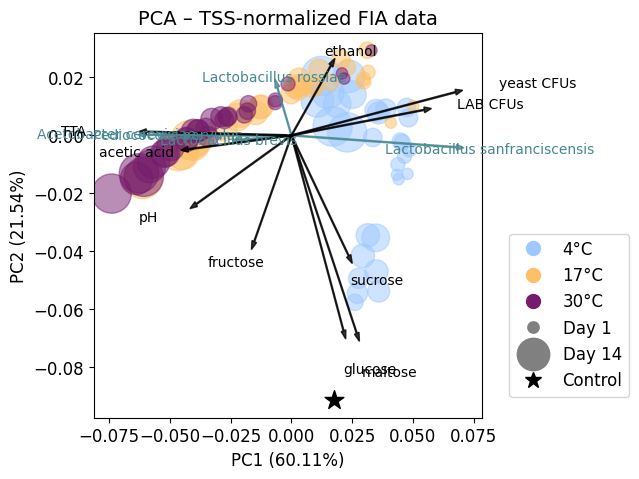

In [57]:
fig, ax = plot_pcoa_with_metadata(
    pca_tss_FIA,
    variance_tss_FIA,
    metadata,
    title="PCA – TSS-normalized FIA data"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pca_tss_FIA,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=10,
    scaling_factor=0.08,
    arrow_scale = 0.2,
    save_path="Figures/pcoa_all_FIA/biplot_FIA_TSS_species_and_envvectors_16S.pdf"
)

plt.show()



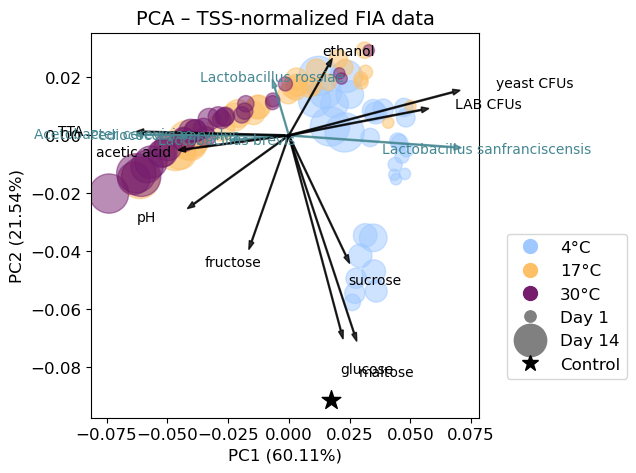

In [128]:
fig, ax = plot_pcoa_with_metadata(
    pca_tss_FIA,
    variance_tss_FIA,
    metadata,
    title="PCA – TSS-normalized FIA data"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pca_tss_FIA,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=10,
    scaling_factor=0.08,
    arrow_scale = 0.2,
    save_path="Figures/pcoa_all_FIA/biplot_FIA_TSS_species_and_envvectors_16S.pdf"
)

plt.show()

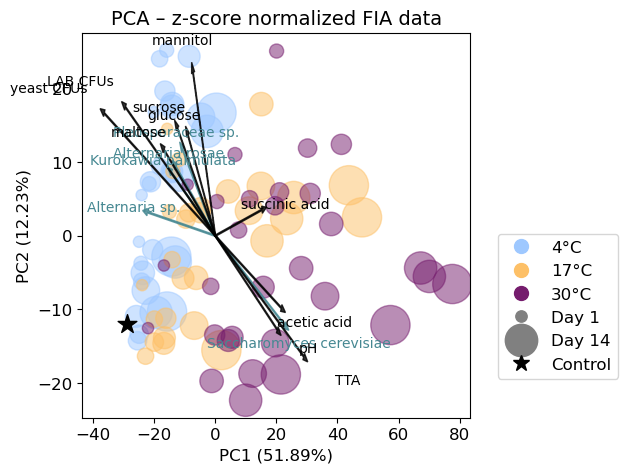

In [111]:
fig, ax = plot_pcoa_with_metadata(
    pca_z_FIA,
    variance_z_FIA,
    metadata,
    title="PCA – z-score normalized FIA data"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pca_z_FIA,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=10,
    scaling_factor=50,
    arrow_scale = 100,
    save_path="Figures/pcoa_all_FIA/biplot_FIA_TSS_species_and_envvectors_ITS.pdf"
)

plt.show()

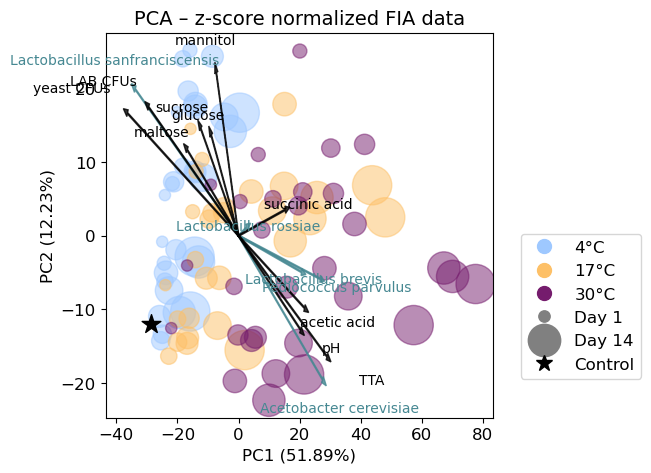

In [130]:
fig, ax = plot_pcoa_with_metadata(
    pca_z_FIA,
    variance_z_FIA,
    metadata,
    title="PCA – z-score normalized FIA data"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pca_z_FIA,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=10,
    scaling_factor=50,
    arrow_scale = 100,
    save_path="Figures/pcoa_all_FIA/biplot_FIA_TSS_species_and_envvectors_16S.pdf"
)

plt.show()

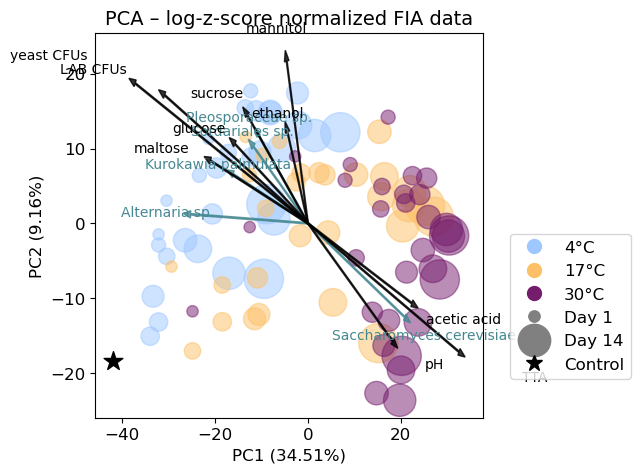

In [113]:
fig, ax = plot_pcoa_with_metadata(
    pca_log_z_FIA,
    variance_log_z_FIA,
    metadata,
    title="PCA – log-z-score normalized FIA data"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pca_log_z_FIA,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=10,
    scaling_factor=50,
    arrow_scale = 100,
    save_path="Figures/pcoa_all_FIA/biplot_FIA_log_z_species_and_envvectors_ITS.pdf"
)

plt.show()

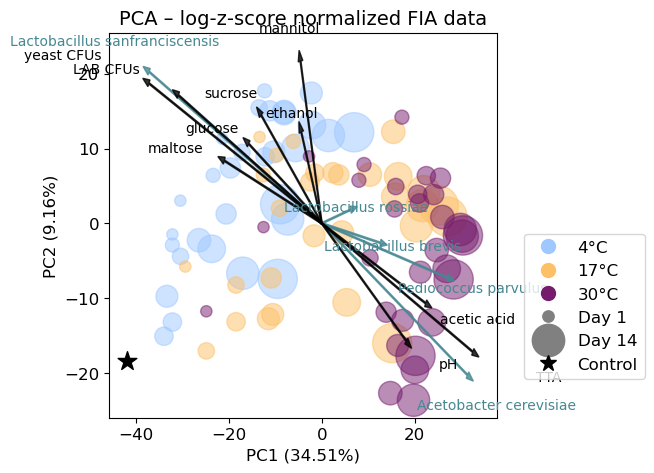

In [131]:
fig, ax = plot_pcoa_with_metadata(
    pca_log_z_FIA,
    variance_log_z_FIA,
    metadata,
    title="PCA – log-z-score normalized FIA data"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pca_log_z_FIA,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=10,
    scaling_factor=50,
    arrow_scale = 100,
    save_path="Figures/pcoa_all_FIA/biplot_FIA_log_z_species_and_envvectors_16S.pdf"
)

plt.show()

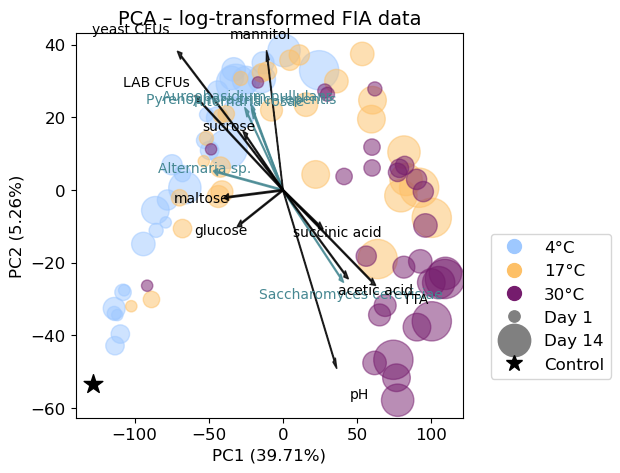

In [120]:
fig, ax = plot_pcoa_with_metadata(
    pca_log_FIA,
    variance_log_FIA,
    metadata,
    title="PCA – log-transformed FIA data"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pca_log_FIA,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=10,
    scaling_factor=90,
    arrow_scale = 200,
    save_path="Figures/pcoa_all_FIA/biplot_FIA_log_species_and_envvectors_ITS.pdf"
)

plt.show()

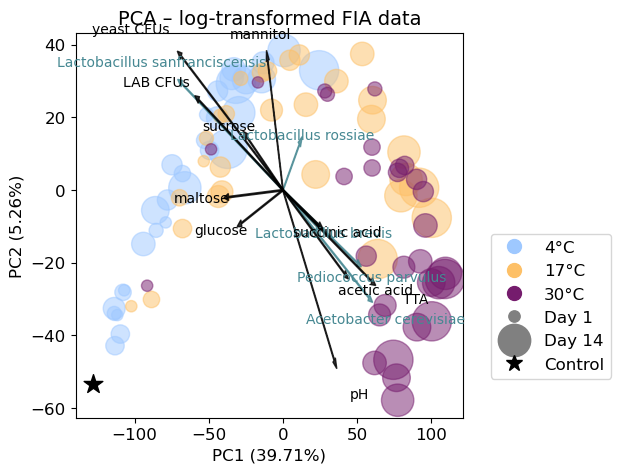

In [132]:
fig, ax = plot_pcoa_with_metadata(
    pca_log_FIA,
    variance_log_FIA,
    metadata,
    title="PCA – log-transformed FIA data"
)

add_feature_loadings_to_pcoa(
    ax=ax,
    pcoa_coords=pca_log_FIA,
    feature_df=relative_features_ASV_species_names_unique,
    metadata_vectors=metadata_vectors_clean,    
    n_species=5,
    n_meta=10,
    scaling_factor=90,
    arrow_scale = 200,
    save_path="Figures/pcoa_all_FIA/biplot_FIA_log_species_and_envvectors_16S.pdf"
)

plt.show()

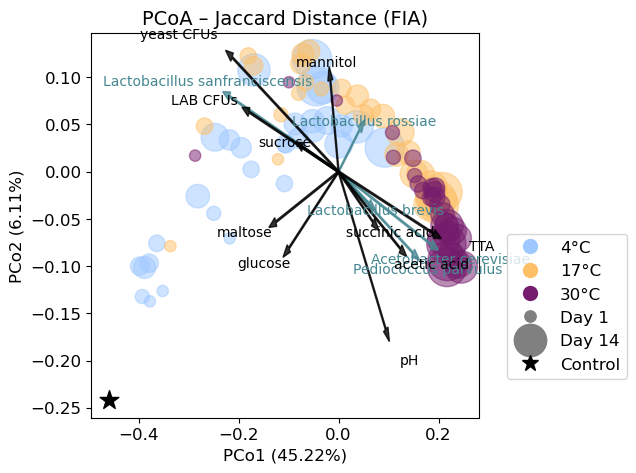

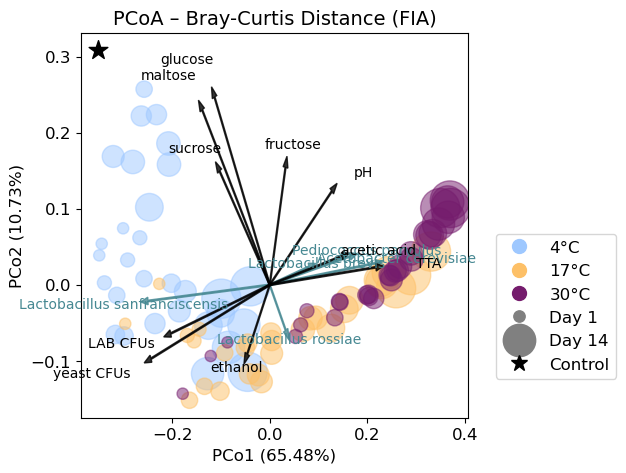

In [76]:
import os

# # Output directory for biplots
# biplot_dir = "Figures/pcoa_all_FIA"
# os.makedirs(biplot_dir, exist_ok=True)

# # Define input list of (title, coords, variance)
# # pcoa_sets = [
# #     ("PCoA – Bray-Curtis Distance (ASV)", pcoa_bray_curtis_ASV, variance_bray_curtis_ASV),
# #     ("PCoA – Jaccard Distance (ASV)", pcoa_jaccard_ASV, variance_jaccard_ASV),
# #     ("PCoA – Bray-Curtis Distance (ASV, merged)", pcoa_bray_curtis_ASV_merged, variance_bray_curtis_ASV_merged),
# #     ("PCoA – Jaccard Distance (ASV, merged)", pcoa_jaccard_ASV_merged, variance_jaccard_ASV_merged),
# #     # Add more as needed...
# # ]

# # Loop and generate biplots
# for title, coords, variance in pcoa_sets:
#     fig, ax = plot_pcoa_with_metadata(
#         coords,
#         variance,
#         metadata,
#         title=title
#     )

#     # Generate filename
#     filename = title.replace(" ", "_").replace("(", "").replace(")", "").replace("–", "-") + "_biplot_FIA.pdf"
#     filepath = os.path.join(biplot_dir, filename)

#     # Add feature and metadata vectors
#     add_feature_loadings_to_pcoa(
#         ax=ax,
#         pcoa_coords=coords,
#         feature_df=relative_features_ASV_species_names_unique,
#         metadata_vectors=metadata_vectors_clean,  # e.g. subset of md[['pH', 'TTA', ...]]
#         n_species=5,
#         n_meta=10,
#         scaling_factor=0.3,
#         save_path=filepath
#     )
#     plt.show(fig)
#     plt.close(fig)  # prevent inline display if not desired


## PERMDISP: to find out which method might be best, is it rather a question of balance, or are there also new metabolites present?

### first, compute distance matrices (euclidean)

In [16]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Assuming df_z, df_log_z, df_log, df_TSS are your preprocessed DataFrames

# Function to compute Euclidean distance matrix
def compute_euclidean_distance(df):
    # Calculate pairwise Euclidean distances
    distance_matrix = pdist(df, metric='euclidean')
    
    # Convert the condensed distance matrix to a square form (2D)
    distance_matrix_square = squareform(distance_matrix)
    
    return distance_matrix_square

# Compute Euclidean distance matrices for each dataset
distance_matrix_z = compute_euclidean_distance(df_z)
distance_matrix_log_z = compute_euclidean_distance(df_log_z)

distance_matrix_TSS = compute_euclidean_distance(df_tss)

# Convert the distance matrices into DataFrames for easier interpretation
distance_matrix_z_df = pd.DataFrame(distance_matrix_z, index=df_z.index, columns=df_z.index)
distance_matrix_log_z_df = pd.DataFrame(distance_matrix_log_z, index=df_log_z.index, columns=df_log_z.index)

distance_matrix_TSS_df = pd.DataFrame(distance_matrix_TSS, index=df_tss.index, columns=df_tss.index)

# Display the first few rows of each distance matrix (optional)
print("Euclidean Distance Matrix (df_z):")
print(distance_matrix_z_df.head())

print("Euclidean Distance Matrix (df_log_z):")
print(distance_matrix_log_z_df.head())



print("Euclidean Distance Matrix (df_TSS):")
print(distance_matrix_TSS_df.head())


Euclidean Distance Matrix (df_z):
                         366294_209-LP4-16S-0709  366294_255-LP4-16S-0755  \
366294_209-LP4-16S-0709                 0.000000                32.799405   
366294_255-LP4-16S-0755                32.799405                 0.000000   
366294_237-LP4-16S-0737                27.187165                19.834816   
366294_198-LP4-16S-0698                27.747003                20.892386   
366294_240-LP4-16S-0740                25.970922                28.989344   

                         366294_237-LP4-16S-0737  366294_198-LP4-16S-0698  \
366294_209-LP4-16S-0709                27.187165                27.747003   
366294_255-LP4-16S-0755                19.834816                20.892386   
366294_237-LP4-16S-0737                 0.000000                14.935744   
366294_198-LP4-16S-0698                14.935744                 0.000000   
366294_240-LP4-16S-0740                18.478915                17.719167   

                         366294_240-LP4-

In [17]:
from skbio.stats.distance import DistanceMatrix

# Function to convert a distance matrix DataFrame to skbio's DistanceMatrix format
def convert_to_distance_matrix(df):
    # Convert the DataFrame into a DistanceMatrix
    return DistanceMatrix(df.values, ids=df.index)

# Create a dictionary to store the DistanceMatrix objects
distance_matrices_dict = {}

# Convert each of the DataFrames to DistanceMatrix objects and store them in the dictionary
distance_matrices_dict['df_z_dm'] = convert_to_distance_matrix(distance_matrix_z_df)
distance_matrices_dict['df_log_z_dm'] = convert_to_distance_matrix(distance_matrix_log_z_df)
distance_matrices_dict['df_TSS_dm'] = convert_to_distance_matrix(distance_matrix_TSS_df)

# Check the dictionary to ensure everything is stored correctly
for key, value in distance_matrices_dict.items():
    print(f"{key}: {value}")


df_z_dm: 90x90 distance matrix
IDs:
'366294_209-LP4-16S-0709', '366294_255-LP4-16S-0755', '366294_237-LP4-16S-0737', ...
Data:
[[  0.          32.79940466  27.18716528 ...  55.88216822 107.44982194
   62.9636841 ]
 [ 32.79940466   0.          19.83481647 ...  53.76714759 101.83613996
   61.56804476]
 [ 27.18716528  19.83481647   0.         ...  49.88726062 101.57992445
   57.97311441]
 ...
 [ 55.88216822  53.76714759  49.88726062 ...   0.          65.76830613
   35.52596958]
 [107.44982194 101.83613996 101.57992445 ...  65.76830613   0.
   61.50648514]
 [ 62.9636841   61.56804476  57.97311441 ...  35.52596958  61.50648514
    0.        ]]
df_log_z_dm: 90x90 distance matrix
IDs:
'366294_209-LP4-16S-0709', '366294_255-LP4-16S-0755', '366294_237-LP4-16S-0737', ...
Data:
[[ 0.         47.24824196 43.20931811 ... 77.55478412 84.74188031
  77.15935617]
 [47.24824196  0.         30.74437002 ... 65.21674774 69.21788057
  67.43128839]
 [43.20931811 30.74437002  0.         ... 64.59493201 69.949

In [18]:
dms = distance_matrices_dict.copy()

In [19]:
dms

{'df_z_dm': <skbio.stats.distance._base.DistanceMatrix at 0x1a013e080>,
 'df_log_z_dm': <skbio.stats.distance._base.DistanceMatrix at 0x19cb46200>,
 'df_TSS_dm': <skbio.stats.distance._base.DistanceMatrix at 0x19cee4100>}

In [21]:
metadata = shipping_general_metadata.copy()

In [20]:
# Check sample match between metadata and distance matrix
any_missing = [name for name, dm in dms.items() if not set(dm.ids).issubset(set(metadata.index))]
print("Distance matrices with unmatched IDs:", any_missing)


NameError: name 'metadata' is not defined

In [22]:
metadata

Unnamed: 0  Chao1 kmers ITS  \
16S_id                                                              
366294_217-LP4-16S-0717  366292_217-LP4-ITS-0717           1204.0   
366294_255-LP4-16S-0755  366292_255-LP4-ITS-0755           2285.0   
366294_251-LP4-16S-0751  366292_251-LP4-ITS-0751           3265.0   
366294_223-LP4-16S-0723  366292_223-LP4-ITS-0723           1953.0   
366294_177-LP4-16S-0677  366292_177-LP4-ITS-0677           1960.0   
...                                          ...              ...   
366294_239-LP4-16S-0739  366292_239-LP4-ITS-0739           1536.0   
366294_173-LP4-16S-0673  366292_173-LP4-ITS-0673           2477.0   
366294_121-LP4-16S-0621  366292_121-LP4-ITS-0621           1052.0   
366294_147-LP4-16S-0647  366292_147-LP4-ITS-0647           1746.0   
366294_128-LP4-16S-0628  366292_128-LP4-ITS-0628           2092.0   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
16S_id                                                                 
366294_217-LP4-16S-0717        5.000000            8.00   588.000000   
366294_255-LP4-16S-0755       15.000000           17.00   708.000000   
366294_251-LP4-16S-0751       16.250000           34.00   708.000000   
366294_223-LP4-16S-0723       11.333333           11.00   678.000000   
366294_177-LP4-16S-0677       17.333333           19.00   473.004386   
...                                 ...             ...          ...   
366294_239-LP4-16S-0739        5.000000            8.20   708.000000   
366294_173-LP4-16S-0673       18.500000           18.75   718.000000   
366294_121-LP4-16S-0621        4.000000            6.00   244.000000   
366294_147-LP4-16S-0647       11.000000           17.50   244.000000   
366294_128-LP4-16S-0628       14.200000           15.25   708.000000   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
16S_id                                                                   ...   
366294_217-LP4-16S-0717         3.0         3.0   W04.02.01   E       6  ...   
366294_255-LP4-16S-0755         5.0         5.0   W04.01.01   C      11  ...   
366294_251-LP4-16S-0751         5.0         8.0  W04.03.01    G      10  ...   
366294_223-LP4-16S-0723         3.0         5.0   W04.03.02   C       7  ...   
366294_177-LP4-16S-0677         4.5         2.0   W04.02.02   E       1  ...   
...                             ...         ...         ...  ..     ...  ...   
366294_239-LP4-16S-0739         5.0         5.0   W30.01.21   C       9  ...   
366294_173-LP4-16S-0673         5.0         6.0   W30.02.21   A       1  ...   
366294_121-LP4-16S-0621         1.0         1.0   W30.02.28   E       6  ...   
366294_147-LP4-16S-0647         1.0         1.0   W30.01.28   G       9  ...   
366294_128-LP4-16S-0628         5.0         5.0   W30.03.28   D       7  ...   

                         Evenness OTUs ITS  Simpson OTUs ITS  \
16S_id                                                         
366294_217-LP4-16S-0717           0.107406          0.058532   
366294_255-LP4-16S-0755           0.064754          0.053929   
366294_251-LP4-16S-0751           0.071042          0.057944   
366294_223-LP4-16S-0723           0.047115          0.032811   
366294_177-LP4-16S-0677           0.056046          0.043449   
...                                    ...               ...   
366294_239-LP4-16S-0739           0.015633          0.006276   
366294_173-LP4-16S-0673           0.064827          0.053488   
366294_121-LP4-16S-0621           0.110319          0.056100   
366294_147-LP4-16S-0647           0.019673          0.010821   
366294_128-LP4-16S-0628           0.033383          0.022726   

                         Shannon kmers ITS  Evenness kmers ITS  \
16S_id                                                           
366294_217-LP4-16S-0717           8.480431            0.828683   
366294_255-LP4-16S-0755           8.378933            0.750937   
366294_251-LP4-16S-0751           8.393120            0.719028   

In [114]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

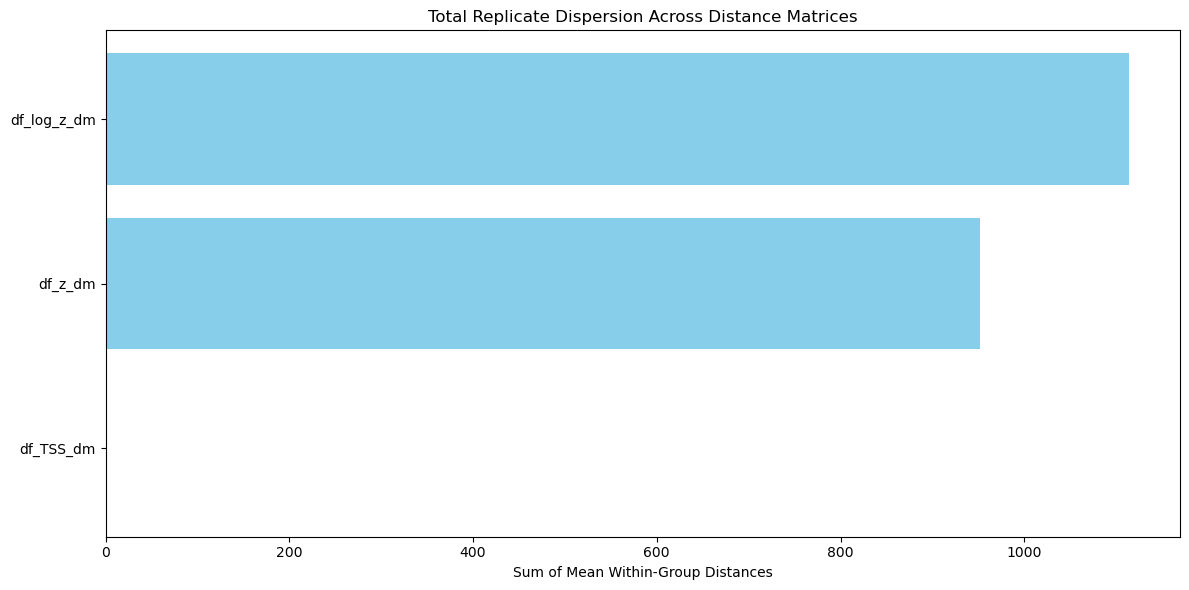

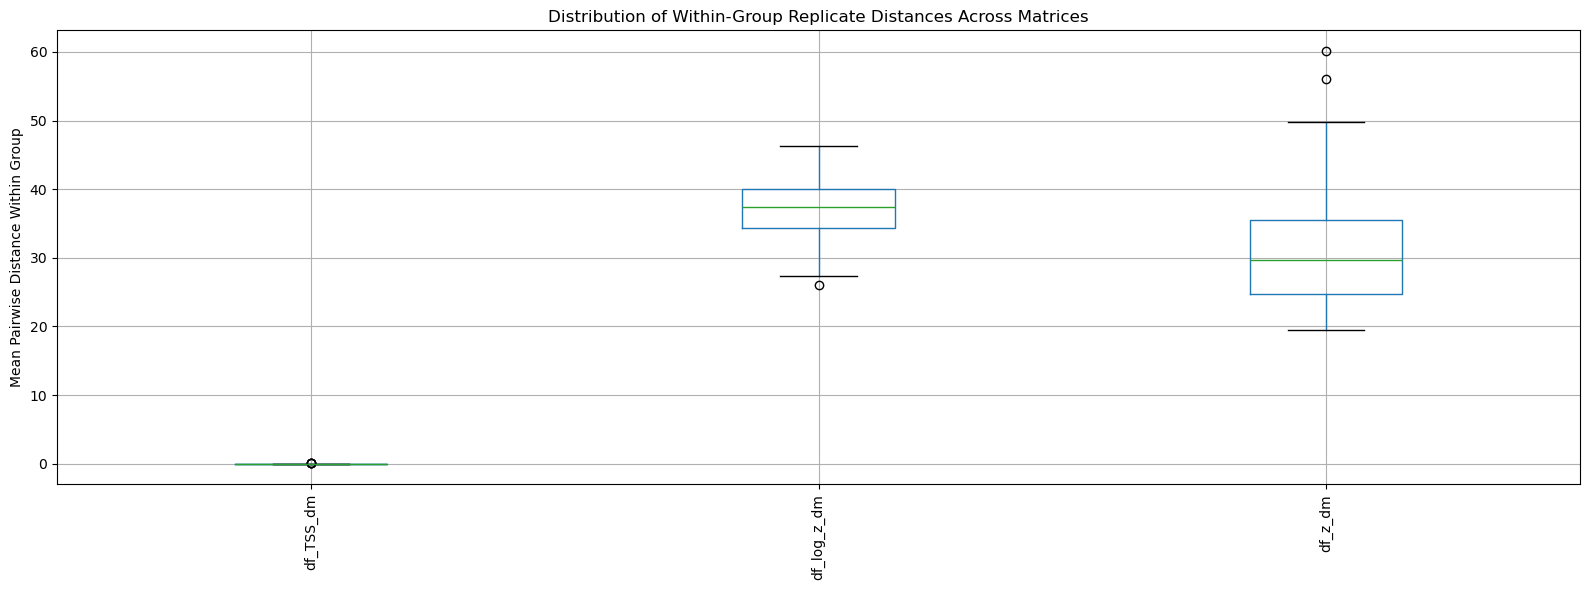

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Store per-group and summary metrics
group_distance_records = []
summary_stats = []

# Loop through distance matrices
for name, dm in dms.items():
    ids = [str(i) if not isinstance(i, str) else i for i in dm.ids]

    meta = metadata.loc[ids].copy()

    # Create replicate group labels: temperature + day
    meta['group'] = meta['temperature'].astype(str) + "_" + meta['day'].astype(str)

    group_means = []

    for group, group_df in meta.groupby('group'):
        group_ids = group_df.index.tolist()
        if len(group_ids) < 2:
            continue  # skip groups with only 1 sample

        sub_dm = dm.filter(group_ids)
        dists = sub_dm.condensed_form()

        mean_dist = dists.mean()
        sum_dist = dists.sum()

        group_distance_records.append({
            'Matrix': name,
            'Group': group,
            'Temperature': group_df['temperature'].iloc[0],
            'Day': group_df['day'].iloc[0],
            'Mean Distance': mean_dist,
            'Sum Distance': sum_dist,
            'N Samples': len(group_ids)
        })

        group_means.append(mean_dist)

    # Aggregate matrix-level stats
    if group_means:
        summary_stats.append({
            'Matrix': name,
            'Overall Mean Distance': np.mean(group_means),
            'Overall Std Distance': np.std(group_means),
            'Overall Sum of Group Distances': sum(group_means),
            'N Groups': len(group_means)
        })
    else:
        summary_stats.append({
            'Matrix': name,
            'Overall Mean Distance': np.nan,
            'Overall Std Distance': np.nan,
            'Overall Sum of Group Distances': np.nan,
            'N Groups': 0
        })

# Convert to DataFrames
group_df = pd.DataFrame(group_distance_records)
summary_df = pd.DataFrame(summary_stats).sort_values(by='Overall Sum of Group Distances')

# 🔍 Save summary for reporting
summary_df.to_csv("Stats/20250516_summary_within_group_distances_FIA.csv", index=False)
group_df.to_csv("Stats/20250516_groupwise_within_group_distances_FIA.csv", index=False)

# 📊 Plot 1: Total within-group distance per matrix
plt.figure(figsize=(12, 6))
plt.barh(summary_df['Matrix'], summary_df['Overall Sum of Group Distances'], color='skyblue')
plt.xlabel('Sum of Mean Within-Group Distances')
plt.title('Total Replicate Dispersion Across Distance Matrices')
plt.tight_layout()
plt.show()

# 📊 Plot 2: Per-group distances (across all matrices)
plt.figure(figsize=(16, 6))
group_df['GroupLabel'] = group_df['Temperature'].astype(str) + "_day_" + group_df['Day'].astype(str)
pivot_df = group_df.pivot(index='GroupLabel', columns='Matrix', values='Mean Distance')
pivot_df.boxplot(rot=90)
plt.ylabel('Mean Pairwise Distance Within Group')
plt.title('Distribution of Within-Group Replicate Distances Across Matrices')
plt.tight_layout()
plt.show()


### plot wihtin group distances over time per temperature (to check if variance is similar)

In [142]:
dms

{'df_z_dm': <skbio.stats.distance._base.DistanceMatrix at 0x1a09460b0>,
 'df_log_z_dm': <skbio.stats.distance._base.DistanceMatrix at 0x1a0945b10>,
 'df_TSS_dm': <skbio.stats.distance._base.DistanceMatrix at 0x19f2db250>}

In [143]:
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_days_with_significance_letters(data, value_col, temperature_value,
                                        title="", ylabel="", colors=None,
                                        figsize=(8, 4), text_y_offset=0.05,
                                        return_stats=False):
    """
    Plot boxplots for one temperature group across days with Tukey HSD letters.
    Optionally returns the Tukey HSD stats table.
    """
    # Subset
    df = data[data['temperature'] == temperature_value].copy()
    df = df.dropna(subset=[value_col, 'day'])

    df['day'] = df['day'].astype(int)
    df['day_str'] = df['day'].astype(str)

    # Tukey HSD
    mc = MultiComparison(df[value_col], df['day_str'])
    tukey = mc.tukeyhsd()

    # Convert summary to DataFrame
    summary_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
    summary_df['reject'] = summary_df['reject'].astype(str) == 'True'

    # Compact letter display
    def get_cld_from_summary(summary_df):
        from collections import defaultdict
        groups = sorted(set(summary_df['group1']) | set(summary_df['group2']))
        group_dict = {g: set() for g in groups}
        current_letter = ord('a')
        remaining = set(groups)

        while remaining:
            this_letter = chr(current_letter)
            this_group = sorted(remaining)[0]
            compatible = {this_group}
            for g in remaining:
                mask1 = (summary_df['group1'] == this_group) & (summary_df['group2'] == g)
                mask2 = (summary_df['group1'] == g) & (summary_df['group2'] == this_group)
                is_sig = summary_df[mask1 | mask2]['reject'].any()
                if not is_sig:
                    compatible.add(g)
            for g in compatible:
                group_dict[g].add(this_letter)
            remaining -= compatible
            current_letter += 1
        return {k: ''.join(sorted(v)) for k, v in group_dict.items()}

    letter_map = get_cld_from_summary(summary_df)

    # Plotting
    plt.figure(figsize=figsize)
    day_order = sorted(df['day'].unique())
    box_palette = (df.groupby('day')['color'].first().reindex(day_order).to_dict()
                   if colors is not None else None)

    sns.boxplot(data=df, x='day', y=value_col, palette=box_palette, order=day_order)
    sns.stripplot(data=df, x='day', y=value_col, color='black', size=4, jitter=True, order=day_order)

    # Add letters
    max_vals = df.groupby('day')[value_col].max()
    for i, day in enumerate(day_order):
        label = letter_map.get(str(day), "")
        y = max_vals.loc[day] + text_y_offset * (max_vals.max() - max_vals.min())
        plt.text(i, y, label, ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel("Days", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()
    plt.tight_layout()

    if return_stats:
        return plt.gcf(), summary_df
    else:
        return plt.gcf()

In [144]:
from skbio import DistanceMatrix
from itertools import combinations
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Compute pairwise within-group distances and make long-form DF
pairwise_records = []

for name, dm in dms.items():
    ids = [str(i) for i in dm.ids]  # Ensure all sample IDs are strings
    ids = [i.strip() for i in ids]  # Remove potential whitespace

    # Check which IDs are missing from metadata before subsetting
    missing = [i for i in ids if i not in metadata.index]
    if missing:
        print(f"⚠️ {len(missing)} IDs not found in metadata: {missing[:5]}...")

    # Only use those present in both
    valid_ids = [i for i in ids if i in metadata.index]
    meta = metadata.loc[valid_ids].copy()

    meta['group'] = meta['temperature'].astype(str) + "_" + meta['day'].astype(str)

    for group, group_df in meta.groupby('group'):
        group_ids = group_df.index.tolist()
        if len(group_ids) < 2:
            continue

        sub_dm = dm.filter(group_ids)

        for i, j in combinations(range(len(group_ids)), 2):
            sample_i, sample_j = group_ids[i], group_ids[j]
            dist = sub_dm[sample_i, sample_j]

            pairwise_records.append({
                'Matrix': name,
                'Sample1': sample_i,
                'Sample2': sample_j,
                'Distance': dist,
                'Temperature': group_df['temperature'].iloc[0],
                'Day': group_df['day'].iloc[0]
            })

pairwise_df = pd.DataFrame(pairwise_records)

# Save for inspection
pairwise_df.to_csv("Stats/20250516_pairwise_within_group_distances_long_FIA.csv", index=False)


✅ Pairwise distance data saved.


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


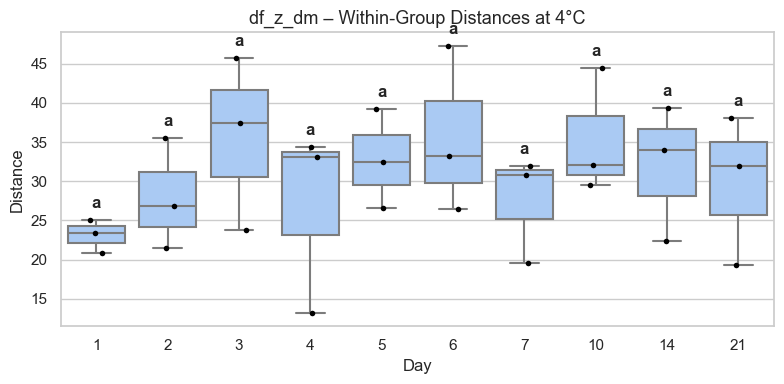

📊 Saved: Figures/pairwise_within_group_distances_Tukey/df_z_dm_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


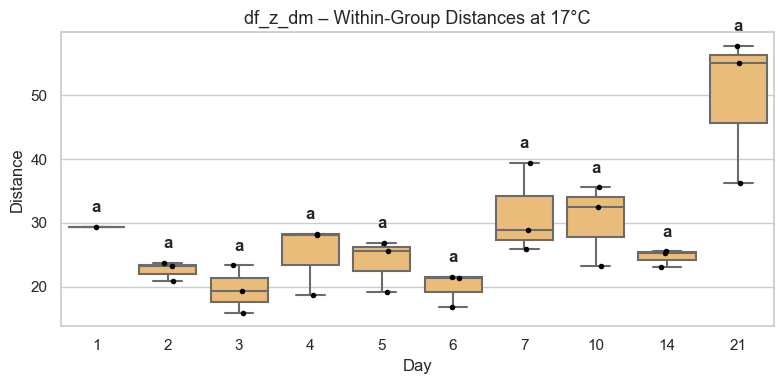

📊 Saved: Figures/pairwise_within_group_distances_Tukey/df_z_dm_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


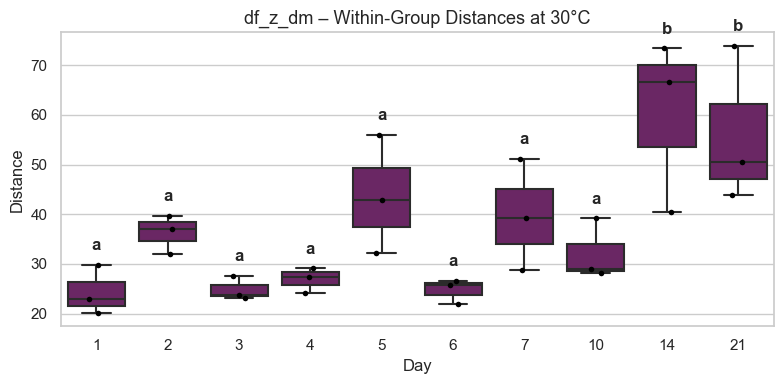

📊 Saved: Figures/pairwise_within_group_distances_Tukey/df_z_dm_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


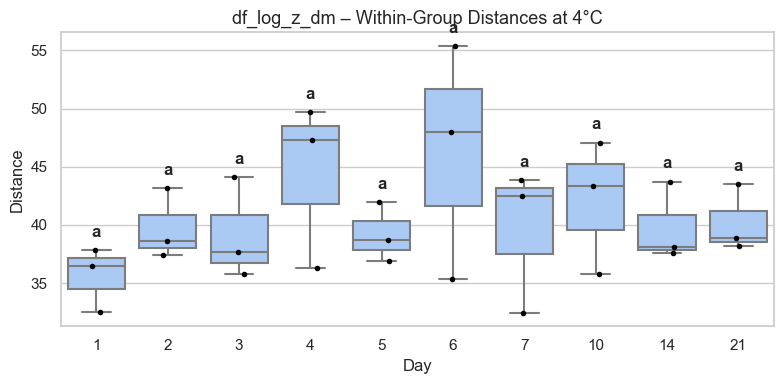

📊 Saved: Figures/pairwise_within_group_distances_Tukey/df_log_z_dm_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


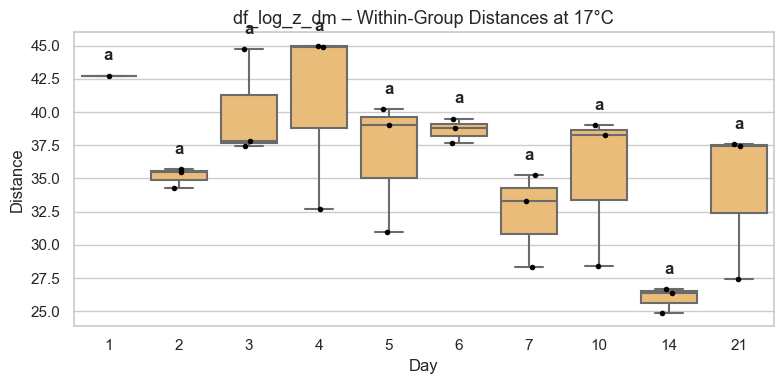

📊 Saved: Figures/pairwise_within_group_distances_Tukey/df_log_z_dm_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


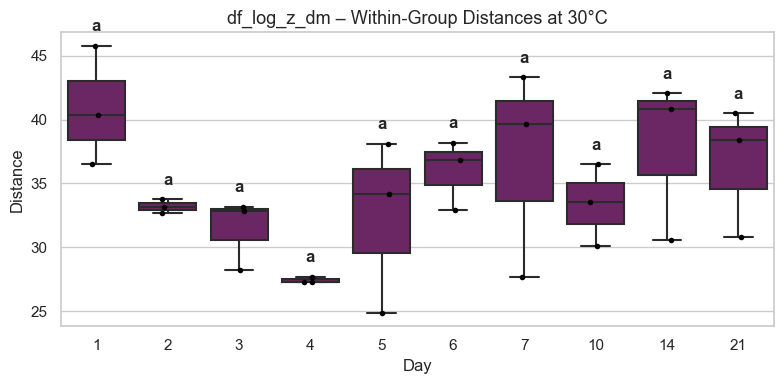

📊 Saved: Figures/pairwise_within_group_distances_Tukey/df_log_z_dm_Tukey_30C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


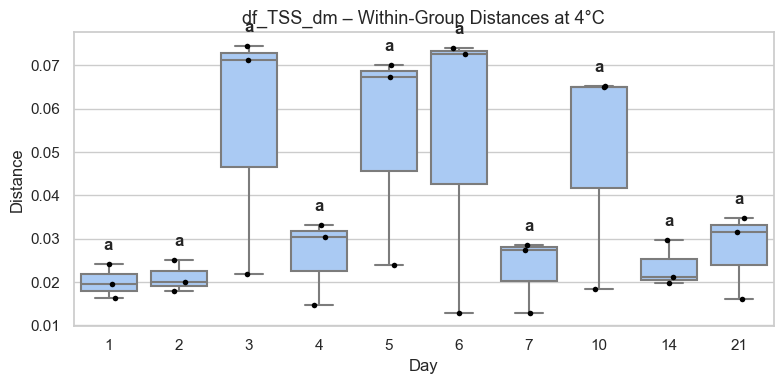

📊 Saved: Figures/pairwise_within_group_distances_Tukey/df_TSS_dm_Tukey_4C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


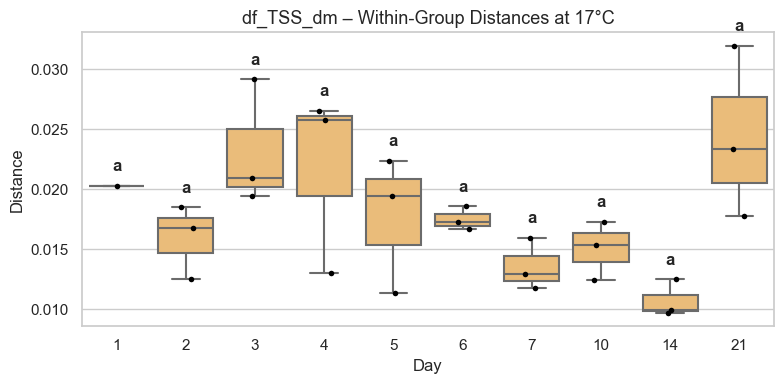

📊 Saved: Figures/pairwise_within_group_distances_Tukey/df_TSS_dm_Tukey_17C.pdf


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


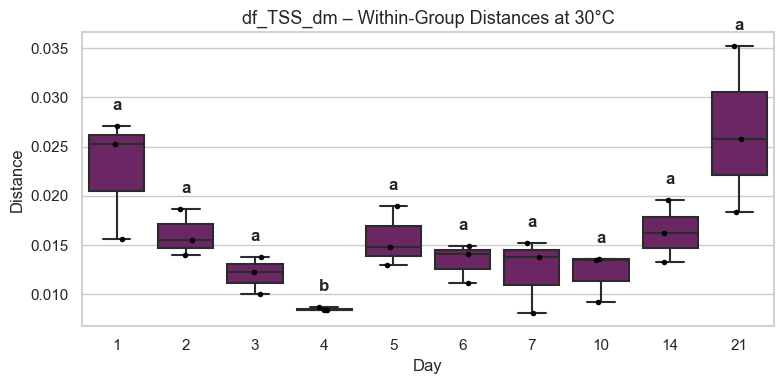

📊 Saved: Figures/pairwise_within_group_distances_Tukey/df_TSS_dm_Tukey_30C.pdf
✅ Tukey HSD summary exported.


In [145]:
from skbio import DistanceMatrix
from itertools import combinations
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure seaborn default styling
sns.set(style="whitegrid")

# Prepare output folders
# os.makedirs("Figures/pairwise_within_group_distances_Tukey/", exist_ok=True)
# os.makedirs("Stats/", exist_ok=True)

# ---- Step 1: Compute pairwise distances ---- #
pairwise_records = []

for name, dm in dms.items():
    ids = [str(i).strip() for i in dm.ids]
    valid_ids = [i for i in ids if i in metadata.index]
    meta = metadata.loc[valid_ids].copy()

    meta['group'] = meta['temperature'].astype(str) + "_" + meta['day'].astype(str)

    for group, group_df in meta.groupby('group'):
        group_ids = group_df.index.tolist()
        if len(group_ids) < 2:
            continue
        sub_dm = dm.filter(group_ids)

        for i, j in combinations(range(len(group_ids)), 2):
            sample_i, sample_j = group_ids[i], group_ids[j]
            dist = sub_dm[sample_i, sample_j]

            pairwise_records.append({
                'Matrix': name,
                'Sample1': sample_i,
                'Sample2': sample_j,
                'Distance': dist,
                'Temperature': group_df['temperature'].iloc[0],
                'Day': group_df['day'].iloc[0]
            })

pairwise_df = pd.DataFrame(pairwise_records)
# pairwise_df.to_csv("Stats/20250514_pairwise_within_group_distances_long_16S.csv", index=False)
print("✅ Pairwise distance data saved.")

# ---- Step 2: Plotting and Tukey with letters ---- #
def get_cld_from_summary(summary_df):
    """Generate compact letter display (CLD) from Tukey summary."""
    groups = sorted(set(summary_df['group1']) | set(summary_df['group2']))
    group_dict = {g: set() for g in groups}
    current_letter = ord('a')
    remaining = set(groups)

    while remaining:
        this_letter = chr(current_letter)
        this_group = sorted(remaining)[0]
        compatible = {this_group}
        for g in remaining:
            mask1 = (summary_df['group1'] == this_group) & (summary_df['group2'] == g)
            mask2 = (summary_df['group1'] == g) & (summary_df['group2'] == this_group)
            is_sig = summary_df[mask1 | mask2]['reject'].any()
            if not is_sig:
                compatible.add(g)
        for g in compatible:
            group_dict[g].add(this_letter)
        remaining -= compatible
        current_letter += 1

    return {k: ''.join(sorted(v)) for k, v in group_dict.items()}

# Build temperature-color map
temp_colors = metadata.drop_duplicates('temperature')[['temperature', 'color2']] \
                      .set_index('temperature')['color2'].to_dict()

all_tukey_stats = []

for matrix_name in pairwise_df['Matrix'].unique():
    for temp in [4, 17, 30]:
        df_temp = pairwise_df[(pairwise_df['Matrix'] == matrix_name) &
                              (pairwise_df['Temperature'] == temp)].copy()

        if df_temp['Day'].nunique() < 2:
            continue

        df_temp['day_str'] = df_temp['Day'].astype(str)
        mc = MultiComparison(df_temp['Distance'], df_temp['day_str'])
        tukey = mc.tukeyhsd()

        summary_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
        summary_df['Matrix'] = matrix_name
        summary_df['Temperature'] = temp
        summary_df['reject'] = summary_df['reject'].astype(str) == 'True'

        all_tukey_stats.append(summary_df)

        letter_map = get_cld_from_summary(summary_df)
        max_vals = df_temp.groupby('Day')['Distance'].max()

        # ---- Plot ---- #
        plt.figure(figsize=(8, 4))
        palette = {d: temp_colors[temp] for d in sorted(df_temp['Day'].unique())}
        sns.boxplot(data=df_temp, x='Day', y='Distance', palette=palette)
        sns.stripplot(data=df_temp, x='Day', y='Distance', color='black', size=4, jitter=True)

        # Add significance letters
        for i, day in enumerate(sorted(df_temp['Day'].unique())):
            label = letter_map.get(str(day), "")
            y = max_vals.loc[day] + 0.05 * (max_vals.max() - max_vals.min())
            plt.text(i, y, label, ha='center', va='bottom', fontsize=12, fontweight='bold')

        plt.title(f"{matrix_name} – Within-Group Distances at {temp}°C", fontsize=13)
        plt.ylabel("Distance", fontsize=12)
        plt.xlabel("Day", fontsize=12)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        plt.tight_layout()

        fname = f"Figures/pairwise_within_group_distances_Tukey/{matrix_name.replace(' ', '_')}_Tukey_{temp}C.pdf"
        # plt.savefig(fname, format='pdf', bbox_inches='tight')
        plt.show()
        plt.close()
        print(f"📊 Saved: {fname}")

# ---- Final export ---- #
final_tukey = pd.concat(all_tukey_stats, ignore_index=True)
# final_tukey.to_csv("Stats/20250514_Tukey_within_group_distances_all_16S.csv", index=False)
print("✅ Tukey HSD summary exported.")


In [98]:
metadata

Unnamed: 0  Chao1 kmers ITS  \
16S_id                                                              
366294_209-LP4-16S-0709  366292_209-LP4-ITS-0709            747.0   
366294_121-LP4-16S-0621  366292_121-LP4-ITS-0621           1052.0   
366294_212-LP4-16S-0712  366292_212-LP4-ITS-0712           1253.0   
366294_225-LP4-16S-0725  366292_225-LP4-ITS-0725           1212.0   
366294_201-LP4-16S-0701  366292_201-LP4-ITS-0701           1204.0   
...                                          ...              ...   
366294_181-LP4-16S-0681  366292_181-LP4-ITS-0681           3357.0   
366294_251-LP4-16S-0751  366292_251-LP4-ITS-0751           3265.0   
366294_260-LP4-16S-0760  366292_260-LP4-ITS-0760           3137.0   
366294_264-LP4-16S-0764  366292_264-LP4-ITS-0764           3434.0   
366294_196-LP4-16S-0696                     xxxx              NaN   

                         Chao1 OTUs ITS  Chao1 ASVs ITS  Chao1 kmers  \
16S_id                                                                 
366294_209-LP4-16S-0709            2.00        4.000000        678.0   
366294_121-LP4-16S-0621            4.00        6.000000        244.0   
366294_212-LP4-16S-0712            7.50        7.000000        718.0   
366294_225-LP4-16S-0725            5.00        7.000000        708.0   
366294_201-LP4-16S-0701            5.00        8.000000        708.0   
...                                 ...             ...          ...   
366294_181-LP4-16S-0681           23.50       26.428571        708.0   
366294_251-LP4-16S-0751           16.25       34.000000        708.0   
366294_260-LP4-16S-0760           23.50       32.000000        708.0   
366294_264-LP4-16S-0764           30.20       25.375000        708.0   
366294_196-LP4-16S-0696             NaN             NaN        718.0   

                         Chao1 OTUs  Chao1 ASVs  identifier row  column  ...  \
16S_id                                                                   ...   
366294_209-LP4-16S-0709         5.0         4.0   W00.00.00   E       5  ...   
366294_121-LP4-16S-0621         1.0         1.0   W30.02.28   E       6  ...   
366294_212-LP4-16S-0712         5.0         6.0   W30.03.21   H       5  ...   
366294_225-LP4-16S-0725         6.0         5.0   W17.02.14   E       7  ...   
366294_201-LP4-16S-0701         5.0         5.0   W04.02.04   E       4  ...   
...                             ...         ...         ...  ..     ...  ...   
366294_181-LP4-16S-0681         5.0         5.0   W30.03.03   A       2  ...   
366294_251-LP4-16S-0751         5.0         8.0  W04.03.01    G      10  ...   
366294_260-LP4-16S-0760         5.0         5.0   W30.02.01   H      11  ...   
366294_264-LP4-16S-0764         5.0         5.0   W04.03.04   D      12  ...   
366294_196-LP4-16S-0696         5.0         6.0   W30.03.07   H       3  ...   

                         Evenness OTUs ITS  Simpson OTUs ITS  \
16S_id                                                         
366294_209-LP4-16S-0709           0.301049          0.101261   
366294_121-LP4-16S-0621           0.110319          0.056100   
366294_212-LP4-16S-0712           0.032769          0.017630   
366294_225-LP4-16S-0725           0.022223          0.009683   
366294_201-LP4-16S-0701           0.142104          0.083077   
...                                    ...               ...   
366294_181-LP4-16S-0681           0.103012          0.101151   
366294_251-LP4-16S-0751           0.071042          0.057944   
366294_260-LP4-16S-0760           0.116678          0.117316   
366294_264-LP4-16S-0764           0.103808          0.102250   
366294_196-LP4-16S-0696                NaN               NaN   

                         Shannon kmers ITS Evenness kmers ITS  \
16S_id                                                          
366294_209-LP4-16S-0709           8.420116           0.882153   
366294_121-LP4-16S-0621           8.340575           0.830824   
366294_212-LP4-16S-0712           8.253068           0.801956   
3662

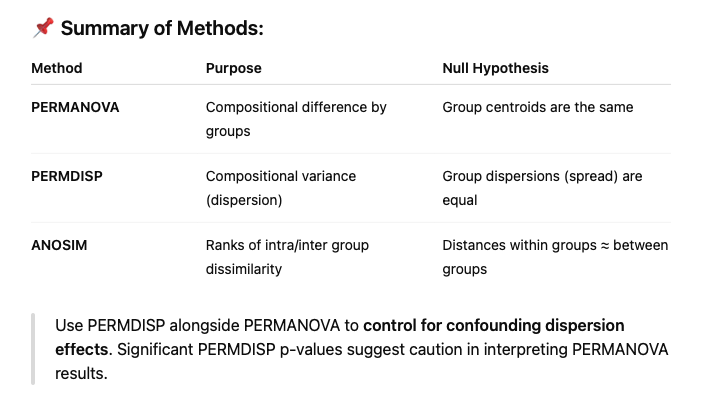

In [23]:
dms

{'df_z_dm': <skbio.stats.distance._base.DistanceMatrix at 0x1a013e080>,
 'df_log_z_dm': <skbio.stats.distance._base.DistanceMatrix at 0x19cb46200>,
 'df_TSS_dm': <skbio.stats.distance._base.DistanceMatrix at 0x19cee4100>}

In [24]:
feature_tables = {
    'df_z_dm': df_z,
    'df_log_z_dm': df_log_z,
    'df_TSS_dm': df_tss
}


In [25]:
from skbio.stats.distance import permanova, permdisp, anosim
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

results = []
dispersion_records = []
for name, dm in dms.items():
    ids = [str(i[0]) if isinstance(i, tuple) else str(i) for i in dm.ids]
    meta = metadata.loc[metadata.index.intersection(ids)].copy()

    # Ensure string dtypes
    meta['temperature'] = meta['temperature'].astype(str)
    meta['day'] = meta['day'].astype(str)
    meta['temp_day'] = meta['temperature'] + ":" + meta['day']

    try:
        # --- PERMANOVA ---
        res_temp = permanova(dm, meta, column='temperature')
        res_day = permanova(dm, meta, column='day')
        res_inter = permanova(dm, meta, column='temp_day')  # Not a true interaction term

        # --- PERMDISP ---
        disp_temp = permdisp(dm, meta, column='temperature')
        disp_day = permdisp(dm, meta, column='day')
        disp_inter = permdisp(dm, meta, column='temp_day')

        # --- ANOSIM ---
        anosim_temp = anosim(dm, meta, column='temperature')
        anosim_day = anosim(dm, meta, column='day')
        anosim_inter = anosim(dm, meta, column='temp_day')
        for grouping_column in ['temperature', 'day', 'temp_day']:
            groups = meta[grouping_column].unique()

            for group in groups:
                group_ids = meta[meta[grouping_column] == group].index
                if len(group_ids) < 2:
                    continue  # Can't compute dispersion on single sample
                try:
                    feature_df = feature_tables[name]  # match to distance matrix name
                    group_features = feature_df.loc[group_ids]


                    # Standardize (center & scale)
                    scaled = StandardScaler().fit_transform(group_features)

                    # Perform PCA
                    pca_coords = PCA(n_components=10).fit_transform(scaled)  # Adjust components if needed

                    # Compute distances to centroid in PCA space
                    centroid = pca_coords.mean(axis=0)
                    distances = np.sqrt(((pca_coords - centroid) ** 2).sum(axis=1))
                    dispersion_records.append({
                        'Matrix': name,
                        'Grouping': grouping_column,
                        'Group': group,
                        'MeanDistanceToCentroid': distances.mean(),
                        'StdDistanceToCentroid': distances.std(),
                        'N_Samples': len(distances)
                    })
                except Exception as e:
                    dispersion_records.append({
                        'Matrix': name,
                        'Grouping': grouping_column,
                        'Group': group,
                        'Error': str(e)
                    })
        results.append({
            'Matrix': name,
            # PERMANOVA
            'PERMANOVA R2 temperature': res_temp['test statistic'],
            'PERMANOVA p temperature': res_temp['p-value'],
            'PERMANOVA R2 day': res_day['test statistic'],
            'PERMANOVA p day': res_day['p-value'],
            'PERMANOVA R2 temp:day': res_inter['test statistic'],
            'PERMANOVA p temp:day': res_inter['p-value'],
            'PERMANOVA residual': 1 - (res_temp['test statistic'] + res_day['test statistic'] + res_inter['test statistic']),
            # PERMDISP
            'PERMDISP F temperature': disp_temp['test statistic'],
            'PERMDISP p temperature': disp_temp['p-value'],
            'PERMDISP F day': disp_day['test statistic'],
            'PERMDISP p day': disp_day['p-value'],
            'PERMDISP F temp:day': disp_inter['test statistic'],
            'PERMDISP p temp:day': disp_inter['p-value'],
            # ANOSIM
            'ANOSIM R temperature': anosim_temp['test statistic'],
            'ANOSIM p temperature': anosim_temp['p-value'],
            'ANOSIM R day': anosim_day['test statistic'],
            'ANOSIM p day': anosim_day['p-value'],
            'ANOSIM R temp:day': anosim_inter['test statistic'],
            'ANOSIM p temp:day': anosim_inter['p-value'],
        })

    except Exception as e:
        results.append({
            'Matrix': name,
            'PERMANOVA R2 temperature': np.nan,
            'PERMANOVA p temperature': np.nan,
            'PERMANOVA R2 day': np.nan,
            'PERMANOVA p day': np.nan,
            'PERMANOVA R2 temp:day': np.nan,
            'PERMANOVA p temp:day': np.nan,
            'PERMANOVA residual': np.nan,
            'PERMDISP F temperature': np.nan,
            'PERMDISP p temperature': np.nan,
            'PERMDISP F day': np.nan,
            'PERMDISP p day': np.nan,
            'PERMDISP F temp:day': np.nan,
            'PERMDISP p temp:day': np.nan,
            'ANOSIM R temperature': np.nan,
            'ANOSIM p temperature': np.nan,
            'ANOSIM R day': np.nan,
            'ANOSIM p day': np.nan,
            'ANOSIM R temp:day': np.nan,
            'ANOSIM p temp:day': np.nan,
            'Error': str(e)
        })

# Save
df = pd.DataFrame(results)
df.to_csv("Stats/20250601_PERMANOVA_ANOSIM_PERMDISP_results_beta_div_FIA.csv", index=False)
dispersion_df = pd.DataFrame(dispersion_records)
dispersion_df.to_csv("Stats/20250601_PERMDISP_centroid_distances_per_group_FIA.csv", index=False)

# Preview
cols_to_show = [c for c in df.columns if 'Matrix' in c or 'PERMANOVA' in c or 'PERMDISP' in c or 'ANOSIM' in c]
print(df[cols_to_show].head())


        Matrix  PERMANOVA R2 temperature  PERMANOVA p temperature  \
0      df_z_dm                 10.477454                    0.001   
1  df_log_z_dm                  9.009352                    0.001   
2    df_TSS_dm                 24.608246                    0.001   

   PERMANOVA R2 day  PERMANOVA p day  PERMANOVA R2 temp:day  \
0          2.263892            0.001               3.752076   
1          1.978844            0.001               2.705896   
2          3.808655            0.001              13.648717   

   PERMANOVA p temp:day  PERMANOVA residual  PERMDISP F temperature  \
0                 0.001          -15.493422                6.001747   
1                 0.001          -12.694091               10.067820   
2                 0.001          -41.065619                1.719845   

   PERMDISP p temperature  PERMDISP F day  PERMDISP p day  \
0                   0.005        3.643387           0.001   
1                   0.123        2.804301           0.322   
2 

In [147]:
from skbio.stats.distance import permanova
import pandas as pd
import numpy as np

def nested_permanova(dm, metadata, group_col_1, group_col_2):
    """
    Approximate nested PERMANOVA: group_col_1 + group_col_2(group_col_1)
    Parameters
    ----------
    dm : DistanceMatrix
    metadata : pd.DataFrame (indexed by sample IDs)
    group_col_1 : str (e.g. 'temperature')
    group_col_2 : str (e.g. 'day')
    
    Returns
    -------
    pd.DataFrame with test results
    """
    ids = [str(i[0]) if isinstance(i, tuple) else str(i) for i in dm.ids]
    meta = metadata.loc[metadata.index.intersection(ids)].copy()

    meta[group_col_1] = meta[group_col_1].astype(str)
    meta[group_col_2] = meta[group_col_2].astype(str)

    # First level PERMANOVA (e.g. temperature)
    res1 = permanova(dm, meta, column=group_col_1)

    # Second level PERMANOVA (e.g. day), stratified by group_col_1
    nested_stats = []
    for group_val, sub_meta in meta.groupby(group_col_1):
        sub_ids = sub_meta.index.tolist()
        if len(sub_ids) < 3 or sub_meta[group_col_2].nunique() < 2:
            continue  # Not enough data
        sub_dm = dm.filter(sub_ids)
        try:
            res2 = permanova(sub_dm, sub_meta, column=group_col_2)
            nested_stats.append({
                f'{group_col_1}': group_val,
                f'PERMANOVA R2 {group_col_2}({group_col_1})': res2['test statistic'],
                f'p {group_col_2}({group_col_1})': res2['p-value']
            })
        except Exception as e:
            nested_stats.append({
                f'{group_col_1}': group_val,
                f'PERMANOVA R2 {group_col_2}({group_col_1})': np.nan,
                f'p {group_col_2}({group_col_1})': np.nan,
                'Error': str(e)
            })

    # Combine
    nested_df = pd.DataFrame(nested_stats)
    result = {
        'PERMANOVA R2 ' + group_col_1: res1['test statistic'],
        'PERMANOVA p ' + group_col_1: res1['p-value'],
        'nested_details': nested_df
    }
    return result


nested temperature(day)

In [148]:
all_nested_results = []

for name, dm in dms.items():
    result = nested_permanova(dm, metadata, group_col_1='temperature', group_col_2='day')
    
    flat = {
        'Matrix': name,
        'R2 temperature': result['PERMANOVA R2 temperature'],
        'p temperature': result['PERMANOVA p temperature']
    }

    # Add nested results by aggregating
    nested_df = result['nested_details']
    if not nested_df.empty:
        flat['Mean R2 day(temperature)'] = nested_df.filter(like='R2').mean().values[0]
        flat['Mean p day(temperature)'] = nested_df.filter(like='p ').mean().values[0]
    else:
        flat['Mean R2 day(temperature)'] = np.nan
        flat['Mean p day(temperature)'] = np.nan

    all_nested_results.append(flat)

# Final DataFrame
nested_results_df = pd.DataFrame(all_nested_results)
nested_results_df.to_csv("Stats/20250516_nested_permanova_temperature_day_beta_FIA.csv", index=False)
print(nested_results_df.head())


        Matrix  R2 temperature  p temperature  Mean R2 day(temperature)  \
0      df_z_dm       10.477454          0.001                  2.444488   
1  df_log_z_dm        9.009352          0.001                  1.822744   
2    df_TSS_dm       24.608246          0.001                 14.708535   

   Mean p day(temperature)  
0                 0.061667  
1                 0.021333  
2                 0.004000  


In [149]:
all_nested_results = []
all_nested_per_temp = []

for name, dm in dms.items():
    result = nested_permanova(dm, metadata, group_col_1='temperature', group_col_2='day')
    
    flat = {
        'Matrix': name,
        'R2 temperature': result['PERMANOVA R2 temperature'],
        'p temperature': result['PERMANOVA p temperature']
    }

    # Extract nested result details
    nested_df = result['nested_details']
    nested_df['Matrix'] = name  # add matrix label
    all_nested_per_temp.append(nested_df)

    # Instead of mean, you could later use median or report min/max separately
    if not nested_df.empty:
        flat['Mean R2 day(temperature)'] = nested_df.filter(like='R2').mean().values[0]
        flat['Mean p day(temperature)'] = nested_df.filter(like='p ').mean().values[0]
    else:
        flat['Mean R2 day(temperature)'] = np.nan
        flat['Mean p day(temperature)'] = np.nan

    all_nested_results.append(flat)

# Save summary table (same as before)
nested_results_df = pd.DataFrame(all_nested_results)
nested_results_df.to_csv("Stats/20250516_nested_permanova_temperature_day_beta_FIA_summary.csv", index=False)

# Save full nested results per temperature group
nested_per_temp_df = pd.concat(all_nested_per_temp, ignore_index=True)
nested_per_temp_df.to_csv("Stats/20250516_nested_permanova_per_temperature_beta_FIA.csv", index=False)

print("✅ Saved both summary and per-temperature nested PERMANOVA tables.")


✅ Saved both summary and per-temperature nested PERMANOVA tables.


nested day(temperature)

In [150]:
all_nested_results = []

for name, dm in dms.items():
    result = nested_permanova(dm, metadata, group_col_1='day', group_col_2='temperature')
    
    flat = {
        'Matrix': name,
        'R2 day': result['PERMANOVA R2 day'],
        'p day': result['PERMANOVA p day']
    }

    # Add nested results by aggregating
    nested_df = result['nested_details']
    if not nested_df.empty:
        flat['Mean R2 temperature(day)'] = nested_df.filter(like='R2').mean().values[0]
        flat['Mean p temperature(day)'] = nested_df.filter(like='p ').mean().values[0]
    else:
        flat['Mean R2 temperature(day)'] = np.nan
        flat['Mean p temperature(day)'] = np.nan

    all_nested_results.append(flat)

# Final DataFrame
nested_results_df = pd.DataFrame(all_nested_results)
nested_results_df.to_csv("Stats/20250516_nested_permanova_day_temperature_beta_FIA.csv", index=False)
print(nested_results_df.head())

        Matrix    R2 day  p day  Mean R2 temperature(day)  \
0      df_z_dm  2.263892  0.002                  3.676284   
1  df_log_z_dm  1.978844  0.001                  2.669361   
2    df_TSS_dm  3.808655  0.001                 18.374943   

   Mean p temperature(day)  
0                   0.0261  
1                   0.0164  
2                   0.0055  


In [151]:
# Output list for summary + separate files for detailed per-day results
summary_results = []
per_day_results_all = []

for name, dm in dms.items():
    result = nested_permanova(dm, metadata, group_col_1='day', group_col_2='temperature')

    flat = {
        'Matrix': name,
        'R2 day': result['PERMANOVA R2 day'],
        'p day': result['PERMANOVA p day']
    }

    nested_df = result['nested_details']
    nested_df['Matrix'] = name  # Add matrix name to per-day results

    if not nested_df.empty:
        flat['Mean R2 temperature(day)'] = nested_df.filter(like='R2').mean().values[0]
        flat['Mean p temperature(day)'] = nested_df.filter(like='p ').mean().values[0]
        per_day_results_all.append(nested_df)  # Collect per-day details
    else:
        flat['Mean R2 temperature(day)'] = np.nan
        flat['Mean p temperature(day)'] = np.nan

    summary_results.append(flat)

# Save summary table
summary_df = pd.DataFrame(summary_results)
summary_df.to_csv("Stats/20250516_nested_permanova_day_temperature_beta_FIA.csv", index=False)

# Save combined per-day detailed table
if per_day_results_all:
    per_day_df = pd.concat(per_day_results_all, ignore_index=True)
    per_day_df.to_csv("Stats/20250516_nested_permanova_per_day_temperature_beta_FIA.csv", index=False)


### visuals for nested effects

In [152]:
#import and merge the two outputs:
nested_results_df = pd.read_csv("Stats/20250516_nested_permanova_temperature_day_beta_FIA.csv")
nested_results_df_2 = pd.read_csv("Stats/20250516_nested_permanova_day_temperature_beta_FIA.csv")

#merge them:
nested_results_df = pd.merge(nested_results_df, nested_results_df_2, on='Matrix')

nested_results_df




Matrix  R2 temperature  p temperature  Mean R2 day(temperature)  \
0      df_z_dm       10.477454          0.001                  2.444488   
1  df_log_z_dm        9.009352          0.001                  1.822744   
2    df_TSS_dm       24.608246          0.001                 14.708535   

   Mean p day(temperature)    R2 day  p day  Mean R2 temperature(day)  \
0                 0.061667  2.263892  0.001                  3.676284   
1                 0.021333  1.978844  0.001                  2.669361   
2                 0.004000  3.808655  0.001                 18.374943   

   Mean p temperature(day)  
0                   0.0267  
1                   0.0175  
2                   0.0049

In [106]:
nested_results_df['Matrix'].unique()

array(['bray_dm_FIA', 'jaccard_dm_FIA'], dtype=object)

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


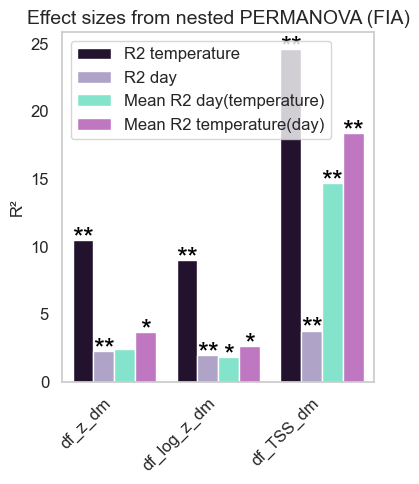

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distance metrics to include
selected_matrices = [
    'df_z_dm',
    'df_log_z_dm',
    'df_TSS_dm',
    
    
]

# Filter data
df = nested_results_df.copy()
df = df[df['Matrix'].isin(selected_matrices)]

# Melt to long format
melted = pd.melt(
    df,
    id_vars=['Matrix'],
    value_vars=[
        'R2 temperature',
        'R2 day',
        'Mean R2 day(temperature)',
        'Mean R2 temperature(day)'
    ],
    var_name='Factor',
    value_name='R2'
)

# Map to p-values
pval_map = {
    'R2 temperature': 'p temperature',
    'R2 day': 'p day',
    'Mean R2 day(temperature)': 'Mean p day(temperature)',
    'Mean R2 temperature(day)': 'Mean p temperature(day)'
}

def get_significance(row):
    p = df.loc[df['Matrix'] == row['Matrix'], pval_map[row['Factor']]].values[0]
    if pd.isna(p):
        return ''
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

melted['Significance'] = melted.apply(get_significance, axis=1)
melted['Matrix'] = pd.Categorical(melted['Matrix'], categories=selected_matrices, ordered=True)

# Set color palette
palette = {
    'R2 temperature': '#240E31FF',  # Blue
    'R2 day': '#AC9ECEFF',  # Red
    'Mean R2 day(temperature)': '#74F3D3FF',  # Orange
    'Mean R2 temperature(day)': '#CB6BCEFF'  # Green
}

# Plot with bar handle
plt.figure(figsize=(4, 5))
ax = sns.barplot(data=melted, x='Matrix', y='R2', hue='Factor', palette=palette)

# Correctly place stars
for bar, (_, row) in zip(ax.patches, melted.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(
            x, height -0.9,
            row['Significance'],
            ha='center', va='bottom',
            fontsize=20, color='black'
        )

# Final formatting
plt.title("Effect sizes from nested PERMANOVA (FIA)", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250516_nested_permanova_effect_sizes_FIA.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [117]:
print(melted[melted['Matrix'] == 'bray_dm_16S_ASV'])

Empty DataFrame
Columns: [Matrix, Factor, R2, Significance]
Index: []


and visualize per day/ per temperature

In [101]:
# selected_matrices1 = [
#  'jaccard_dm_16S_ASV',
#  'jaccard_dm_16S_OTU',
#  'jaccard_dm_16S_k',
#  'bray_dm_16S_ASV',
#  'bray_dm_16S_OTU',
#  'bray_dm_16S_k'
# ]

In [117]:
selected_matrices

['jaccard_dm_FIA', 'bray_dm_FIA']

/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


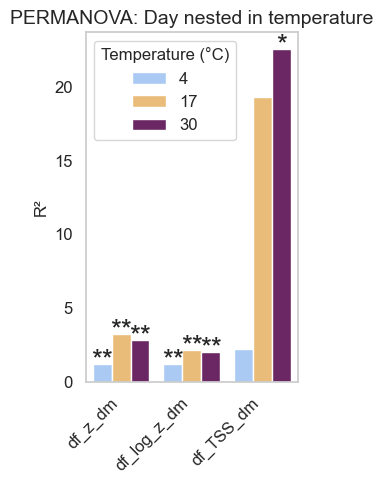

In [157]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250516_nested_permanova_per_temperature_beta_FIA.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'temperature'],
    value_vars=['PERMANOVA R2 day(temperature)', 'p day(temperature)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'temperature', 'R2']], p_df[['Matrix', 'temperature', 'p_value']], on=['Matrix', 'temperature'])
base_colors = {
    '4': '#9EC8FFFF',
    '17': '#FDC067FF',
    '30': '#751C6DFF'
}

# base_colors = {
#     '#FDC067FF',
#     '#9EC8FFFF',
    
#     '#751C6DFF'
# }

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)



# Plot per temperature
plt.figure(figsize=(3, 5))
plot_df['temperature'] = pd.Categorical(
    plot_df['temperature'].astype(str),
    categories=['4', '17', '30'],
    ordered=True
)
plot_df['Matrix'] = plot_df['Matrix'].astype(str).str.strip()
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices, ordered=True)



ax = sns.barplot(
    data=plot_df,
    x='Matrix',
    y='R2',
    hue='temperature',
    palette=base_colors
)



# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.7 , row['Significance'], ha='center', va='bottom', fontsize=20)

plt.title("PERMANOVA: Day nested in temperature", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Temperature (°C)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250516_nested_permanova_effect_sizes_per_temperature_FIA.pdf", format='pdf', bbox_inches='tight')
plt.show()


/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


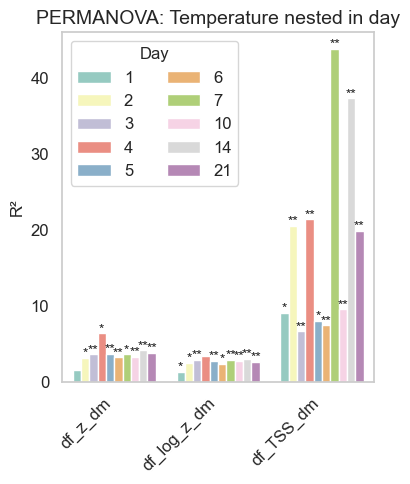

In [159]:
# Read detailed nested results per temperature
df_temp_nested = pd.read_csv("Stats/20250516_nested_permanova_per_day_temperature_beta_FIA.csv")

# Only include selected matrices
df_temp_nested = df_temp_nested[df_temp_nested['Matrix'].isin(selected_matrices)]

# Melt into long format
melted_temp = pd.melt(
    df_temp_nested,
    id_vars=['Matrix', 'day'],
    value_vars=['PERMANOVA R2 temperature(day)', 'p temperature(day)'],
    var_name='Metric',
    value_name='Value'
)

# Split into R2 and p-value
r2_df = melted_temp[melted_temp['Metric'].str.contains('R2')].rename(columns={'Value': 'R2'})
p_df = melted_temp[melted_temp['Metric'].str.contains('p ')].rename(columns={'Value': 'p_value'})

# Merge R2 and p-values
plot_df = pd.merge(r2_df[['Matrix', 'day', 'R2']], p_df[['Matrix', 'day', 'p_value']], on=['Matrix', 'day'])

# Add stars
def get_stars(p):
    if pd.isna(p): return ''
    elif p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    return ''

plot_df['Significance'] = plot_df['p_value'].apply(get_stars)
plot_df['Matrix'] = pd.Categorical(plot_df['Matrix'], categories=selected_matrices, ordered=True)

# Set color palette with 11 different colors:
palette = sns.color_palette("Set3", 11) 


# Plot per temperature
plt.figure(figsize=(4, 5))
ax = sns.barplot(data=plot_df, x='Matrix', y='R2', hue='day', palette=palette)

# Add significance stars
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if row['Significance']:
        ax.text(x, height -0.3, row['Significance'], ha='center', va='bottom', fontsize=10)

plt.title("PERMANOVA: Temperature nested in day", fontsize=14)
plt.ylabel("R²", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Day', fontsize=12, ncol=2)
plt.xlabel("", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.savefig("Figures/20250516_nested_permanova_effect_sizes_per_day_FIA.pdf", format='pdf', bbox_inches='tight')
plt.show()